# Analysis and Experiments Of Covid Data

## Importing Packages

In [805]:
# importing packages

import warnings
warnings.filterwarnings("ignore")


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import collections
import re
import string
import math
import time

punctuation=string.punctuation


from scipy import stats
from wordcloud import STOPWORDS
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from PIL import Image




from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE


from sklearn.metrics import log_loss , confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


from mlxtend.classifier import StackingClassifier

from prettytable import PrettyTable

# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

#bert rnn lstm encoder decoder , nltk, spacy,

<br>

## A. Understanding Training Datasets of ProfessorKing and Zindi Platform

#### 1. EDA on Zindi Training Data

In [806]:
# loading training set to RAM
raw_train_data = pd.read_csv('Train_Set.csv')

In [807]:
# printing dataset records
raw_train_data.head()

tweet_id                                          safe_text  label  \
0  CL1KWCMY  Me &amp; The Big Homie meanboy3000 #MEANBOY #M...    0.0   
1  E3303EME  I'm 100% thinking of devoting my career to pro...    1.0   
2  M4IVFSMS  #whatcausesautism VACCINES, DO NOT VACCINATE Y...   -1.0   
3  1DR6ROZ4  I mean if they immunize my kid with something ...   -1.0   
4  J77ENIIE  Thanks to <user> Catch me performing at La Nui...    0.0   

   agreement  
0        1.0  
1        1.0  
2        1.0  
3        1.0  
4        1.0

In [808]:
# printing data size
raw_train_data.shape

(10001, 4)

Observations by Team:- 

> - Can observe that there are 10,001 Records and 4 Features

In [809]:
# check for null values
raw_train_data.isnull().sum()

tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64

Observations by Team:- 

> - Can observe that there few missing records

Suggestions from Team:-

> - We can remove them since we are not taking agreement into account as suggested by professor
> - We can drop the missing values as they are 3 in total

In [810]:
###Implementing the above suggestion

raw_train_data = raw_train_data.dropna(axis=0)
raw_train_data.shape

(9999, 4)

Observations by Team:- 

> - Can observe that there 9,999 records and 4 features

In [811]:
# understanding target variable 
raw_train_data.label.value_counts()

 0.0    4908
 1.0    4053
-1.0    1038
Name: label, dtype: int64

Observations by Team:- 

> - Can observe that dataset is imbalanced, 

Suggestions by Team:- 
> - Needs balancing (up-sampling will help)
> - Also we can use algorithms which will take class imbalance into considerations


In [812]:
###Implementing above suggestions

raw_data_tweet_ids = raw_train_data.tweet_id.values
raw_train_data = raw_train_data.drop(columns=['tweet_id', 'agreement'], axis=1)

raw_train_data['safe_text'] = raw_train_data.safe_text.astype('string')
raw_train_data['label'] = raw_train_data['label'].map({-1.0:'0', 0.0:'1', 1.0:'2'})
raw_train_data['label'] = raw_train_data.label.astype('string')
raw_train_data['label'] = raw_train_data.label.astype('category')


#datatypes after implementing above suggestions
raw_train_data.dtypes


safe_text      string
label        category
dtype: object

In [813]:
# checking for duplicate records
raw_train_data.duplicated().sum()

307

Observations by Team:- 

> - Can observe that there are duplicate records

Suggestions by Team:-

> - We can keep the first occurance and remove the rest of the occurances


In [814]:
###Implementing the above suggestion
raw_train_data = raw_train_data.drop_duplicates(keep='first')

In [815]:
# understanding target variable 
raw_train_data.label.value_counts()

1    4704
2    3954
0    1034
Name: label, dtype: int64

Observations by Team:- 

> - Can observe that dataset is imbalanced

Suggestions by Team:- 
> - Needs balancing (up-sampling will help)
> - Also we can use algorithms which will take class imbalance into considerations


In [816]:
# final Raw Data Frame from eda analysis of Zindi Train Data
raw_train_data

safe_text label
0      Me &amp; The Big Homie meanboy3000 #MEANBOY #M...     1
1      I'm 100% thinking of devoting my career to pro...     2
2      #whatcausesautism VACCINES, DO NOT VACCINATE Y...     0
3      I mean if they immunize my kid with something ...     0
4      Thanks to <user> Catch me performing at La Nui...     1
...                                                  ...   ...
9996   Living in a time where the sperm I used to was...     2
9997   <user> <user>  In spite of all measles outbrea...     2
9998   Interesting trends in child immunization in Ok...     1
9999   CDC Says Measles Are At Highest Levels In Deca...     1
10000  Pneumonia vaccine: for women w risk of pulmona...     2

[9692 rows x 2 columns]

<br>

### 2. EDA On Professor King data:-

In [817]:
# loading training set to RAM
raw_train_data_king = pd.read_excel('professor_labeld_data.xlsx')

In [818]:
# Understanding the shape of the Data
raw_train_data_king.shape

(10000, 9)

Observations by Team:- 

> - Can observe that there 10,000 records and 9 features

In [819]:
# printing dataset records
raw_train_data_king.head()

id                                          tweet_url  \
0  1329066068720041989  https://twitter.com/minabelles/status/13290660...   
1  1329066070854967296  https://twitter.com/meet_rayyan/status/1329066...   
2  1329066076613828608  https://twitter.com/BiancaJagger/status/132906...   
3  1329066074424418311  https://twitter.com/Anony05690448/status/13290...   
4  1329066084180234241  https://twitter.com/Alysenve/status/1329066084...   

                       created_at  parsed_created_at user_screen_name  \
0  Wed Nov 18 14:16:58 +0000 2020       44153.345116       minabelles   
1  Wed Nov 18 14:16:58 +0000 2020       44153.345116      meet_rayyan   
2  Wed Nov 18 14:17:00 +0000 2020       44153.345139     BiancaJagger   
3  Wed Nov 18 14:16:59 +0000 2020       44153.345127    Anony05690448   
4  Wed Nov 18 14:17:01 +0000 2020       44153.345150         Alysenve   

                                                text tweet_type  \
0  New Pfizer Results: Coronavirus Vaccine Is Saf...   original   
1  RT @DrEricDing: BREAKINGâ€”Updated results fro...    retweet   
2  RT @BBCBreaking: Coronavirus vaccine by Pfizer...    retweet   
3  This is an objectively written and factual thr...   original   
4  RT @AP: BREAKING: Pfizer suggests its coronavi...    retweet   

   positive emotion  negative_emotion  
0               0.0              6.67  
1               0.0              0.00  
2               0.0              4.35  
3               0.0              2.27  
4               0.0              0.00

In [820]:
# as per professor sugession dropping id, tweet url, created at, parsed_created_at, user_screen_name, tweet type

raw_train_data_king = raw_train_data_king.drop(columns=['id', 'tweet_url', 'created_at', 'parsed_created_at', 'user_screen_name', 'tweet_type'], axis=1)

In [821]:
# converting the postive emotion, negative emotion scores to -1(negative), 0(neutral), +1(positive) sentiment

list_pos = list(raw_train_data_king['positive emotion'].values)
list_neg = list(raw_train_data_king['negative_emotion'].values)

zipped_list_pos_neg = zip(list_pos, list_neg)

res_pos_neg = []
for (p,v) in zipped_list_pos_neg:
    if p > v:
        res_pos_neg.append(1)
    elif p < v:
        res_pos_neg.append(-1)
    else:
        res_pos_neg.append(0)


In [823]:
#seeing the conversion results
res_pos_neg[20:10:-1]

[0, 0, 0, 0, 0, 0, 0, 0, -1, -1]

In [824]:
# applying the conversion results to our data frame and dropping the positive emotion and negative emotion columns
raw_train_data_king['label'] = res_pos_neg
raw_train_data_king.drop(columns=['positive emotion', 'negative_emotion'], axis=1, inplace=True)

#seeing the dataset after above transformation
raw_train_data_king

text  label
0     New Pfizer Results: Coronavirus Vaccine Is Saf...     -1
1     RT @DrEricDing: BREAKINGâ€”Updated results fro...      0
2     RT @BBCBreaking: Coronavirus vaccine by Pfizer...     -1
3     This is an objectively written and factual thr...     -1
4     RT @AP: BREAKING: Pfizer suggests its coronavi...      0
...                                                 ...    ...
9995  RT @Vrody_Jerome_: About the COVID vaccine: It...      0
9996  @DenverChannel the best way to not get sick is...      1
9997  RT @garrcie: being against student loan debt f...      0
9998  @xevtfm Would you give your child a covid vacc...     -1
9999  Honestly the endgame to covid didnâ€™t have to...      1

[10000 rows x 2 columns]

In [825]:
# check for null values
raw_train_data_king.isnull().sum()

text     0
label    0
dtype: int64

Observations by Team:- 

> - Can observe that there no missing records

In [826]:
# understanding target variable 
raw_train_data_king.label.value_counts()

 0    5856
-1    3189
 1     955
Name: label, dtype: int64

Observations by Team:- 

> - Can observe that data is skweed

Suggestions by Team:-

> - Upsampling of data should be done

In [827]:
raw_train_data_king.rename(columns={'text':'safe_text'}, inplace=True)

In [828]:
#some renaming
raw_train_data_king['label_renamed'] = raw_train_data_king['label'].map({-1.0:0, 0.0:1, 1.0:2})


#### Now we have both the raw training files, lets define a base model

<br>

## B. Defining some helper functions that we took from internet

In [829]:
# Utility Function for confusion matrix Source:- https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

<br>

#### Loading holdoutsets and processing them for various tasks

In [832]:
#loading of holdout test data for King models
kishan_hold_out = pd.read_excel('Kishan_Second_Labbled.xlsx')
#breaking them into 250 each for the records
kishan_hold_out_1 = kishan_hold_out.iloc[0:250,]
kishan_hold_out_2 = kishan_hold_out.iloc[250:,]

In [833]:
kishan_hold_out_1

id                                          tweet_url  \
0    1329094373624037377  https://twitter.com/KolinKoehl/status/13290943...   
1    1329094375842918402  https://twitter.com/JillKnudsen1/status/132909...   
2    1329094376518279168  https://twitter.com/Napendabangi/status/132909...   
3    1329094377768161283  https://twitter.com/ErnstHeidegger/status/1329...   
4    1329094382922977284  https://twitter.com/Local12/status/13290943829...   
..                   ...                                                ...   
245  1329094910881001473  https://twitter.com/Coleshsmartinez/status/132...   
246  1329094916039962624  https://twitter.com/hopeful_hoosier/status/132...   
247  1329094912709636098  https://twitter.com/MoonRos/status/13290949127...   
248  1329094927070994433  https://twitter.com/JackoTorrez/status/1329094...   
249  1329094925405843456  https://twitter.com/DeansherryS/status/1329094...   

                         created_at  parsed_created_at user_screen_name  \
0    Wed Nov 18 16:09:26 +0000 2020       44153.423218       KolinKoehl   
1    Wed Nov 18 16:09:27 +0000 2020       44153.423229     JillKnudsen1   
2    Wed Nov 18 16:09:27 +0000 2020       44153.423229     Napendabangi   
3    Wed Nov 18 16:09:27 +0000 2020       44153.423229   ErnstHeidegger   
4    Wed Nov 18 16:09:28 +0000 2020       44153.423241          Local12   
..                              ...                ...              ...   
245  Wed Nov 18 16:11:34 +0000 2020       44153.424699  Coleshsmartinez   
246  Wed Nov 18 16:11:36 +0000 2020       44153.424722  hopeful_hoosier   
247  Wed Nov 18 16:11:35 +0000 2020       44153.424711          MoonRos   
248  Wed Nov 18 16:11:38 +0000 2020       44153.424745      JackoTorrez   
249  Wed Nov 18 16:11:38 +0000 2020       44153.424745      DeansherryS   

                                                  Text tweet_type  Sentiment  
0    Iâ€™m excited for the generation that canâ€™t ...   original          1  
1    RT @SethMacFarlane: With both Moderna and Pfiz...    retweet          1  
2    RT @maktejah_: Alafu wewe utakua zile za: "I w...    retweet         -1  
3    @BrittPettibone Plot twist: the water cannons ...      reply          0  
4    Hamilton County Health Commissioner calls rise...   original          0  
..                                                 ...        ...        ...  
245  Trump is furious because he thinks Biden will ...   original          1  
246  @siegs111 @JamesTodaroMD Yes it will be over w...      reply          1  
247  RT @Tim_Hayward_: Have I understood correctly?...    retweet          1  
248  RT @NorbertElekes: BREAKING: Pfizer to file fo...    retweet          1  
249  RT @ABCWorldNews: BREAKING: Pfizer and partner...    retweet          1  

[250 rows x 8 columns]

In [834]:
kishan_hold_out_2.reset_index(drop=True,inplace=True)

In [835]:
kishan_hold_out_1.drop(columns=['id', 'tweet_url', 'created_at', 'parsed_created_at','user_screen_name', 'tweet_type'], axis=1, inplace=True)

In [836]:
kishan_hold_out_2.drop(columns=['id', 'tweet_url', 'created_at', 'parsed_created_at','user_screen_name', 'tweet_type'], axis=1, inplace=True)

In [837]:
kishan_hold_out_1.rename(columns={'Text':'safe_text', 'Sentiment':'label'},inplace=True)

In [838]:
kishan_hold_out_2.rename(columns={'Text':'safe_text', 'Sentiment':'label'},inplace=True)

In [839]:
#preparing hold out set for baseline model definitions

kishan_hold_out_1

safe_text  label
0    Iâ€™m excited for the generation that canâ€™t ...      1
1    RT @SethMacFarlane: With both Moderna and Pfiz...      1
2    RT @maktejah_: Alafu wewe utakua zile za: "I w...     -1
3    @BrittPettibone Plot twist: the water cannons ...      0
4    Hamilton County Health Commissioner calls rise...      0
..                                                 ...    ...
245  Trump is furious because he thinks Biden will ...      1
246  @siegs111 @JamesTodaroMD Yes it will be over w...      1
247  RT @Tim_Hayward_: Have I understood correctly?...      1
248  RT @NorbertElekes: BREAKING: Pfizer to file fo...      1
249  RT @ABCWorldNews: BREAKING: Pfizer and partner...      1

[250 rows x 2 columns]

In [840]:
#mapping labels for kishan holds 1,2
kishan_hold_out_1['label'] = kishan_hold_out_1['label'].map({-1.0:0, 0.0:1, 1.0:2})
kishan_hold_out_2['label'] = kishan_hold_out_2['label'].map({-1.0:0, 0.0:1, 1.0:2})

In [841]:
kishan_hold_out_1.label.value_counts()

2    135
1     58
0     57
Name: label, dtype: int64

In [842]:
#Hold out uncleaned BOW 1,1 vectorisation
exp1_corpus_raw_kishan_hold_out_1 = []
for text_ in kishan_hold_out_1.safe_text.values:
    exp1_corpus_raw_kishan_hold_out_1.append(text_)

exp1_out_king_hold_out_1_kishan = exp1_count_vectorizer_king.transform(exp1_corpus_raw_kishan_hold_out_1)
exp_1_array_king_hold_out_1_kishan = exp1_out_king_hold_out_1_kishan.toarray()

exp1_dataframe_king_hold_out_set_1_kishan = pd.DataFrame(exp_1_array_king_hold_out_1_kishan, columns=exp1_featurenames_king)

In [843]:
#hold out bow 1,1 kishan set1
exp1_dataframe_king_hold_out_set_1_kishan

00  000  0001s  0002  000_x000d_  001  0039  00ogyoungblood  01izkkz3qr  \
0     0    0      0     0           0    0     0               0           0   
1     0    0      0     0           0    0     0               0           0   
2     0    0      0     0           0    0     0               0           0   
3     0    0      0     0           0    0     0               0           0   
4     0    0      0     0           0    0     0               0           0   
..   ..  ...    ...   ...         ...  ...   ...             ...         ...   
245   0    0      0     0           0    0     0               0           0   
246   0    0      0     0           0    0     0               0           0   
247   0    0      0     0           0    0     0               0           0   
248   0    0      0     0           0    0     0               0           0   
249   0    0      0     0           0    0     0               0           0   

     01r2â  ...  žå  žæ  žðÿ  ƒà  ˆ_x000d_  ˆà  ˆàª  ˆã  ˆé  ˆðÿ  
0        0  ...   0   0    0   0         0   0    0   0   0    0  
1        0  ...   0   0    0   0         0   0    0   0   0    0  
2        0  ...   0   0    0   0         0   0    0   0   0    0  
3        0  ...   0   0    0   0         0   0    0   0   0    0  
4        0  ...   0   0    0   0         0   0    0   0   0    0  
..     ...  ...  ..  ..  ...  ..       ...  ..  ...  ..  ..  ...  
245      0  ...   0   0    0   0         0   0    0   0   0    0  
246      0  ...   0   0    0   0         0   0    0   0   0    0  
247      0  ...   0   0    0   0         0   0    0   0   0    0  
248      0  ...   0   0    0   0         0   0    0   0   0    0  
249      0  ...   0   0    0   0         0   0    0   0   0    0  

[250 rows x 15901 columns]

In [844]:
kishan_hold_out_1

safe_text  label
0    Iâ€™m excited for the generation that canâ€™t ...      2
1    RT @SethMacFarlane: With both Moderna and Pfiz...      2
2    RT @maktejah_: Alafu wewe utakua zile za: "I w...      0
3    @BrittPettibone Plot twist: the water cannons ...      1
4    Hamilton County Health Commissioner calls rise...      1
..                                                 ...    ...
245  Trump is furious because he thinks Biden will ...      2
246  @siegs111 @JamesTodaroMD Yes it will be over w...      2
247  RT @Tim_Hayward_: Have I understood correctly?...      2
248  RT @NorbertElekes: BREAKING: Pfizer to file fo...      2
249  RT @ABCWorldNews: BREAKING: Pfizer and partner...      2

[250 rows x 2 columns]

#### Feature Engineering of Kishan Set blocks

In [889]:
# Feature Engineering and processing of holdoutsets
## Kishan hold out set 1

# Before Cleanning getting some Features for kishan hold out set 1 data

kishan_hold_out_1['uncleaned_text_len'] = kishan_hold_out_1['safe_text'].apply(lambda text:len(text))
kishan_hold_out_1['log_uncleaned_text_len'] = kishan_hold_out_1['uncleaned_text_len'].apply(lambda length:np.round(np.log(length), 4))

from nltk.corpus import stopwords
stop = stopwords.words('english')

kishan_hold_out_1['uncleaned_text_stopwords'] = kishan_hold_out_1['safe_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
kishan_hold_out_1['uncleaned_text_upper'] = kishan_hold_out_1['safe_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

kishan_hold_out_1['uncleaned_avg_word'] = kishan_hold_out_1['safe_text'].apply(lambda x: avg_word(x))
kishan_hold_out_1['uncleaned_text_punctuation_count'] = kishan_hold_out_1['safe_text'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
kishan_hold_out_1['uncleaned_text_hastag_count'] = kishan_hold_out_1['safe_text'].apply(lambda x: len("".join(_ for _ in x if _=="#"))) 
kishan_hold_out_1['uncleaned_text_word_count']=kishan_hold_out_1['safe_text'].apply(lambda x: len(str(x).split(" ")))
kishan_hold_out_1['uncleaned_word_density'] = kishan_hold_out_1['uncleaned_text_len'] / (kishan_hold_out_1['uncleaned_text_word_count']+1)


#Cleaning Block for King Holdout Data
# Functions for cleaning holdout data kishan set 1


#Some inits
STOPWORDS = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

corpus_cleaned_train_kishan_hold_set1 = []


def decontracted(phrase): 
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase) 
    # general
    phrase = re.sub(r"n\'t", " not", phrase) 
    phrase = re.sub(r"\'re", " are", phrase) 
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase) 
    phrase = re.sub(r"\'ll", " will", phrase) 
    phrase = re.sub(r"\'t", " not", phrase) 
    phrase = re.sub(r"\'ve", " have", phrase) 
    phrase = re.sub(r"\'m", " am", phrase) 
    
    return phrase

def text_cleaner(text):
    text = str(text)
    # Remove <user>   tags
    text = re.sub(r'<.*?>', '',   text)
    # Replace &amp; with   'and'
    text = re.sub(r"&amp;", "and",   text) 
    # Replace punctuation   characters with spaces
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, "   ") for c in  filters)
    translate_map =   str.maketrans(translate_dict)
    text = text.translate(translate_map)
    # Remove URL's
    text = re.sub(r"http\S+" , "" , text)
    # Remove html tags
    text=re.sub(r"<[^<]+?>", "" , text)
    # Removing lxml
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # Decontracting phares
    text=decontracted(text)
    # Removing word with numbers
    text=re.sub("S*\d\S*" , "" , text)
     # Remove Special charactor punc spaces
    text=re.sub(r"\W+", " ", text)
    
    # Removing other languages
    pattern = r"\b[A-Za-z]+\b"
    matches_list = re.findall(pattern, text)
    text = ' '.join(e.lower() for e in matches_list if e.lower() not in STOPWORDS)
    
    # Stop word removal
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in STOPWORDS)
    
    # Convert text to   lowercase
    text = text.strip().lower()
    corpus_cleaned_train.append(text)
    return  text


def text_cleaner_(text):
    text = str(text)
    # Remove <user> tags
    text = re.sub(r'<.*?>', '', text)
    # Replace &amp; with 'and'
    text = re.sub(r"&amp;", "and", text) 
    # Replace punctuation characters with spaces
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    # Remove URL's
    text = re.sub(r"http\S+", "" , text)
    # Remove html tags
    text = re.sub(r"<[^<]+?>", "", text)
    # Removing lxml
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # Decontracting phrases
    text = decontracted(text)
    # Removing word with numbers
    text = re.sub("S*\d\S*", "", text)
    # Remove Special character punc spaces
    text = re.sub(r"\W+", " ", text)
    # Removing other languages
    pattern = r"\b[A-Za-z]+\b"
    matches_list = re.findall(pattern, text)
    text = ' '.join(e.lower() for e in matches_list if e.lower() not in STOPWORDS)
    # Stop word removal
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in STOPWORDS)
    # Stemming
    #text = ' '.join(stemmer.stem(e) for e in text.split())
    # Lemmatization
    #text = ' '.join(lemmatizer.lemmatize(e) for e in text.split())
    # Convert text to lowercase
    #text = text.strip().lower()
    corpus_cleaned_train_kishan_hold_set1.append(text)
    return text



## Applying Data Cleaning 
kishan_hold_out_1['CLEANED_TEXT'] = kishan_hold_out_1['safe_text'].apply(lambda text: text_cleaner_(text))


## Getting some Features after Data Cleaning on Zindi Data
kishan_hold_out_1['cleaned_text_len'] = kishan_hold_out_1['CLEANED_TEXT'].apply(lambda text:len(text))
kishan_hold_out_1['log_cleaned_text_len'] = kishan_hold_out_1['cleaned_text_len'].apply(lambda length:np.round(np.log(length), 4))

def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+1))#padding 1 to avoid division by 0

kishan_hold_out_1['cleaned_avg_word'] = kishan_hold_out_1['CLEANED_TEXT'].apply(lambda x: avg_word(x))
kishan_hold_out_1['cleaned_text_word_count']=kishan_hold_out_1['CLEANED_TEXT'].apply(lambda x: len(str(x).split(" ")))
kishan_hold_out_1['cleaned_word_density'] = kishan_hold_out_1['cleaned_text_len'] / (kishan_hold_out_1['cleaned_text_word_count']+1)


In [890]:
# Feature Engineering and processing of holdoutsets
## Kishan hold out set 2

# Before Cleanning getting some Features for kishan hold out set 1 data

kishan_hold_out_2['uncleaned_text_len'] = kishan_hold_out_2['safe_text'].apply(lambda text:len(text))
kishan_hold_out_2['log_uncleaned_text_len'] = kishan_hold_out_2['uncleaned_text_len'].apply(lambda length:np.round(np.log(length), 4))

from nltk.corpus import stopwords
stop = stopwords.words('english')

kishan_hold_out_2['uncleaned_text_stopwords'] = kishan_hold_out_2['safe_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
kishan_hold_out_2['uncleaned_text_upper'] = kishan_hold_out_2['safe_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

kishan_hold_out_2['uncleaned_avg_word'] = kishan_hold_out_2['safe_text'].apply(lambda x: avg_word(x))
kishan_hold_out_2['uncleaned_text_punctuation_count'] = kishan_hold_out_2['safe_text'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
kishan_hold_out_2['uncleaned_text_hastag_count'] = kishan_hold_out_2['safe_text'].apply(lambda x: len("".join(_ for _ in x if _=="#"))) 
kishan_hold_out_2['uncleaned_text_word_count']=kishan_hold_out_2['safe_text'].apply(lambda x: len(str(x).split(" ")))
kishan_hold_out_2['uncleaned_word_density'] = kishan_hold_out_2['uncleaned_text_len'] / (kishan_hold_out_2['uncleaned_text_word_count']+1)


#Cleaning Block for King Holdout Data
# Functions for cleaning holdout data kishan set 1


#Some inits
STOPWORDS = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

corpus_cleaned_train_kishan_hold_set2 = []


def decontracted(phrase): 
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase) 
    # general
    phrase = re.sub(r"n\'t", " not", phrase) 
    phrase = re.sub(r"\'re", " are", phrase) 
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase) 
    phrase = re.sub(r"\'ll", " will", phrase) 
    phrase = re.sub(r"\'t", " not", phrase) 
    phrase = re.sub(r"\'ve", " have", phrase) 
    phrase = re.sub(r"\'m", " am", phrase) 
    
    return phrase

def text_cleaner(text):
    text = str(text)
    # Remove <user>   tags
    text = re.sub(r'<.*?>', '',   text)
    # Replace &amp; with   'and'
    text = re.sub(r"&amp;", "and",   text) 
    # Replace punctuation   characters with spaces
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, "   ") for c in  filters)
    translate_map =   str.maketrans(translate_dict)
    text = text.translate(translate_map)
    # Remove URL's
    text = re.sub(r"http\S+" , "" , text)
    # Remove html tags
    text=re.sub(r"<[^<]+?>", "" , text)
    # Removing lxml
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # Decontracting phares
    text=decontracted(text)
    # Removing word with numbers
    text=re.sub("S*\d\S*" , "" , text)
     # Remove Special charactor punc spaces
    text=re.sub(r"\W+", " ", text)
    
    # Removing other languages
    pattern = r"\b[A-Za-z]+\b"
    matches_list = re.findall(pattern, text)
    text = ' '.join(e.lower() for e in matches_list if e.lower() not in STOPWORDS)
    
    # Stop word removal
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in STOPWORDS)
    
    # Convert text to   lowercase
    text = text.strip().lower()
    corpus_cleaned_train.append(text)
    return  text


def text_cleaner_(text):
    text = str(text)
    # Remove <user> tags
    text = re.sub(r'<.*?>', '', text)
    # Replace &amp; with 'and'
    text = re.sub(r"&amp;", "and", text) 
    # Replace punctuation characters with spaces
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    # Remove URL's
    text = re.sub(r"http\S+", "" , text)
    # Remove html tags
    text = re.sub(r"<[^<]+?>", "", text)
    # Removing lxml
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # Decontracting phrases
    text = decontracted(text)
    # Removing word with numbers
    text = re.sub("S*\d\S*", "", text)
    # Remove Special character punc spaces
    text = re.sub(r"\W+", " ", text)
    # Removing other languages
    pattern = r"\b[A-Za-z]+\b"
    matches_list = re.findall(pattern, text)
    text = ' '.join(e.lower() for e in matches_list if e.lower() not in STOPWORDS)
    # Stop word removal
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in STOPWORDS)
    # Stemming
    #text = ' '.join(stemmer.stem(e) for e in text.split())
    # Lemmatization
    #text = ' '.join(lemmatizer.lemmatize(e) for e in text.split())
    # Convert text to lowercase
    #text = text.strip().lower()
    corpus_cleaned_train_kishan_hold_set2.append(text)
    return text



## Applying Data Cleaning 
kishan_hold_out_2['CLEANED_TEXT'] = kishan_hold_out_2['safe_text'].apply(lambda text: text_cleaner_(text))


## Getting some Features after Data Cleaning on Zindi Data
kishan_hold_out_2['cleaned_text_len'] = kishan_hold_out_2['CLEANED_TEXT'].apply(lambda text:len(text))
kishan_hold_out_2['log_cleaned_text_len'] = kishan_hold_out_2['cleaned_text_len'].apply(lambda length:np.round(np.log(length), 4))

def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+1))#padding 1 to avoid division by 0

kishan_hold_out_2['cleaned_avg_word'] = kishan_hold_out_2['CLEANED_TEXT'].apply(lambda x: avg_word(x))
kishan_hold_out_2['cleaned_text_word_count']=kishan_hold_out_2['CLEANED_TEXT'].apply(lambda x: len(str(x).split(" ")))
kishan_hold_out_2['cleaned_word_density'] = kishan_hold_out_2['cleaned_text_len'] / (kishan_hold_out_2['cleaned_text_word_count']+1)


In [679]:
kishan_hold_out_1 = kishan_hold_out_1[['safe_text', 'label', 'uncleaned_text_stopwords',
       'uncleaned_text_upper', 'uncleaned_avg_word',
       'uncleaned_text_punctuation_count', 'uncleaned_text_hastag_count',
       'CLEANED_TEXT', 'cleaned_text_len', 'cleaned_avg_word']]

kishan_hold_out_2 = kishan_hold_out_2[['safe_text', 'label', 'uncleaned_text_stopwords',
       'uncleaned_text_upper', 'uncleaned_avg_word',
       'uncleaned_text_punctuation_count', 'uncleaned_text_hastag_count',
       'CLEANED_TEXT', 'cleaned_text_len', 'cleaned_avg_word']]

In [891]:
#preprocessed_feature_engineered_kishanset1
kishan_hold_out_1

safe_text  label  \
0    Iâ€™m excited for the generation that canâ€™t ...      2   
1    RT @SethMacFarlane: With both Moderna and Pfiz...      2   
2    RT @maktejah_: Alafu wewe utakua zile za: "I w...      0   
3    @BrittPettibone Plot twist: the water cannons ...      1   
4    Hamilton County Health Commissioner calls rise...      1   
..                                                 ...    ...   
245  Trump is furious because he thinks Biden will ...      2   
246  @siegs111 @JamesTodaroMD Yes it will be over w...      2   
247  RT @Tim_Hayward_: Have I understood correctly?...      2   
248  RT @NorbertElekes: BREAKING: Pfizer to file fo...      2   
249  RT @ABCWorldNews: BREAKING: Pfizer and partner...      2   

     uncleaned_text_len  log_uncleaned_text_len  uncleaned_text_stopwords  \
0                   121                  4.7958                        10   
1                   141                  4.9488                         9   
2                   125                  4.8283                         1   
3                    76                  4.3307                         3   
4                   151                  5.0173                         4   
..                  ...                     ...                       ...   
245                 135                  4.9053                         6   
246                 154                  5.0370                        12   
247                 141                  4.9488                         4   
248                  98                  4.5850                         4   
249                 142                  4.9558                         7   

     uncleaned_text_upper  uncleaned_avg_word  \
0                       0            4.809524   
1                       1            5.761905   
2                       2            6.411765   
3                       0            6.000000   
4                       2            7.000000   
..                    ...                 ...   
245                     0            6.555556   
246                     0            4.923077   
247                     2            6.100000   
248                     3            6.071429   
249                     2            6.150000   

     uncleaned_text_punctuation_count  uncleaned_text_hastag_count  \
0                                   1                            0   
1                                   4                            0   
2                                  12                            0   
3                                   3                            0   
4                                  12                            0   
..                                ...                          ...   
245                                 9                            0   
246                                 9                            0   
247                                 8                            0   
248                                 3                            0   
249                                 4                            0   

     uncleaned_text_word_count  uncleaned_word_density  \
0                           21                5.500000   
1                           21                6.409091   
2                           17                6.944444   
3                           11                6.333333   
4                           19                7.550000   
..                         ...                     ...   
245                         18                7.105263   
246                         25                5.923077   
247                         20                6.714286   
248                         14                6.533333   
249                         20                6.761905   

                                          CLEANED_TEXT  cleaned_text_len  \
0    excited generation reset wifi router teach dan...                64   
1    rt sethmacfarlane moderna pfizer announcing su...      

In [892]:
#preprocessed_feature_engineered_kishanset2
kishan_hold_out_2

safe_text  label  \
0    RT @joeynolfi: Ladies: Prior to tonight, you w...      2   
1    So now it really is a drug war... Pfizer and B...      2   
2    RT @ABC: Hereâ€™s everything you need to know ...      2   
3    "Covid vaccine: Pfizer says it's '94% effectiv...      2   
4    RT @AJEnglish: Pfizer ends COVID-19 vaccine tr...      2   
..                                                 ...    ...   
246  RT @NorbertElekes: BREAKING: Pfizer to file fo...      2   
247  Gov. Justice: We have a real problem, it's har...      2   
248  And then he wants to take credit for a vaccine...      2   
249  RT @realTuckFrumper: Pfizerâ€™s Covid-19 vacci...      0   
250  Alamak...abis la! Belangkas akn diburu habis2a...      0   

     uncleaned_text_len  log_uncleaned_text_len  uncleaned_text_stopwords  \
0                   156                  5.0499                         8   
1                   178                  5.1818                         8   
2                   144                  4.9698                         6   
3                    77                  4.3438                         2   
4                   119                  4.7791                         1   
..                  ...                     ...                       ...   
246                  98                  4.5850                         4   
247                 237                  5.4681                        20   
248                 183                  5.2095                        12   
249                 120                  4.7875                         3   
250                 175                  5.1648                         0   

     uncleaned_text_upper  uncleaned_avg_word  \
0                       1            5.280000   
1                       0            5.884615   
2                       2            6.250000   
3                       0            5.500000   
4                       2            8.230769   
..                    ...                 ...   
246                     3            6.071429   
247                     1            4.173913   
248                     1            5.133333   
249                     1            7.642857   
250                     0            7.800000   

     uncleaned_text_punctuation_count  uncleaned_text_hastag_count  \
0                                  12                            0   
1                                  13                            0   
2                                   8                            0   
3                                   9                            0   
4                                  14                            0   
..                                ...                          ...   
246                                 3                            0   
247                                12                            1   
248                                12                            0   
249                                 8                            0   
250                                14                            0   

     uncleaned_text_word_count  uncleaned_word_density  \
0                           23                6.500000   
1                           24                7.120000   
2                           20                6.857143   
3                           12                5.923077   
4                           13                8.500000   
..                         ...                     ...   
246                         14                6.533333   
247                         46                5.042553   
248                         30                5.903226   
249                         14                8.000000   
250                         19                8.750000   

                                          CLEANED_TEXT  cleaned_text_len  \
0    rt joeynolfi ladies prior tonight asked prepar...               101   
1    really drug war pfizer biontech say final anal...      

In [893]:
#reading ben holdout
ben_hold_out = pd.read_excel('ben_second_labbel.xlsx')
ben_hold_out

id                                          tweet_url  \
0    1329089191171407875  https://twitter.com/HeatherLeehG/status/132908...   
1    1329089204333150208  https://twitter.com/marisastio/status/13290892...   
2    1329089200155623437  https://twitter.com/Aryss1/status/132908920015...   
3    1329089214604984321  https://twitter.com/lauming78566540/status/132...   
4    1329089214567247880  https://twitter.com/madera_jan/status/13290892...   
..                   ...                                                ...   
495  1329090428457472000  https://twitter.com/JohnBorsa/status/132909042...   
496  1329090423453696003  https://twitter.com/BudRobertson4/status/13290...   
497  1329090423462064132  https://twitter.com/Kimaru_kim/status/13290904...   
498  1329090435688480769  https://twitter.com/Jacob61276821/status/13290...   
499  1329090430793777162  https://twitter.com/TheOutline11/status/132909...   

                         created_at  parsed_created_at user_screen_name  \
0    Wed Nov 18 15:48:51 +0000 2020       44153.408924     HeatherLeehG   
1    Wed Nov 18 15:48:54 +0000 2020       44153.408958       marisastio   
2    Wed Nov 18 15:48:53 +0000 2020       44153.408947           Aryss1   
3    Wed Nov 18 15:48:56 +0000 2020       44153.408981  lauming78566540   
4    Wed Nov 18 15:48:56 +0000 2020       44153.408981       madera_jan   
..                              ...                ...              ...   
495  Wed Nov 18 15:53:46 +0000 2020       44153.412338        JohnBorsa   
496  Wed Nov 18 15:53:44 +0000 2020       44153.412315    BudRobertson4   
497  Wed Nov 18 15:53:44 +0000 2020       44153.412315       Kimaru_kim   
498  Wed Nov 18 15:53:47 +0000 2020       44153.412350    Jacob61276821   
499  Wed Nov 18 15:53:46 +0000 2020       44153.412338     TheOutline11   

                                                  text tweet_type  label  
0    RT @ColleenHuberNMD: Tell the whole story @Ale...    retweet     -1  
1    RT @CNN: German pharmaceutical company BioNTec...    retweet      0  
2    RT @NPR: NEW: Pfizer's COVID-19 vaccine was fo...    retweet      0  
3    RT @Mike_Pence: President @realDonaldTrump pro...    retweet      0  
4    RT @DrEricDing: BREAKINGâ€”Updated results fro...    retweet      0  
..                                                 ...        ...    ...  
495  RT @CapitalTonight: One upstate immunologist s...    retweet      0  
496  @cnnbrk If the U.S. FDA approves the COVID-19 ...      reply      0  
497  RT @maktejah_: Alafu wewe utakua zile za: "I w...    retweet     -1  
498  Is Anyone planning to get the coronavirus Vacc...   original      0  
499  RT @Air_Cargo_News: Swissport demonstrates vac...    retweet      0  

[500 rows x 8 columns]

In [894]:
ben_hold_out_1 = ben_hold_out.iloc[0:250,]
ben_hold_out_2 = ben_hold_out.iloc[251: ,].reset_index(drop=True)

In [895]:
ben_hold_out_1.drop(columns=['id', 'tweet_url', 'created_at', 'parsed_created_at','user_screen_name', 'tweet_type'], axis=1, inplace=True)

In [896]:
ben_hold_out_2.drop(columns=['id', 'tweet_url', 'created_at', 'parsed_created_at','user_screen_name', 'tweet_type'], axis=1, inplace=True)

In [897]:
ben_hold_out_2.rename(columns={'text':'safe_text','Sentiment':'label'},inplace=True)

In [898]:
ben_hold_out_1.rename(columns={'text':'safe_text','Sentiment':'label'},inplace=True)

In [899]:
ben_hold_out_1

safe_text  label
0    RT @ColleenHuberNMD: Tell the whole story @Ale...     -1
1    RT @CNN: German pharmaceutical company BioNTec...      0
2    RT @NPR: NEW: Pfizer's COVID-19 vaccine was fo...      0
3    RT @Mike_Pence: President @realDonaldTrump pro...      0
4    RT @DrEricDing: BREAKINGâ€”Updated results fro...      0
..                                                 ...    ...
245  Pfizer says that more interim results from its...      1
246  RT @wolfblitzer: Even as thereâ€™s very encour...      0
247  RT @propjoesays: ðŸŽ¼ vaccine_x000D_\nvaccine_...      0
248  If Dolly Parton's funding of the Covid-19 vacc...      0
249  RT @DHSCgovuk: "People shouldn't be worried th...      0

[250 rows x 2 columns]

In [900]:
#mapping labels for ben holds 1,2
ben_hold_out_1['label'] = ben_hold_out_1['label'].map({-1.0:0, 0.0:1, 1.0:2})
ben_hold_out_2['label'] = ben_hold_out_2['label'].map({-1.0:0, 0.0:1, 1.0:2})


In [901]:
ben_hold_out_2

safe_text  label
0    New Pfizer Results: Coronavirus Vaccine Is Saf...    2.0
1    Health Workers, Pregnant Women, People Aged 65...    1.0
2    RT @pfizer: BREAKING: We are proud to announce...    1.0
3    @meenaharris Excellent. Dolly is a treasure. S...    1.0
4    RT @MartinH77498500: A flu with 99% survival r...    0.0
..                                                 ...    ...
244  RT @CapitalTonight: One upstate immunologist s...    1.0
245  @cnnbrk If the U.S. FDA approves the COVID-19 ...    1.0
246  RT @maktejah_: Alafu wewe utakua zile za: "I w...    0.0
247  Is Anyone planning to get the coronavirus Vacc...    1.0
248  RT @Air_Cargo_News: Swissport demonstrates vac...    1.0

[249 rows x 2 columns]

In [902]:
#Hold out uncleaned BOW 1,1 vectorisation
exp1_corpus_raw_ben_hold_out_1 = []
for text_ in ben_hold_out_1.safe_text.values:
    exp1_corpus_raw_ben_hold_out_1.append(text_)

exp1_out_king_hold_out_1_ben = exp1_count_vectorizer_king.transform(exp1_corpus_raw_ben_hold_out_1)
exp_1_array_king_hold_out_1_ben = exp1_out_king_hold_out_1_ben.toarray()

exp1_dataframe_king_hold_out_set_1_ben = pd.DataFrame(exp_1_array_king_hold_out_1_ben, columns=exp1_featurenames_king)

In [903]:
exp1_dataframe_king_hold_out_set_1_ben

00  000  0001s  0002  000_x000d_  001  0039  00ogyoungblood  01izkkz3qr  \
0     0    0      0     0           0    0     0               0           0   
1     0    0      0     0           0    0     0               0           0   
2     0    0      0     0           0    0     0               0           0   
3     0    0      0     0           0    0     0               0           0   
4     0    0      0     0           0    0     0               0           0   
..   ..  ...    ...   ...         ...  ...   ...             ...         ...   
245   0    0      0     0           0    0     0               0           0   
246   0    0      0     0           0    0     0               0           0   
247   0    0      0     0           0    0     0               0           0   
248   0    0      0     0           0    0     0               0           0   
249   0    0      0     0           0    0     0               0           0   

     01r2â  ...  žå  žæ  žðÿ  ƒà  ˆ_x000d_  ˆà  ˆàª  ˆã  ˆé  ˆðÿ  
0        0  ...   0   0    0   0         0   0    0   0   0    0  
1        0  ...   0   0    0   0         0   0    0   0   0    0  
2        0  ...   0   0    0   0         0   0    0   0   0    0  
3        0  ...   0   0    0   0         0   0    0   0   0    0  
4        0  ...   0   0    0   0         0   0    0   0   0    0  
..     ...  ...  ..  ..  ...  ..       ...  ..  ...  ..  ..  ...  
245      0  ...   0   0    0   0         0   0    0   0   0    0  
246      0  ...   0   0    0   0         0   0    0   0   0    0  
247      0  ...   0   0    0   0         0   0    0   0   0    0  
248      0  ...   0   0    0   0         0   0    0   0   0    0  
249      0  ...   0   0    0   0         0   0    0   0   0    0  

[250 rows x 15901 columns]

#### Feature Engineering of Ben Set blocks

In [904]:
# Feature Engineering and processing of holdoutsets
## Ben hold out set 1

# Before Cleanning getting some Features for Ben hold out set 1 data

ben_hold_out_1['uncleaned_text_len'] = ben_hold_out_1['safe_text'].apply(lambda text:len(text))
ben_hold_out_1['log_uncleaned_text_len'] = ben_hold_out_1['uncleaned_text_len'].apply(lambda length:np.round(np.log(length), 4))

from nltk.corpus import stopwords
stop = stopwords.words('english')

ben_hold_out_1['uncleaned_text_stopwords'] = ben_hold_out_1['safe_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
ben_hold_out_1['uncleaned_text_upper'] = ben_hold_out_1['safe_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

ben_hold_out_1['uncleaned_avg_word'] = ben_hold_out_1['safe_text'].apply(lambda x: avg_word(x))
ben_hold_out_1['uncleaned_text_punctuation_count'] = ben_hold_out_1['safe_text'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
ben_hold_out_1['uncleaned_text_hastag_count'] = ben_hold_out_1['safe_text'].apply(lambda x: len("".join(_ for _ in x if _=="#"))) 
ben_hold_out_1['uncleaned_text_word_count']=ben_hold_out_1['safe_text'].apply(lambda x: len(str(x).split(" ")))
ben_hold_out_1['uncleaned_word_density'] = ben_hold_out_1['uncleaned_text_len'] / (ben_hold_out_1['uncleaned_text_word_count']+1)


#Cleaning Block for King Holdout Data
# Functions for cleaning holdout data kishan set 1


#Some inits
STOPWORDS = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

corpus_cleaned_train_ben_hold_set1 = []


def decontracted(phrase): 
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase) 
    # general
    phrase = re.sub(r"n\'t", " not", phrase) 
    phrase = re.sub(r"\'re", " are", phrase) 
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase) 
    phrase = re.sub(r"\'ll", " will", phrase) 
    phrase = re.sub(r"\'t", " not", phrase) 
    phrase = re.sub(r"\'ve", " have", phrase) 
    phrase = re.sub(r"\'m", " am", phrase) 
    
    return phrase

def text_cleaner(text):
    text = str(text)
    # Remove <user>   tags
    text = re.sub(r'<.*?>', '',   text)
    # Replace &amp; with   'and'
    text = re.sub(r"&amp;", "and",   text) 
    # Replace punctuation   characters with spaces
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, "   ") for c in  filters)
    translate_map =   str.maketrans(translate_dict)
    text = text.translate(translate_map)
    # Remove URL's
    text = re.sub(r"http\S+" , "" , text)
    # Remove html tags
    text=re.sub(r"<[^<]+?>", "" , text)
    # Removing lxml
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # Decontracting phares
    text=decontracted(text)
    # Removing word with numbers
    text=re.sub("S*\d\S*" , "" , text)
     # Remove Special charactor punc spaces
    text=re.sub(r"\W+", " ", text)
    
    # Removing other languages
    pattern = r"\b[A-Za-z]+\b"
    matches_list = re.findall(pattern, text)
    text = ' '.join(e.lower() for e in matches_list if e.lower() not in STOPWORDS)
    
    # Stop word removal
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in STOPWORDS)
    
    # Convert text to   lowercase
    text = text.strip().lower()
    corpus_cleaned_train.append(text)
    return  text


def text_cleaner_(text):
    text = str(text)
    # Remove <user> tags
    text = re.sub(r'<.*?>', '', text)
    # Replace &amp; with 'and'
    text = re.sub(r"&amp;", "and", text) 
    # Replace punctuation characters with spaces
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    # Remove URL's
    text = re.sub(r"http\S+", "" , text)
    # Remove html tags
    text = re.sub(r"<[^<]+?>", "", text)
    # Removing lxml
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # Decontracting phrases
    text = decontracted(text)
    # Removing word with numbers
    text = re.sub("S*\d\S*", "", text)
    # Remove Special character punc spaces
    text = re.sub(r"\W+", " ", text)
    # Removing other languages
    pattern = r"\b[A-Za-z]+\b"
    matches_list = re.findall(pattern, text)
    text = ' '.join(e.lower() for e in matches_list if e.lower() not in STOPWORDS)
    # Stop word removal
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in STOPWORDS)
    # Stemming
    #text = ' '.join(stemmer.stem(e) for e in text.split())
    # Lemmatization
    #text = ' '.join(lemmatizer.lemmatize(e) for e in text.split())
    # Convert text to lowercase
    #text = text.strip().lower()
    corpus_cleaned_train_ben_hold_set1.append(text)
    return text



## Applying Data Cleaning 
ben_hold_out_1['CLEANED_TEXT'] = ben_hold_out_1['safe_text'].apply(lambda text: text_cleaner_(text))


## Getting some Features after Data Cleaning on Zindi Data
ben_hold_out_1['cleaned_text_len'] = ben_hold_out_1['CLEANED_TEXT'].apply(lambda text:len(text))
ben_hold_out_1['log_cleaned_text_len'] = ben_hold_out_1['cleaned_text_len'].apply(lambda length:np.round(np.log(length), 4))

def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+1))#padding 1 to avoid division by 0

ben_hold_out_1['cleaned_avg_word'] = ben_hold_out_1['CLEANED_TEXT'].apply(lambda x: avg_word(x))
ben_hold_out_1['cleaned_text_word_count']=ben_hold_out_1['CLEANED_TEXT'].apply(lambda x: len(str(x).split(" ")))
ben_hold_out_1['cleaned_word_density'] = ben_hold_out_1['cleaned_text_len'] / (ben_hold_out_1['cleaned_text_word_count']+1)


In [905]:
# Feature Engineering and processing of holdoutsets
## Ben hold out set 2

# Before Cleanning getting some Features for Ben hold out set 2 data

ben_hold_out_2['uncleaned_text_len'] = ben_hold_out_2['safe_text'].apply(lambda text:len(text))
ben_hold_out_2['log_uncleaned_text_len'] = ben_hold_out_2['uncleaned_text_len'].apply(lambda length:np.round(np.log(length), 4))

from nltk.corpus import stopwords
stop = stopwords.words('english')

ben_hold_out_2['uncleaned_text_stopwords'] = ben_hold_out_2['safe_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
ben_hold_out_2['uncleaned_text_upper'] = ben_hold_out_2['safe_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

ben_hold_out_2['uncleaned_avg_word'] = ben_hold_out_2['safe_text'].apply(lambda x: avg_word(x))
ben_hold_out_2['uncleaned_text_punctuation_count'] = ben_hold_out_2['safe_text'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
ben_hold_out_2['uncleaned_text_hastag_count'] = ben_hold_out_2['safe_text'].apply(lambda x: len("".join(_ for _ in x if _=="#"))) 
ben_hold_out_2['uncleaned_text_word_count']=ben_hold_out_2['safe_text'].apply(lambda x: len(str(x).split(" ")))
ben_hold_out_2['uncleaned_word_density'] = ben_hold_out_2['uncleaned_text_len'] / (ben_hold_out_2['uncleaned_text_word_count']+1)


#Cleaning Block for King Holdout Data
# Functions for cleaning holdout data kishan set 1


#Some inits
STOPWORDS = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

corpus_cleaned_train_ben_hold_set2 = []


def decontracted(phrase): 
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase) 
    # general
    phrase = re.sub(r"n\'t", " not", phrase) 
    phrase = re.sub(r"\'re", " are", phrase) 
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase) 
    phrase = re.sub(r"\'ll", " will", phrase) 
    phrase = re.sub(r"\'t", " not", phrase) 
    phrase = re.sub(r"\'ve", " have", phrase) 
    phrase = re.sub(r"\'m", " am", phrase) 
    
    return phrase

def text_cleaner(text):
    text = str(text)
    # Remove <user>   tags
    text = re.sub(r'<.*?>', '',   text)
    # Replace &amp; with   'and'
    text = re.sub(r"&amp;", "and",   text) 
    # Replace punctuation   characters with spaces
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, "   ") for c in  filters)
    translate_map =   str.maketrans(translate_dict)
    text = text.translate(translate_map)
    # Remove URL's
    text = re.sub(r"http\S+" , "" , text)
    # Remove html tags
    text=re.sub(r"<[^<]+?>", "" , text)
    # Removing lxml
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # Decontracting phares
    text=decontracted(text)
    # Removing word with numbers
    text=re.sub("S*\d\S*" , "" , text)
     # Remove Special charactor punc spaces
    text=re.sub(r"\W+", " ", text)
    
    # Removing other languages
    pattern = r"\b[A-Za-z]+\b"
    matches_list = re.findall(pattern, text)
    text = ' '.join(e.lower() for e in matches_list if e.lower() not in STOPWORDS)
    
    # Stop word removal
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in STOPWORDS)
    
    # Convert text to   lowercase
    text = text.strip().lower()
    corpus_cleaned_train.append(text)
    return  text


def text_cleaner_(text):
    text = str(text)
    # Remove <user> tags
    text = re.sub(r'<.*?>', '', text)
    # Replace &amp; with 'and'
    text = re.sub(r"&amp;", "and", text) 
    # Replace punctuation characters with spaces
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    # Remove URL's
    text = re.sub(r"http\S+", "" , text)
    # Remove html tags
    text = re.sub(r"<[^<]+?>", "", text)
    # Removing lxml
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # Decontracting phrases
    text = decontracted(text)
    # Removing word with numbers
    text = re.sub("S*\d\S*", "", text)
    # Remove Special character punc spaces
    text = re.sub(r"\W+", " ", text)
    # Removing other languages
    pattern = r"\b[A-Za-z]+\b"
    matches_list = re.findall(pattern, text)
    text = ' '.join(e.lower() for e in matches_list if e.lower() not in STOPWORDS)
    # Stop word removal
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in STOPWORDS)
    # Stemming
    #text = ' '.join(stemmer.stem(e) for e in text.split())
    # Lemmatization
    #text = ' '.join(lemmatizer.lemmatize(e) for e in text.split())
    # Convert text to lowercase
    text = text.strip().lower()
    corpus_cleaned_train_ben_hold_set2.append(text)
    return text



## Applying Data Cleaning 
ben_hold_out_2['CLEANED_TEXT'] = ben_hold_out_2['safe_text'].apply(lambda text: text_cleaner_(text))


## Getting some Features after Data Cleaning on Zindi Data
ben_hold_out_2['cleaned_text_len'] = ben_hold_out_2['CLEANED_TEXT'].apply(lambda text:len(text))
ben_hold_out_2['log_cleaned_text_len'] = ben_hold_out_2['cleaned_text_len'].apply(lambda length:np.round(np.log(length), 4))

def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+1))#padding 1 to avoid division by 0

ben_hold_out_2['cleaned_avg_word'] = ben_hold_out_2['CLEANED_TEXT'].apply(lambda x: avg_word(x))
ben_hold_out_2['cleaned_text_word_count']=ben_hold_out_2['CLEANED_TEXT'].apply(lambda x: len(str(x).split(" ")))
ben_hold_out_2['cleaned_word_density'] = ben_hold_out_2['cleaned_text_len'] / (ben_hold_out_2['cleaned_text_word_count']+1)


In [695]:
ben_hold_out_1 = ben_hold_out_1[['safe_text', 'label', 'uncleaned_text_stopwords',
       'uncleaned_text_upper', 'uncleaned_avg_word',
       'uncleaned_text_punctuation_count', 'uncleaned_text_hastag_count',
       'CLEANED_TEXT', 'cleaned_text_len', 'cleaned_avg_word']]

ben_hold_out_2 = ben_hold_out_2[['safe_text', 'label', 'uncleaned_text_stopwords',
       'uncleaned_text_upper', 'uncleaned_avg_word',
       'uncleaned_text_punctuation_count', 'uncleaned_text_hastag_count',
       'CLEANED_TEXT', 'cleaned_text_len', 'cleaned_avg_word']]

In [906]:
#preprocessed_feature_engineered_benset1
ben_hold_out_1

safe_text  label  \
0    RT @ColleenHuberNMD: Tell the whole story @Ale...      0   
1    RT @CNN: German pharmaceutical company BioNTec...      1   
2    RT @NPR: NEW: Pfizer's COVID-19 vaccine was fo...      1   
3    RT @Mike_Pence: President @realDonaldTrump pro...      1   
4    RT @DrEricDing: BREAKINGâ€”Updated results fro...      1   
..                                                 ...    ...   
245  Pfizer says that more interim results from its...      2   
246  RT @wolfblitzer: Even as thereâ€™s very encour...      1   
247  RT @propjoesays: ðŸŽ¼ vaccine_x000D_\nvaccine_...      1   
248  If Dolly Parton's funding of the Covid-19 vacc...      1   
249  RT @DHSCgovuk: "People shouldn't be worried th...      1   

     uncleaned_text_len  log_uncleaned_text_len  uncleaned_text_stopwords  \
0                   141                  4.9488                         4   
1                   142                  4.9558                         7   
2                   142                  4.9558                         6   
3                   142                  4.9558                         8   
4                   146                  4.9836                         4   
..                  ...                     ...                       ...   
245                 227                  5.4250                        13   
246                 144                  4.9698                         7   
247                  90                  4.4998                         0   
248                 158                  5.0626                        11   
249                 156                  5.0499                         8   

     uncleaned_text_upper  uncleaned_avg_word  \
0                       2            5.666667   
1                       3            5.809524   
2                       5            4.720000   
3                       2            5.500000   
4                       2            6.000000   
..                    ...                 ...   
245                     0            5.909091   
246                     2            5.304348   
247                     2           10.375000   
248                     0            4.678571   
249                     2            6.136364   

     uncleaned_text_punctuation_count  uncleaned_text_hastag_count  \
0                                   7                            1   
1                                   5                            0   
2                                   7                            0   
3                                   5                            0   
4                                   7                            1   
..                                ...                          ...   
245                                10                            0   
246                                 7                            0   
247                                 8                            0   
248                                 6                            0   
249                                12                            1   

     uncleaned_text_word_count  uncleaned_word_density  \
0                           23                5.875000   
1                           21                6.454545   
2                           25                5.461538   
3                           22                6.173913   
4                           21                6.636364   
..                         ...                     ...   
245                         32                6.878788   
246                         23                6.000000   
247                          5               15.000000   
248                         28                5.448276   
249                         20                7.428571   

                                          CLEANED_TEXT  cleaned_text_len  \
0    rt colleenhubernmd tell whole story alexberens...                89   
1    rt cnn german pharmaceutical company biontech ...      

In [907]:
#preprocessed_feature_engineered_benset2
ben_hold_out_2

safe_text  label  \
0    New Pfizer Results: Coronavirus Vaccine Is Saf...    2.0   
1    Health Workers, Pregnant Women, People Aged 65...    1.0   
2    RT @pfizer: BREAKING: We are proud to announce...    1.0   
3    @meenaharris Excellent. Dolly is a treasure. S...    1.0   
4    RT @MartinH77498500: A flu with 99% survival r...    0.0   
..                                                 ...    ...   
244  RT @CapitalTonight: One upstate immunologist s...    1.0   
245  @cnnbrk If the U.S. FDA approves the COVID-19 ...    1.0   
246  RT @maktejah_: Alafu wewe utakua zile za: "I w...    0.0   
247  Is Anyone planning to get the coronavirus Vacc...    1.0   
248  RT @Air_Cargo_News: Swissport demonstrates vac...    1.0   

     uncleaned_text_len  log_uncleaned_text_len  uncleaned_text_stopwords  \
0                    89                  4.4886                         1   
1                   127                  4.8442                         3   
2                   142                  4.9558                         8   
3                   179                  5.1874                         4   
4                   151                  5.0173                         7   
..                  ...                     ...                       ...   
244                 142                  4.9558                         7   
245                 119                  4.7791                         5   
246                 101                  4.6151                         1   
247                  65                  4.1744                         5   
248                 170                  5.1358                         1   

     uncleaned_text_upper  uncleaned_avg_word  \
0                       0            7.181818   
1                       1            6.111111   
2                       3            5.217391   
3                       0            8.000000   
4                       2            5.333333   
..                    ...                 ...   
244                     1            5.217391   
245                     3            4.714286   
246                     2            5.375000   
247                     0            4.500000   
248                     1           10.400000   

     uncleaned_text_punctuation_count  uncleaned_text_hastag_count  \
0                                   7                            0   
1                                  10                            0   
2                                   8                            1   
3                                  19                            0   
4                                   9                            0   
..                                ...                          ...   
244                                 3                            1   
245                                 6                            0   
246                                 7                            0   
247                                 1                            0   
248                                20                            3   

     uncleaned_text_word_count  uncleaned_word_density  \
0                           11                7.416667   
1                           17                7.055556   
2                           23                5.916667   
3                           18                9.421053   
4                           23                6.291667   
..                         ...                     ...   
244                         23                5.916667   
245                         21                5.409091   
246                         16                5.941176   
247                         12                5.000000   
248                         11               14.166667   

                                          CLEANED_TEXT  cleaned_text_len  \
0    new pfizer results coronavirus vaccine safe ef...                56   
1    health workers pregnant women people aged get ...      

In [830]:
raw_train_data_king

safe_text  label  label_renamed
0     New Pfizer Results: Coronavirus Vaccine Is Saf...     -1              0
1     RT @DrEricDing: BREAKINGâ€”Updated results fro...      0              1
2     RT @BBCBreaking: Coronavirus vaccine by Pfizer...     -1              0
3     This is an objectively written and factual thr...     -1              0
4     RT @AP: BREAKING: Pfizer suggests its coronavi...      0              1
...                                                 ...    ...            ...
9995  RT @Vrody_Jerome_: About the COVID vaccine: It...      0              1
9996  @DenverChannel the best way to not get sick is...      1              2
9997  RT @garrcie: being against student loan debt f...      0              1
9998  @xevtfm Would you give your child a covid vacc...     -1              0
9999  Honestly the endgame to covid didnâ€™t have to...      1              2

[10000 rows x 3 columns]

## C. Defining a Base Models for Zindi platform and Professor King data

#### --> Experiment 1: Defining a base model on Raw Text with BOW approach for Zindi Data set

**************************************************


Classification Report for KNN Base Model zindi set--> 
                           precision    recall  f1-score   support

    class 0 -ve Sentiment       0.24      0.24      0.24       210
class 1 Netural Sentiment       0.59      0.86      0.70       947
    class 2 +ve Sentiment       0.74      0.33      0.46       782

                 accuracy                           0.58      1939
                macro avg       0.53      0.48      0.47      1939
             weighted avg       0.61      0.58      0.55      1939

CONFUSION MATRIX KNN base model zindi set-->
**************************************************


Classification Report for NB Base Model zindi set--> 
                           precision    recall  f1-score   support

    class 0 -ve Sentiment       0.47      0.19      0.27       210
class 1 Netural Sentiment       0.81      0.72      0.76       947
    class 2 +ve Sentiment       0.62      0.80      0.70       782

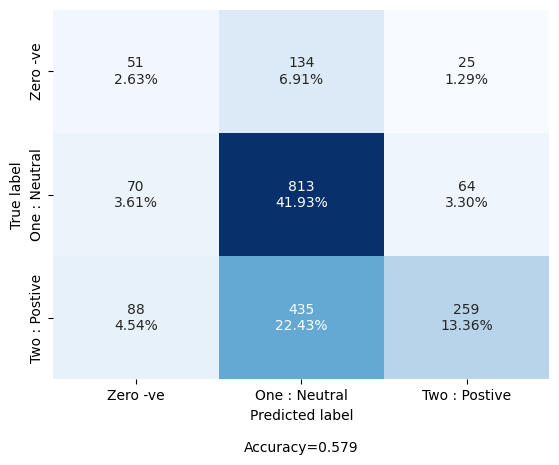

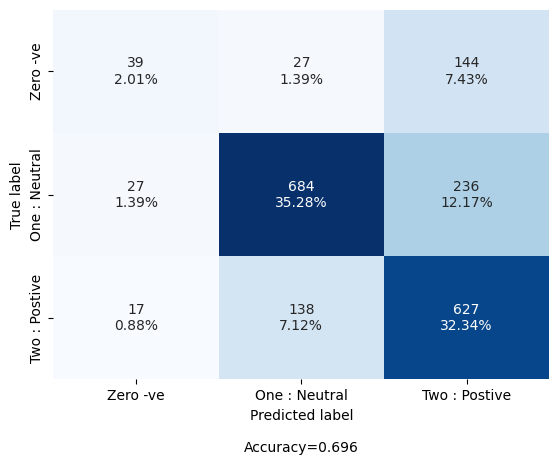

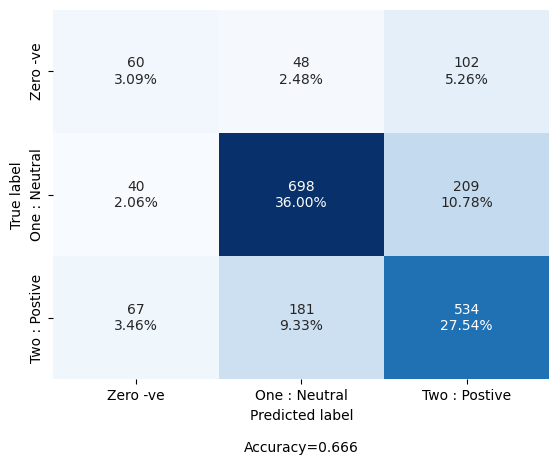

In [831]:
## Experiment-1 Defining a base models on Raw Text with BOW approach

#Zindi corpus collection
exp1_corpus_raw_zindi = []
for text_ in raw_train_data.safe_text.values:
    exp1_corpus_raw_zindi.append(text_)
    
#Vectorising Zindi data    
exp1_count_vectorizer_zindi = CountVectorizer(ngram_range=(1,1),)
exp1_out_zindi = exp1_count_vectorizer_zindi.fit_transform(exp1_corpus_raw_zindi)
exp1_featurenames_zindi = exp1_count_vectorizer_zindi.get_feature_names_out()
exp_1_array_zindi = exp1_out_zindi.toarray()

exp1_dataframe_zindi = pd.DataFrame(exp_1_array_zindi, columns=exp1_featurenames_zindi)

#attaching label to our dataframe zindi
X = exp1_dataframe_zindi
y = raw_train_data['label']

#defining train and test data zindi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# defining base models zindi
exp1_knn = KNeighborsClassifier()
exp1_nb = MultinomialNB()
exp1_dt = DecisionTreeClassifier()


exp1_knn.fit(X_train, y_train)
exp1_nb.fit(X_train, y_train)
exp1_dt.fit(X_train, y_train)

exp1_knn_y = exp1_knn.predict(X_test)
exp1_nb_y = exp1_nb.predict(X_test)
exp1_dt_y = exp1_dt.predict(X_test)


#scoring zindi
target_names = ['class 0 -ve Sentiment', 'class 1 Netural Sentiment', 'class 2 +ve Sentiment']
exp_1_cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_categories = ['Zero -ve', 'One : Neutral', 'Two : Postive']

print("*"*50)
print('\n')
print("Classification Report for KNN Base Model zindi set--> ")
print(classification_report(y_test, exp1_knn_y, target_names=target_names))

print('CONFUSION MATRIX KNN base model zindi set-->')
cf_matrix_exp1 = confusion_matrix(y_test, exp1_knn_y)
make_confusion_matrix(cf_matrix_exp1, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

print("*"*50)
print('\n')
print("Classification Report for NB Base Model zindi set--> ")
print(classification_report(y_test, exp1_nb_y, target_names=target_names))

print('CONFUSION MATRIX NB base model zindi set-->')
cf_matrix_exp1 = confusion_matrix(y_test, exp1_nb_y)
make_confusion_matrix(cf_matrix_exp1, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

print("*"*50)
print('\n')
print("Classification Report for DT Base Model zindi set--> ")
print(classification_report(y_test, exp1_dt_y, target_names=target_names))

print('CONFUSION MATRIX DT base model zindi set -->')
cf_matrix_exp1 = confusion_matrix(y_test, exp1_dt_y)
make_confusion_matrix(cf_matrix_exp1, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

**************************************************


Classification Report for KNN Base Model King set--> 
                           precision    recall  f1-score   support

    class 0 -ve Sentiment       0.27      0.58      0.37        57
class 1 Netural Sentiment       0.18      0.38      0.24        58
    class 2 +ve Sentiment       0.71      0.04      0.07       135

                 accuracy                           0.24       250
                macro avg       0.39      0.33      0.23       250
             weighted avg       0.49      0.24      0.18       250

CONFUSION MATRIX KNN base model zindi set-->
**************************************************


Classification Report for NB Base Model King set--> 
                           precision    recall  f1-score   support

    class 0 -ve Sentiment       0.27      0.63      0.38        57
class 1 Netural Sentiment       0.15      0.29      0.20        58
    class 2 +ve Sentiment       0.67      0.04      0.08       135



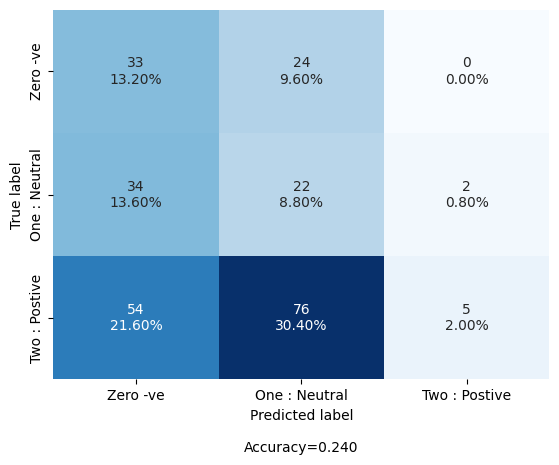

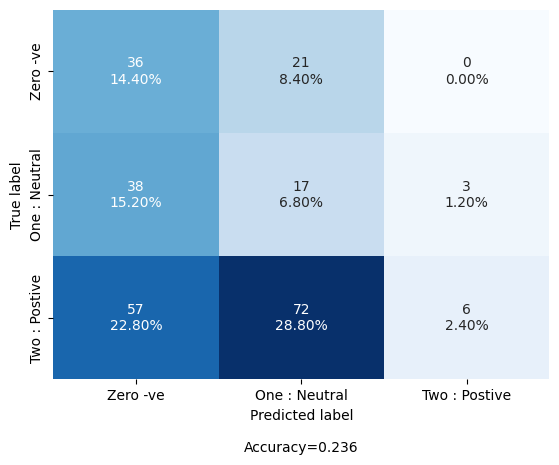

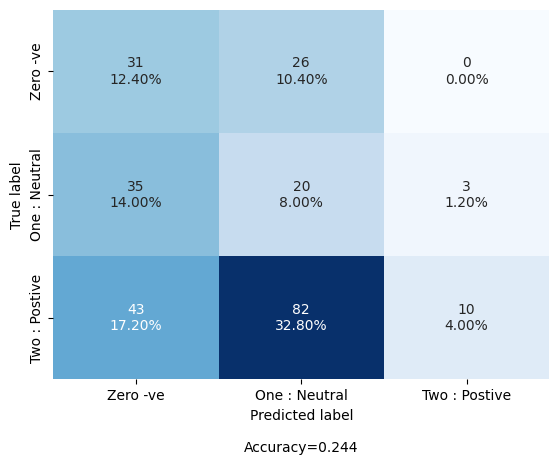

In [845]:
## Experiment-1 Continued- Defining a base models on Raw Text with BOW approach for kings data 

#King corpus collection    
exp1_corpus_raw_king = []
for text_ in raw_train_data_king.safe_text.values:
    exp1_corpus_raw_king.append(text_)
    
#Vectorising King data
exp1_count_vectorizer_king = CountVectorizer(ngram_range=(1,1),)
exp1_count_vectorizer_king.fit(exp1_corpus_raw_king)
exp1_out_king = exp1_count_vectorizer_king.transform(exp1_corpus_raw_king)
exp1_featurenames_king = exp1_count_vectorizer_king.get_feature_names_out()
exp_1_array_king = exp1_out_king.toarray()

exp1_dataframe_king = pd.DataFrame(exp_1_array_king, columns=exp1_featurenames_king)

#attaching label to our dataframe zindi
X = exp1_dataframe_king
y = raw_train_data_king['label_renamed']

#defining train and test data zindi
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# defining base models zindi
exp1_knn = KNeighborsClassifier()
exp1_nb = MultinomialNB()
exp1_dt = DecisionTreeClassifier()


exp1_knn.fit(X ,y)
exp1_nb.fit(X ,y)
exp1_dt.fit(X ,y)

exp1_knn_y = exp1_knn.predict(exp1_dataframe_king_hold_out_set_1_kishan)
exp1_nb_y = exp1_nb.predict(exp1_dataframe_king_hold_out_set_1_kishan)
exp1_dt_y = exp1_dt.predict(exp1_dataframe_king_hold_out_set_1_kishan)


#scoring zindi
target_names = ['class 0 -ve Sentiment', 'class 1 Netural Sentiment', 'class 2 +ve Sentiment']
exp_1_cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_categories = ['Zero -ve', 'One : Neutral', 'Two : Postive']

print("*"*50)
print('\n')
print("Classification Report for KNN Base Model King set--> ")
print(classification_report(kishan_hold_out_1.label, exp1_knn_y, target_names=target_names))

print('CONFUSION MATRIX KNN base model zindi set-->')
cf_matrix_exp1 = confusion_matrix(kishan_hold_out_1.label, exp1_knn_y)
make_confusion_matrix(cf_matrix_exp1, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

print("*"*50)
print('\n')
print("Classification Report for NB Base Model King set--> ")
print(classification_report(kishan_hold_out_1.label, exp1_nb_y, target_names=target_names))

print('CONFUSION MATRIX NB base model King set-->')
cf_matrix_exp1 = confusion_matrix(kishan_hold_out_1.label, exp1_nb_y)
make_confusion_matrix(cf_matrix_exp1, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

print("*"*50)
print('\n')
print("Classification Report for DT Base Model King set--> ")
print(classification_report(kishan_hold_out_1.label, exp1_dt_y, target_names=target_names))

print('CONFUSION MATRIX DT base model King set -->')
cf_matrix_exp1 = confusion_matrix(kishan_hold_out_1.label, exp1_dt_y)
make_confusion_matrix(cf_matrix_exp1, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

Observations by Team:- 
> - For the Zindi data we tried, KNN, NB, DT and observed accuracy of 60%, 68%, 67% 
> - For the King's data we tried KNN, NB, DT and observed accuracy of 24%, 23%, 24%


Suggestions by Team:- 
> - We beleive due to data imbalancing these figures were high, or random model predicted well this time. 
> - Also, these models were not tested on the real test data to baseline them properly
> - For the Zindi data baseline model should atleast perform more than __57%__ accuracy.
> - For the King's data baseline model should atleast perform more than __23%__ Accuracy

<br>

## C. Can We use TSNE and PCA in our purpose of classification

#### - Experiment - 2 for Checking PCA and TSNE on Raw data for Sentiment Classification


##### 1. PCA:

In [88]:
raw_train_data['temp_'] = raw_train_data['label']
raw_train_data['temp_'] = raw_train_data['temp_'].astype('int')

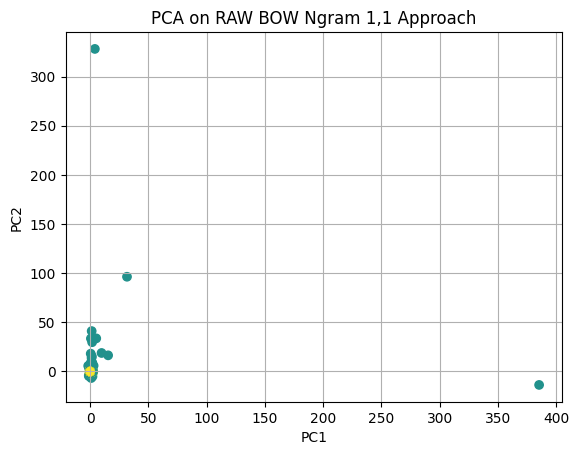

In [90]:
# PCA on Zindi 
# Standardize the features

X = exp1_dataframe_zindi.values
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

# Plot the results
plt.figure()
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=list(raw_train_data.temp_.values))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.title('PCA on RAW BOW Ngram 1,1 Approach')
plt.show()

In [92]:
raw_train_data_king['temp_'] = raw_train_data_king['label']
raw_train_data_king['temp_'] = raw_train_data_king['temp_'].astype('int')

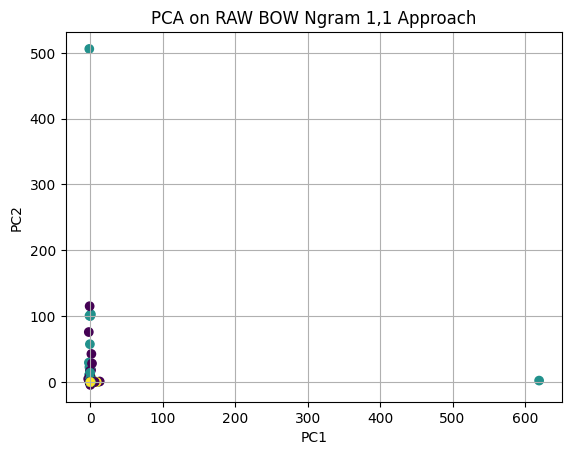

In [93]:
# PCA on King's Data 
# Standardize the features
X = exp1_dataframe_king.values
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

# Plot the results
plt.figure()
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=list(raw_train_data_king.temp_.values))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.title('PCA on RAW BOW Ngram 1,1 Approach')
plt.show()

##### -2 TSNE:

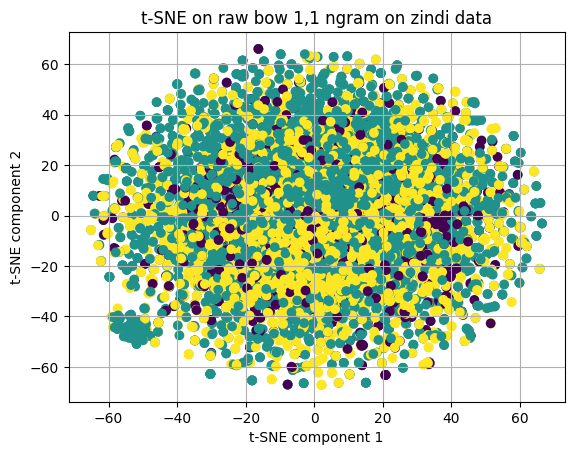

In [96]:
# TSNE on Raw Zindi Data
# Standardize the features
X = exp1_dataframe_zindi.values
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
tsne_components = tsne.fit_transform(X_std)

# Plot the results
plt.figure()
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=list(raw_train_data.temp_.values))
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE on raw bow 1,1 ngram on zindi data')
plt.grid()
plt.show()

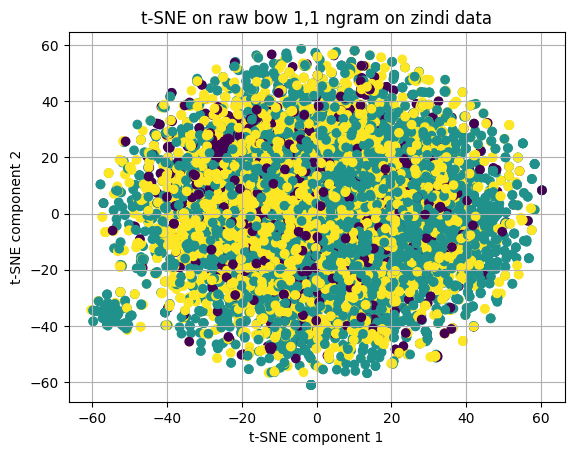

In [97]:
# TSNE on Raw Zindi Data
# Standardize the features
X = exp1_dataframe_zindi.values
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=500)
tsne_components = tsne.fit_transform(X_std)

# Plot the results
plt.figure()
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=list(raw_train_data.temp_.values))
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE on raw bow 1,1 ngram on zindi data')
plt.grid()
plt.show()

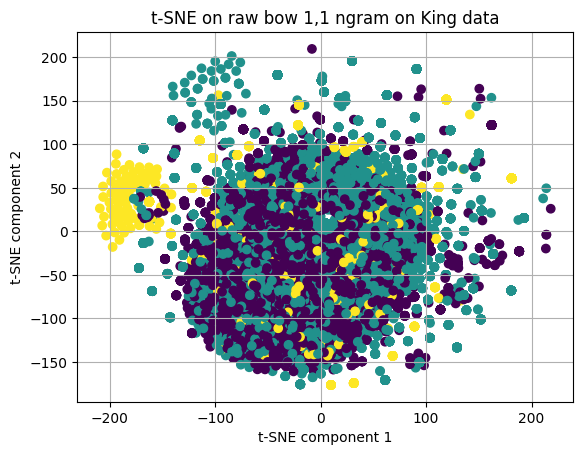

In [98]:
# TSNE on Raw King's Data
# Standardize the features
X = exp1_dataframe_king.values
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=500)
tsne_components = tsne.fit_transform(X_std)

# Plot the results
plt.figure()
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=list(raw_train_data_king.temp_.values))
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE on raw bow 1,1 ngram on King data')
plt.grid()
plt.show()

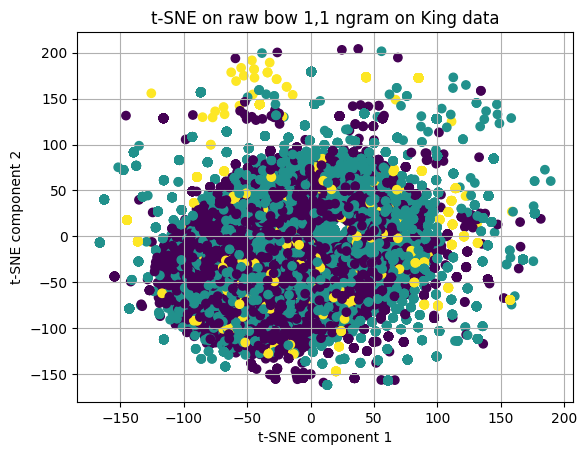

In [100]:
# TSNE on Raw King's Data
# Standardize the features
X = exp1_dataframe_king.values
X_std = (X - X.mean(axis=0)) / X.std(axsis=0)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=80, learning_rate=500)
tsne_components = tsne.fit_transform(X_std)

# Plot the results
plt.figure()
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=list(raw_train_data_king.temp_.values))
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE on raw bow 1,1 ngram on King data')
plt.grid()
plt.show()

In [101]:
## droping temp_ columns which were used for PCA and TSNE

raw_train_data.drop(columns=['temp_'], axis=1, inplace=True)
raw_train_data_king.drop(columns=['temp_'], axis=1, inplace=True)

Observations by Team:- 
> - For the PCA and TSNE, We did not observe any promising results.

Suggestions by Team:- 
> - Need proper ML Techniques backed up by good feature Engineering

<br>

## D. Some Data Exploration, Cleaning, Feature Engineering

#### - 1. For Zindi Data

In [846]:
# seeing the dataset
raw_train_data

safe_text label
0      Me &amp; The Big Homie meanboy3000 #MEANBOY #M...     1
1      I'm 100% thinking of devoting my career to pro...     2
2      #whatcausesautism VACCINES, DO NOT VACCINATE Y...     0
3      I mean if they immunize my kid with something ...     0
4      Thanks to <user> Catch me performing at La Nui...     1
...                                                  ...   ...
9996   Living in a time where the sperm I used to was...     2
9997   <user> <user>  In spite of all measles outbrea...     2
9998   Interesting trends in child immunization in Ok...     1
9999   CDC Says Measles Are At Highest Levels In Deca...     1
10000  Pneumonia vaccine: for women w risk of pulmona...     2

[9692 rows x 2 columns]

In [847]:
# understanding few tweets
raw_train_data.safe_text.values[0]

'Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>'

In [848]:
raw_train_data.safe_text.values[10]

"<user> @ this point I have 2 text, butw/Bon Jovi cover playin @ Alibi's hope U can come out 2 MMR BBQ<user> will b there!"

In [849]:
raw_train_data.safe_text.values[100]

'"<user> Conservative Neurosurgeon Ben Carson Says Vaccines Are A Public Health Issue <url> 1 thing I agree with him on.'

In [850]:
raw_train_data.safe_text.values[1000]

'“<user> <user> Polio vaccine. It kept me from infecting and/or killing millions. #pathogenposse”. //I still vote yoga pants.'

In [851]:
raw_train_data.safe_text.values[4320]

"#HerdImmunity aside, if you don't vaccinate your kids, then they can't be friends with mine and neither can we. #JennyMcCarthyIsWrong"

In [852]:
raw_train_data.safe_text.values[2223]

'"He looks like woody from toy story with the measles that went through a bionic disease" - Tanner 😂😂'

In [853]:
raw_train_data.safe_text.values[1123]

'Me: What does measles even do to you? <user> : puts hair on your balls'

In [854]:
raw_train_data.safe_text.values[7119]

'Metro Health urges measles vaccination: A measles outbreak in California has local health officials on alert and… <url>'

In [855]:
raw_train_data.safe_text.values[5410]

'AM-News : HIV vaccine elicits anti-V1V2 IgG antibody response in infants: Two investigational HIV vaccines... <url>'

Observations by Team:- 
> - Can see there are few user tags, url's, emojicons, #, :, word1-word2, @ and many more. 
> - Some words are capitalised, this will create our BOW words model take more space in memory

Suggestions by Team:-
> - Convert the words to lower case
> - Should remove Urls
> - Should remove html tags
> - Should remove lxml 
> - Decontracting phrases
> - Removing word with numbers
> - Should remove puncutations, characters and fill them with spaces
> - Should apply Stemmer, lemmitization
> - Should remove common Stop words
> - Should remove user tags
> - Should replace & with and


Some Feature Engineering suggestions by team:-
> - Can we get total length of the text and log of length the text
> - Count of the total words
> - Count of upper case characters
> - Word Density
> - Numeric Characters count
> - Count of Total Stop words
> - Count of upper case chars
> - Average word rate
> - Punctuation Count
> - Hastag Count


Further Suggestions/ Future Scope of Work:- 
> - Before applying full data cleaning can we apply normal data cleaning and get subject verb action of tweets etc
> - Can we also get emjoi's and emoticon's as they are useful for detecting person's emotion
> - detecting and using emoji's
> - NER for any city/company/places detection
> - hastags and mentions

In [856]:
# Before Cleanning getting some Features for Zindi data

raw_train_data['uncleaned_text_len'] = raw_train_data['safe_text'].apply(lambda text:len(text))
raw_train_data['log_uncleaned_text_len'] = raw_train_data['uncleaned_text_len'].apply(lambda length:np.round(np.log(length), 4))

from nltk.corpus import stopwords
stop = stopwords.words('english')

raw_train_data['uncleaned_text_stopwords'] = raw_train_data['safe_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
raw_train_data['uncleaned_text_upper'] = raw_train_data['safe_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

raw_train_data['uncleaned_avg_word'] = raw_train_data['safe_text'].apply(lambda x: avg_word(x))
raw_train_data['uncleaned_text_punctuation_count'] = raw_train_data['safe_text'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
raw_train_data['uncleaned_text_hastag_count'] = raw_train_data['safe_text'].apply(lambda x: len("".join(_ for _ in x if _=="#"))) 
raw_train_data['uncleaned_text_word_count']=raw_train_data['safe_text'].apply(lambda x: len(str(x).split(" ")))
raw_train_data['uncleaned_word_density'] = raw_train_data['uncleaned_text_len'] / (raw_train_data['uncleaned_text_word_count']+1)

In [857]:
## getiing some requirements
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/saikumarreddypochireddygari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [858]:
#Cleaning Block for Zindi Train Data
# Functions for cleaning Zindi data


#Some inits
STOPWORDS = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

corpus_cleaned_train = []


def decontracted(phrase): 
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase) 
    # general
    phrase = re.sub(r"n\'t", " not", phrase) 
    phrase = re.sub(r"\'re", " are", phrase) 
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase) 
    phrase = re.sub(r"\'ll", " will", phrase) 
    phrase = re.sub(r"\'t", " not", phrase) 
    phrase = re.sub(r"\'ve", " have", phrase) 
    phrase = re.sub(r"\'m", " am", phrase) 
    
    return phrase

def text_cleaner(text):
    text = str(text)
    # Remove <user>   tags
    text = re.sub(r'<.*?>', '',   text)
    # Replace &amp; with   'and'
    text = re.sub(r"&amp;", "and",   text) 
    # Replace punctuation   characters with spaces
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, "   ") for c in  filters)
    translate_map =   str.maketrans(translate_dict)
    text = text.translate(translate_map)
    # Remove URL's
    text = re.sub(r"http\S+" , "" , text)
    # Remove html tags
    text=re.sub(r"<[^<]+?>", "" , text)
    # Removing lxml
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # Decontracting phares
    text=decontracted(text)
    # Removing word with numbers
    text=re.sub("S*\d\S*" , "" , text)
     # Remove Special charactor punc spaces
    text=re.sub(r"\W+", " ", text)
    
    # Removing other languages
    pattern = r"\b[A-Za-z]+\b"
    matches_list = re.findall(pattern, text)
    text = ' '.join(e.lower() for e in matches_list if e.lower() not in STOPWORDS)
    
    # Stop word removal
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in STOPWORDS)
    
    # Convert text to   lowercase
    text = text.strip().lower()
    corpus_cleaned_train.append(text)
    return  text


def text_cleaner_(text):
    text = str(text)
    # Remove <user> tags
    text = re.sub(r'<.*?>', '', text)
    # Replace &amp; with 'and'
    text = re.sub(r"&amp;", "and", text) 
    # Replace punctuation characters with spaces
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    # Remove URL's
    text = re.sub(r"http\S+", "" , text)
    # Remove html tags
    text = re.sub(r"<[^<]+?>", "", text)
    # Removing lxml
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # Decontracting phrases
    text = decontracted(text)
    # Removing word with numbers
    text = re.sub("S*\d\S*", "", text)
    # Remove Special character punc spaces
    text = re.sub(r"\W+", " ", text)
    # Removing other languages
    pattern = r"\b[A-Za-z]+\b"
    matches_list = re.findall(pattern, text)
    text = ' '.join(e.lower() for e in matches_list if e.lower() not in STOPWORDS)
    # Stop word removal
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in STOPWORDS)
    # Stemming
    #text = ' '.join(stemmer.stem(e) for e in text.split())
    # Lemmatization
    #text = ' '.join(lemmatizer.lemmatize(e) for e in text.split())
    # Convert text to lowercase
    #text = text.strip().lower()
    corpus_cleaned_train.append(text)
    return text



## Applying Data Cleaning 
raw_train_data['CLEANED_TEXT'] = raw_train_data['safe_text'].apply(lambda text: text_cleaner_(text))




In [859]:
## Getting some Features after Data Cleaning on Zindi Data
raw_train_data['cleaned_text_len'] = raw_train_data['CLEANED_TEXT'].apply(lambda text:len(text))
raw_train_data['log_cleaned_text_len'] = raw_train_data['cleaned_text_len'].apply(lambda length:np.round(np.log(length), 4))

def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+1))#padding 1 to avoid division by 0

raw_train_data['cleaned_avg_word'] = raw_train_data['CLEANED_TEXT'].apply(lambda x: avg_word(x))
raw_train_data['cleaned_text_word_count']=raw_train_data['CLEANED_TEXT'].apply(lambda x: len(str(x).split(" ")))
raw_train_data['cleaned_word_density'] = raw_train_data['cleaned_text_len'] / (raw_train_data['cleaned_text_word_count']+1)

In [860]:
# Checking for any Nulls
raw_train_data.isnull().sum()

safe_text                           0
label                               0
uncleaned_text_len                  0
log_uncleaned_text_len              0
uncleaned_text_stopwords            0
uncleaned_text_upper                0
uncleaned_avg_word                  0
uncleaned_text_punctuation_count    0
uncleaned_text_hastag_count         0
uncleaned_text_word_count           0
uncleaned_word_density              0
CLEANED_TEXT                        0
cleaned_text_len                    0
log_cleaned_text_len                0
cleaned_avg_word                    0
cleaned_text_word_count             0
cleaned_word_density                0
dtype: int64

In [861]:
# Columns of Raw Train Zindi Data
raw_train_data.columns

Index(['safe_text', 'label', 'uncleaned_text_len', 'log_uncleaned_text_len',
       'uncleaned_text_stopwords', 'uncleaned_text_upper',
       'uncleaned_avg_word', 'uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count', 'uncleaned_text_word_count',
       'uncleaned_word_density', 'CLEANED_TEXT', 'cleaned_text_len',
       'log_cleaned_text_len', 'cleaned_avg_word', 'cleaned_text_word_count',
       'cleaned_word_density'],
      dtype='object')

Text(0.5, 1.0, 'Corelation Map for Zindi Feature Engineered Features')

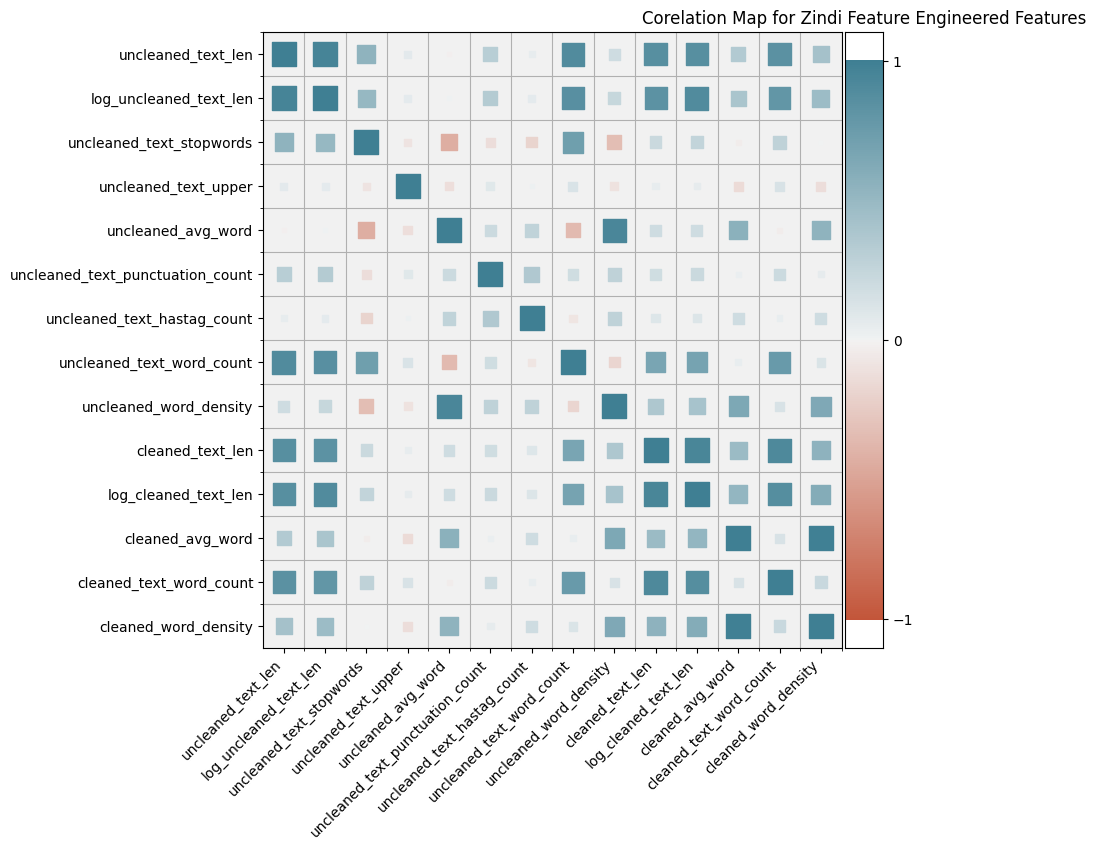

In [622]:
#### But how are these features Usefull? 
# Plot Source:- https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

## - Lets do a co-relation and understand them
plt.figure(figsize=(8, 8))


#Filtering some Features
corr_data = raw_train_data[['uncleaned_text_len', 'log_uncleaned_text_len',
       'uncleaned_text_stopwords', 'uncleaned_text_upper',
       'uncleaned_avg_word', 'uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count', 'uncleaned_text_word_count',
       'uncleaned_word_density','cleaned_text_len',
       'log_cleaned_text_len', 'cleaned_avg_word', 'cleaned_text_word_count',
       'cleaned_word_density']]

corrplot(corr_data.corr(), size_scale=300)

plt.title("Corelation Map for Zindi Feature Engineered Features")

Observations by Team:- 
> - We can see that there are many strong positive co-relations among features, so we can keep one and remove the later.

Suggestions by Team:- 
> - Should Remove Uncleaned text Length, as it strongly co-relates to cleaned text length, log_uncleaned_text_length, uncleaned_text_word_count, log_cleaned_text_length, cleaned text_word_count

Text(0.5, 1.0, 'Corelation Map for Zindi Feature Engineered Features')

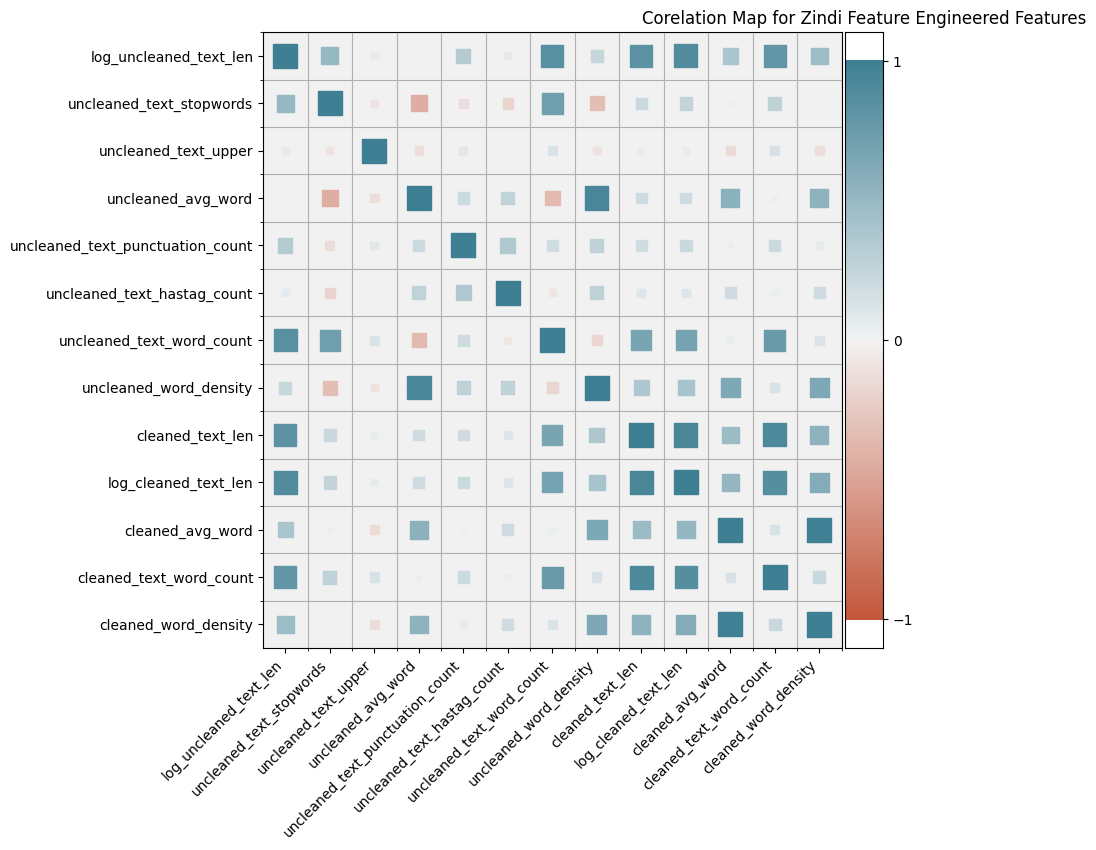

In [623]:
## - co-relation continued - removed uncleaned_text_length
plt.figure(figsize=(8, 8))


#Filtering some Features
corr_data = raw_train_data[['log_uncleaned_text_len',
       'uncleaned_text_stopwords', 'uncleaned_text_upper',
       'uncleaned_avg_word', 'uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count', 'uncleaned_text_word_count',
       'uncleaned_word_density','cleaned_text_len',
       'log_cleaned_text_len', 'cleaned_avg_word', 'cleaned_text_word_count',
       'cleaned_word_density']]

corrplot(corr_data.corr(), size_scale=300)

plt.title("Corelation Map for Zindi Feature Engineered Features")

Observations by Team:- 
> - We can see that there are many strong positive co-relations among features, so we can keep one and remove the later.

Suggestions by Team:- 
> - Should Remove Log uncleaned text Length, as it strongly co-relates to cleaned text length, log_uncleaned_text_length, uncleaned_text_word_count, log_cleaned_text_length, cleaned text_word_count

Text(0.5, 1.0, 'Corelation Map for Zindi Feature Engineered Features')

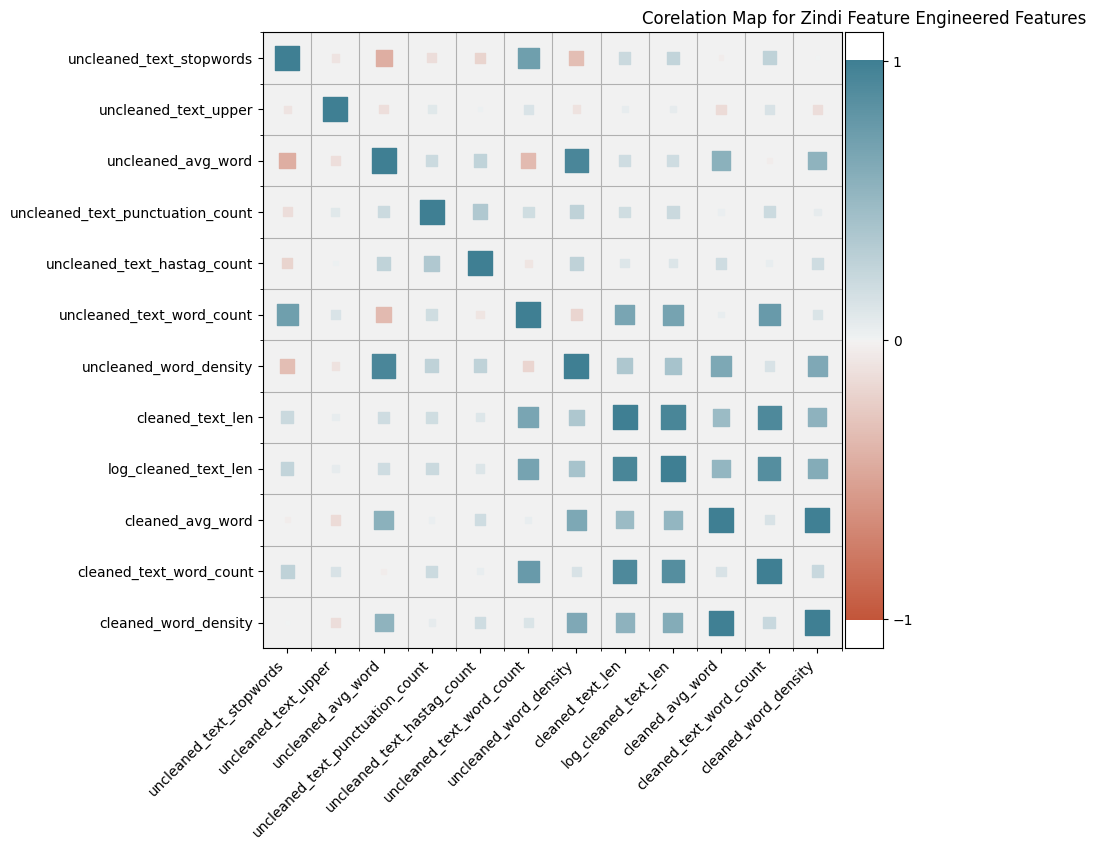

In [624]:
## - co-relation continued - removed uncleaned_text_length, log_uncleaned_text_length
plt.figure(figsize=(8, 8))


#Filtering some Features
corr_data = raw_train_data[['uncleaned_text_stopwords', 'uncleaned_text_upper',
       'uncleaned_avg_word', 'uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count', 'uncleaned_text_word_count',
       'uncleaned_word_density','cleaned_text_len',
       'log_cleaned_text_len', 'cleaned_avg_word', 'cleaned_text_word_count',
       'cleaned_word_density']]

corrplot(corr_data.corr(), size_scale=300)

plt.title("Corelation Map for Zindi Feature Engineered Features")

Observations by Team:- 
> - We can see that there are many strong positive co-relations among features, so we can keep one and remove the later.

Suggestions by Team:- 
> - Should Remove uncleaned average word, as it strongly co-relates to uncleaned_word_density

Text(0.5, 1.0, 'Corelation Map for Zindi Feature Engineered Features')

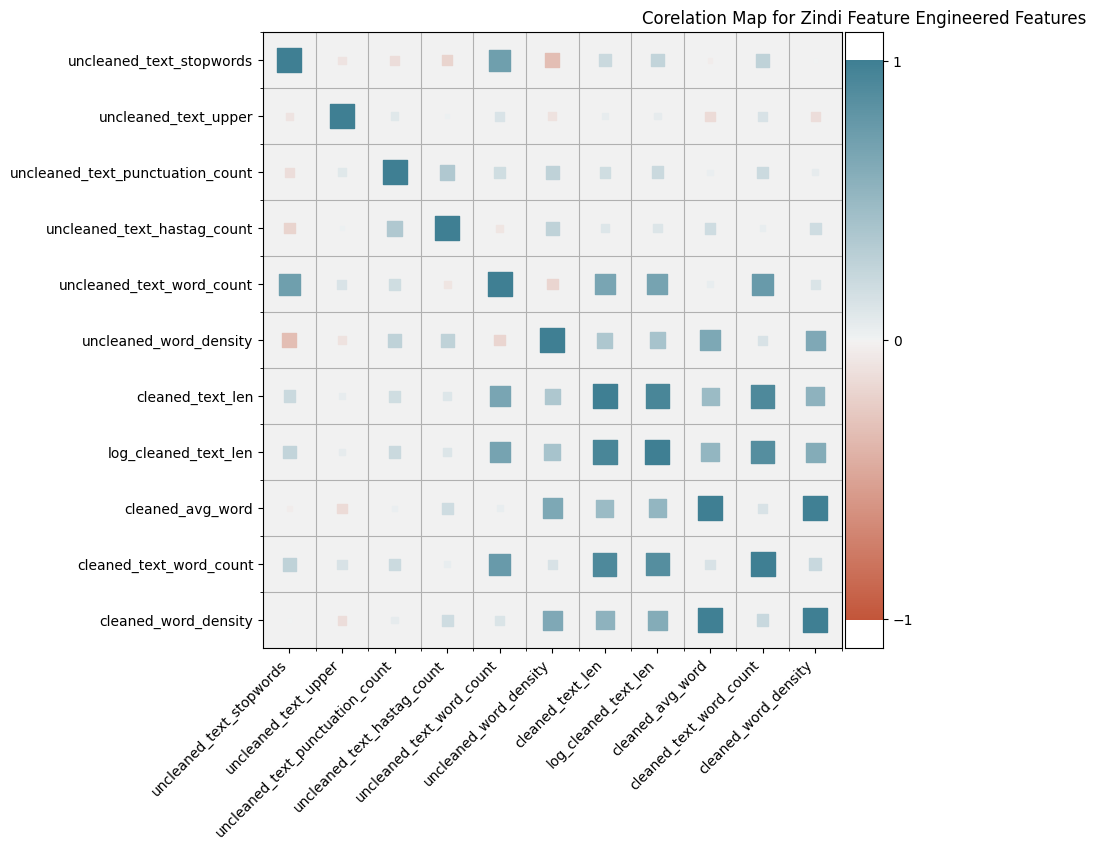

In [625]:
## - co-relation continued - removed uncleaned_text_length, log_uncleaned_text_length, uncleaned_avg_word,
plt.figure(figsize=(8, 8))


#Filtering some Features
corr_data = raw_train_data[['uncleaned_text_stopwords', 'uncleaned_text_upper','uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count', 'uncleaned_text_word_count',
       'uncleaned_word_density','cleaned_text_len',
       'log_cleaned_text_len', 'cleaned_avg_word', 'cleaned_text_word_count',
       'cleaned_word_density']]

corrplot(corr_data.corr(), size_scale=300)

plt.title("Corelation Map for Zindi Feature Engineered Features")

Observations by Team:- 
> - We can see that there are many strong positive co-relations among features, so we can keep one and remove the later.

Suggestions by Team:- 
> - Should Remove log_cleaned_text_kength, as it strongly co-relates to cleaned_text_length, cleaned_text_word_count

Text(0.5, 1.0, 'Corelation Map for Zindi Feature Engineered Features')

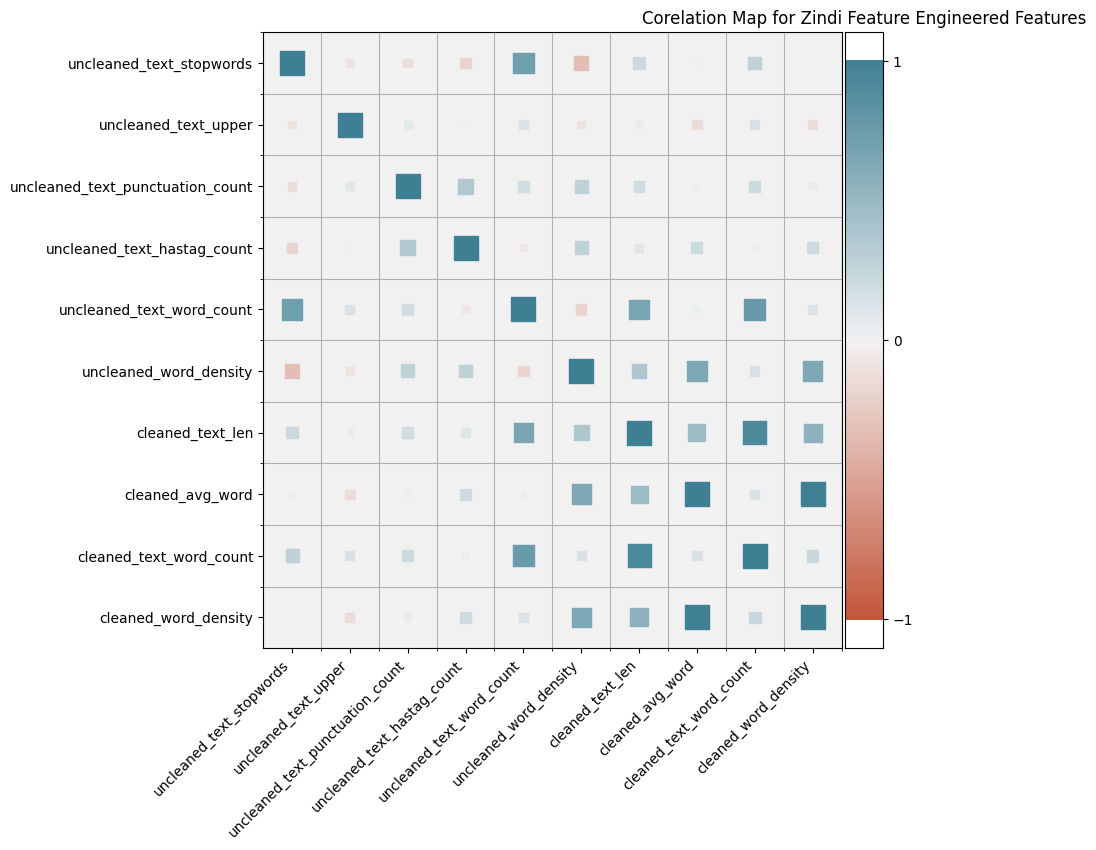

In [626]:
## - co-relation continued - removed uncleaned_text_length, log_uncleaned_text_length, uncleaned_avg_word,cleaned_text_log
plt.figure(figsize=(8, 8))


#Filtering some Features
corr_data = raw_train_data[['uncleaned_text_stopwords', 'uncleaned_text_upper','uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count', 'uncleaned_text_word_count',
       'uncleaned_word_density','cleaned_text_len','cleaned_avg_word', 'cleaned_text_word_count',
       'cleaned_word_density']]

corrplot(corr_data.corr(), size_scale=300)

plt.title("Corelation Map for Zindi Feature Engineered Features")

Observations by Team:- 
> - We can see that there are many strong positive co-relations among features, so we can keep one and remove the later.

Suggestions by Team:- 
> - Should Remove cleaned_text_word_count, as it strongly co-relates to cleaned_text_length, uncleaned_text_word_count


Text(0.5, 1.0, 'Corelation Map for Zindi Feature Engineered Features')

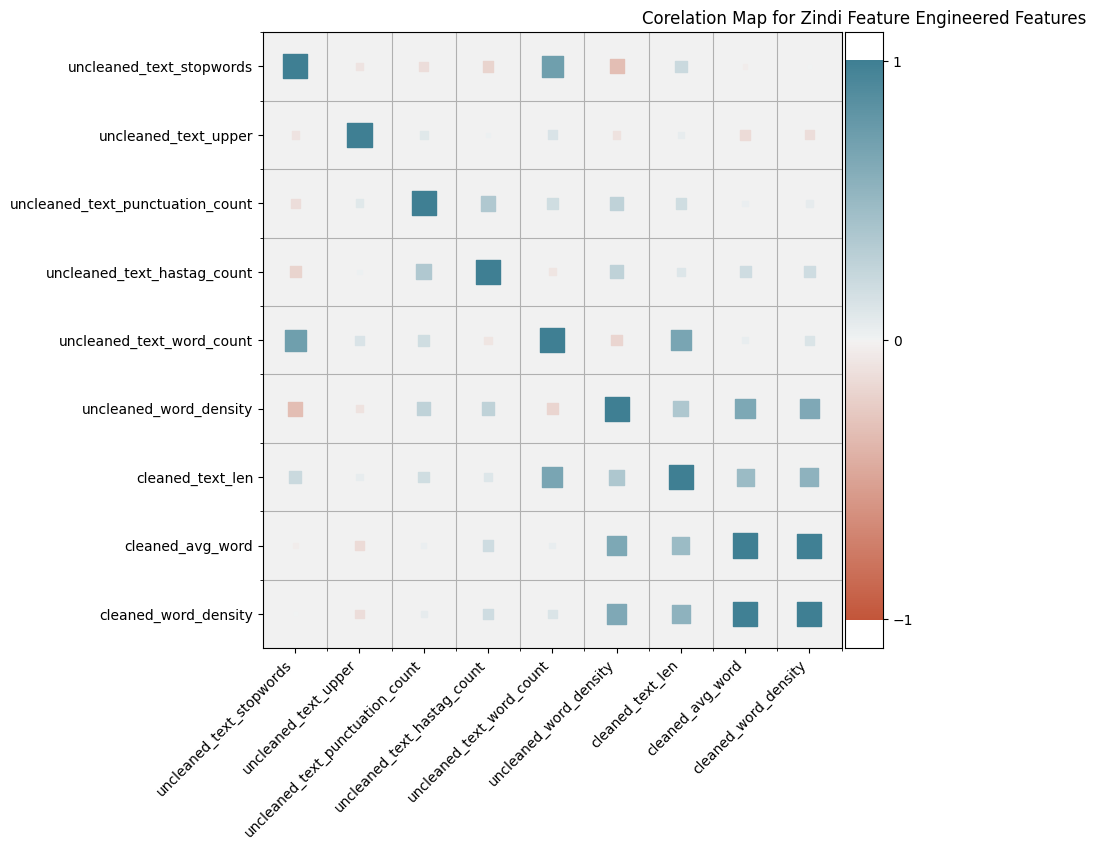

In [627]:
## - co-relation continued - removed uncleaned_text_length, log_uncleaned_text_length, uncleaned_avg_word,cleaned_text_log, cleaned_text_word_count
plt.figure(figsize=(8, 8))


#Filtering some Features
corr_data = raw_train_data[['uncleaned_text_stopwords', 'uncleaned_text_upper','uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count', 'uncleaned_text_word_count',
       'uncleaned_word_density','cleaned_text_len','cleaned_avg_word',
       'cleaned_word_density']]

corrplot(corr_data.corr(), size_scale=300)

plt.title("Corelation Map for Zindi Feature Engineered Features")

Observations by Team:- 
> - We can see that there are many strong positive co-relations among features, so we can keep one and remove the later.

Suggestions by Team:- 
> - Should Remove cleaned_avg_word, as it strongly co-relates to cleaned_word_density


Text(0.5, 1.0, 'Corelation Map for Zindi Feature Engineered Features')

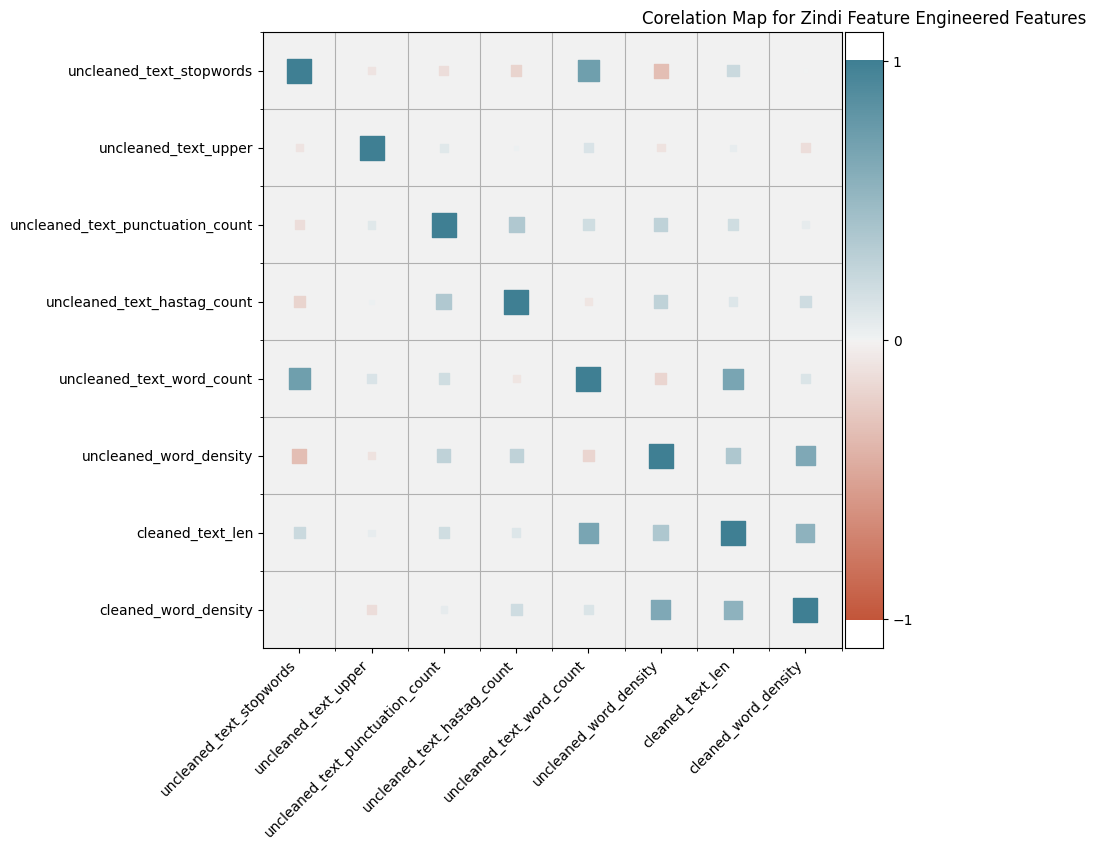

In [628]:
## - co-relation continued - removed uncleaned_text_length, log_uncleaned_text_length, uncleaned_avg_word,cleaned_text_log, cleaned_text_word_count
#### - cleaned avg word
plt.figure(figsize=(8, 8))


#Filtering some Features
corr_data = raw_train_data[['uncleaned_text_stopwords', 'uncleaned_text_upper','uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count', 'uncleaned_text_word_count',
       'uncleaned_word_density','cleaned_text_len',
       'cleaned_word_density']]

corrplot(corr_data.corr(), size_scale=300)

plt.title("Corelation Map for Zindi Feature Engineered Features")

Observations by Team:- 
> - We almost got rid of co-relations


In [629]:
raw_train_data.columns
## - co-relation continued - removed uncleaned_text_length, log_uncleaned_text_length, uncleaned_avg_word,cleaned_text_log, cleaned_text_word_count
#### - cleaned avg word

Index(['safe_text', 'label', 'uncleaned_text_len', 'log_uncleaned_text_len',
       'uncleaned_text_stopwords', 'uncleaned_text_upper',
       'uncleaned_avg_word', 'uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count', 'uncleaned_text_word_count',
       'uncleaned_word_density', 'CLEANED_TEXT', 'cleaned_text_len',
       'log_cleaned_text_len', 'cleaned_avg_word', 'cleaned_text_word_count',
       'cleaned_word_density'],
      dtype='object')

In [630]:
## Lets remove the features and store original data features as well

raw_train_data.to_csv("BEFORE_CO-RELATION_CLEANEDDATA_ZINDI.csv", header=True, index=False)
raw_train_data.drop(columns=['uncleaned_text_len','log_uncleaned_text_len','uncleaned_avg_word','log_cleaned_text_len','cleaned_avg_word', 'cleaned_text_word_count'], axis=1, inplace=True)
raw_train_data.to_csv("AFTER_CO-RELATION_CLEANEDDATA_KING.csv", header=True, index=False)


In [863]:
#showing final cleaned featureengineered training data of Zindi
raw_train_data

safe_text label  \
0      Me &amp; The Big Homie meanboy3000 #MEANBOY #M...     1   
1      I'm 100% thinking of devoting my career to pro...     2   
2      #whatcausesautism VACCINES, DO NOT VACCINATE Y...     0   
3      I mean if they immunize my kid with something ...     0   
4      Thanks to <user> Catch me performing at La Nui...     1   
...                                                  ...   ...   
9996   Living in a time where the sperm I used to was...     2   
9997   <user> <user>  In spite of all measles outbrea...     2   
9998   Interesting trends in child immunization in Ok...     1   
9999   CDC Says Measles Are At Highest Levels In Deca...     1   
10000  Pneumonia vaccine: for women w risk of pulmona...     2   

       uncleaned_text_len  log_uncleaned_text_len  uncleaned_text_stopwords  \
0                      90                  4.4998                         0   
1                     140                  4.9416                         8   
2                      55                  4.0073                         0   
3                     138                  4.9273                        15   
4                     106                  4.6634                         4   
...                   ...                     ...                       ...   
9996                  137                  4.9200                        13   
9997                  109                  4.6913                         6   
9998                   93                  4.5326                         4   
9999                   95                  4.5539                         3   
10000                  84                  4.4308                         3   

       uncleaned_text_upper  uncleaned_avg_word  \
0                         5            5.066667   
1                         1            4.640000   
2                         6            7.000000   
3                         2            3.964286   
4                         1            4.350000   
...                     ...                 ...   
9996                      1            4.307692   
9997                      2            4.450000   
9998                      0            6.230769   
9999                      2            4.647059   
10000                     1            5.000000   

       uncleaned_text_punctuation_count  uncleaned_text_hastag_count  \
0                                    11                            5   
1                                     4                            0   
2                                     2                            1   
3                                     4                            0   
4                                     8                            2   
...                                 ...                          ...   
9996                                  2                            1   
9997                                  6                            0   
9998                                  5                            0   
9999                                 11                            0   
10000                                 4                            0   

       uncleaned_text_word_count  uncleaned_word_density  \
0                             15                5.625000   
1                             25                5.384615   
2                              7                6.875000   
3                             28                4.758621   
4                             20                5.047619   
...                          ...                     ...   
9996                          26                5.074074   
9997                          21                4.954545   
9998                          13                6.642857   
9999                          17                5.277778   
10000                         15                5.250000   

                                            CLEANED_TEXT  cleaned_text_len  \
0      big homie meanboy mea

<br>

<br>

## D. Continued with experiment
#### Performing an experiment - 3 
#### Are these feature engineered features help us in classification? Lets Use Tsne and PCA to check our idea...! its efficient than ML Techniques


#### - 1. PCA Zindi

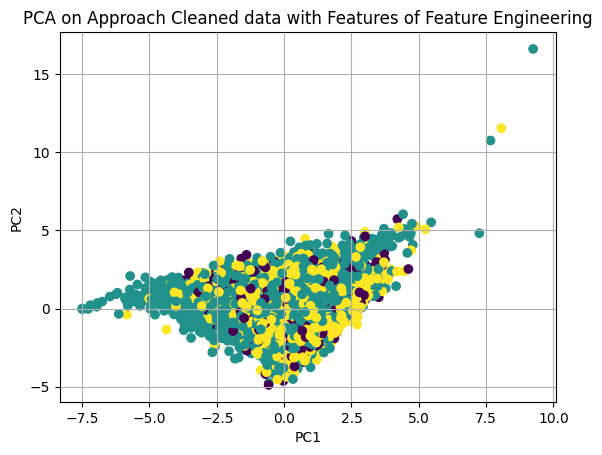

In [632]:
# PCA on Zindi 
# Standardize the features
df_ = raw_train_data[['uncleaned_text_stopwords',
       'uncleaned_text_upper', 'uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count', 'uncleaned_text_word_count',
       'uncleaned_word_density','cleaned_text_len',
       'cleaned_word_density']]

df_['temp_'] = raw_train_data['label']
df_['temp_'] = df_['temp_'].astype('int')

X = df_.drop(columns=['temp_'],axis=1).values
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

# Plot the results
plt.figure()
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=list(df_.temp_.values))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.title('PCA on Approach Cleaned data with Features of Feature Engineering')
plt.show()

#### - 2. TSNE Zindi

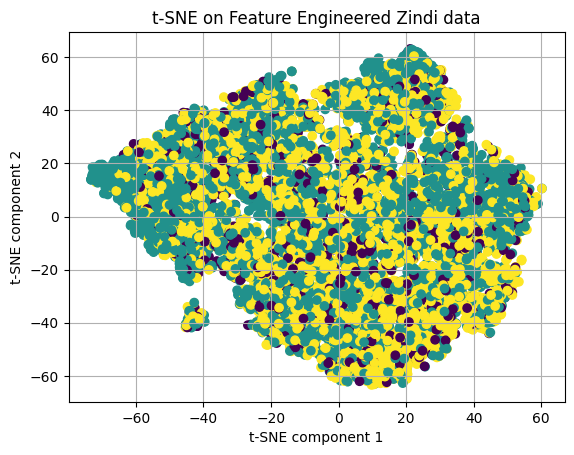

In [633]:
# TSNE Zindi
# Standardize the features
X = df_.drop(columns=['temp_'], axis=1).values
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=80, learning_rate=500)
tsne_components = tsne.fit_transform(X_std)

# Plot the results
plt.figure()
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=list(df_.temp_.values))
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE on Feature Engineered Zindi data')
plt.grid()
plt.show()

Observations by Team:- 
> - We can see there no complete/partial classification of sentiments. 




<br>

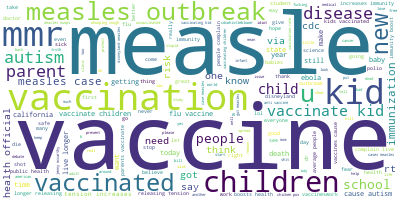

In [634]:
#Full text Word Cloud
from PIL import Image

w = wordcloud.WordCloud(background_color="white")
text = " ".join(raw_train_data['CLEANED_TEXT'].tolist())
w.generate(text)
w.to_file("word_cloud_Zindi_Data_cleaned_init.png")

img = Image.open("word_cloud_Zindi_Data_cleaned_init.png")
display(img)

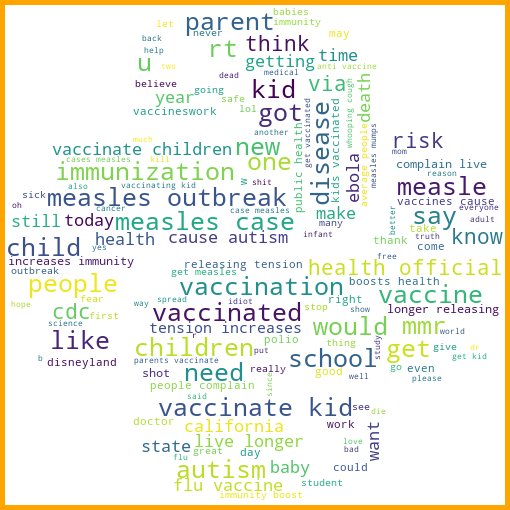

In [635]:
#source:-  Chat Gpt & https://medium.com/techtofreedom/5-levels-of-generating-word-cloud-in-python-e95471d0d9b1

import wordcloud
import imageio.v3 as iio
from IPython.display import display, Image
from PIL import ImageOps
from PIL import Image

mk = iio.imread("PythonLogo.jpeg")
w = wordcloud.WordCloud(mask=mk,
                        background_color="white",
                        stopwords=set(stop),
                        min_font_size=8,
                        max_font_size=25,
                        repeat=True,
                        )

text = " ".join(raw_train_data['CLEANED_TEXT'].tolist())
w.generate(text)
w.to_file("word_cloud_Zindi_Data_cleaned.png")


# Adding a border
img = ImageOps.expand(Image.open("word_cloud_Zindi_Data_cleaned.png"), border=5, fill='orange')

display(img)

In [636]:
# Getting the Frequencies of words
word_freq = w.words_
for word_,perc_ in word_freq.items():
    print((word_, str(np.round(perc_,2)) + " %"))

('vaccine', '1.0 %')
('measle', '0.87 %')
('vaccination', '0.47 %')
('mmr', '0.42 %')
('kid', '0.34 %')
('children', '0.29 %')
('measles outbreak', '0.27 %')
('u', '0.27 %')
('get', '0.26 %')
('new', '0.22 %')
('disease', '0.22 %')
('parent', '0.21 %')
('vaccinate kid', '0.21 %')
('child', '0.19 %')
('vaccinated', '0.19 %')
('people', '0.17 %')
('school', '0.16 %')
('measles case', '0.16 %')
('immunization', '0.16 %')
('autism', '0.16 %')
('like', '0.15 %')
('say', '0.14 %')
('would', '0.13 %')
('one', '0.13 %')
('rt', '0.13 %')
('got', '0.13 %')
('need', '0.12 %')
('health official', '0.12 %')
('via', '0.12 %')
('risk', '0.12 %')
('think', '0.11 %')
('know', '0.11 %')
('cdc', '0.11 %')
('vaccinate children', '0.11 %')
('getting', '0.1 %')
('california', '0.1 %')
('flu vaccine', '0.1 %')
('ebola', '0.1 %')
('want', '0.1 %')
('time', '0.1 %')
('state', '0.1 %')
('cause autism', '0.1 %')
('make', '0.1 %')
('death', '0.09 %')
('year', '0.09 %')
('today', '0.09 %')
('baby', '0.09 %')
('hea

<br>

#### - 2. For King's Data

In [864]:
# seeing the dataset
raw_train_data_king

safe_text  label  label_renamed
0     New Pfizer Results: Coronavirus Vaccine Is Saf...     -1              0
1     RT @DrEricDing: BREAKINGâ€”Updated results fro...      0              1
2     RT @BBCBreaking: Coronavirus vaccine by Pfizer...     -1              0
3     This is an objectively written and factual thr...     -1              0
4     RT @AP: BREAKING: Pfizer suggests its coronavi...      0              1
...                                                 ...    ...            ...
9995  RT @Vrody_Jerome_: About the COVID vaccine: It...      0              1
9996  @DenverChannel the best way to not get sick is...      1              2
9997  RT @garrcie: being against student loan debt f...      0              1
9998  @xevtfm Would you give your child a covid vacc...     -1              0
9999  Honestly the endgame to covid didnâ€™t have to...      1              2

[10000 rows x 3 columns]

In [865]:
# understanding few tweets
raw_train_data_king.safe_text.values[0]

'New Pfizer Results: Coronavirus Vaccine Is Safe and 95% Effective https://t.co/QlC7TAM16C'

In [866]:
raw_train_data_king.safe_text.values[100]

'RT @OpenMindTV: NEW POD: Will the Novel mRNA Vaccines Be Both Efficacious and Effective?_x000D_\n_x000D_\nVaccinologist @florian_krammer joined us to discuâ€¦'

In [867]:
raw_train_data_king.safe_text.values[1003]

"The Covid vaccine propaganda convinces no-one with any intelligence. We know 'testing' is a hoax. Only an imbecile or someone greedy enough to accept a bribe would to agree to it!"

In [868]:
raw_train_data_king.safe_text.values[3303]

'RT @UberFacts: The Pfizer vaccine has now proved 95% effective in preventing coronavirus and has met the safety criteria needed for emergenâ€¦'

In [869]:
raw_train_data_king.safe_text.values[2003]

'RT @AP: BREAKING: Pfizer suggests its coronavirus vaccine is 95% effective and that the shots would protect older people most at risk of dyâ€¦'

In [870]:
raw_train_data_king.safe_text.values[4023]

'RT @Mike_Pence: President @realDonaldTrump promised the American people a safe and effective vaccine by the end of 2020 and he DELIVERED! Bâ€¦'

In [871]:
raw_train_data_king.safe_text.values[4444]

'RT @HillaryPix: #Vaccine #CovidRelief _x000D_\n@HillaryClinton at the Bloomberg New Economy Forum. _x000D_\n"Biden has a world class board of advisers to tâ€¦'

In [872]:
raw_train_data_king.safe_text.values[5555]

'"Covid Vaccine comes out"_x000D_\n._x000D_\n._x000D_\nMKBHD: Hey guys MKBHD here,_x000D_\nthis is a review video of Vaccine._x000D_\nSo I have been using this Vaccine for a couple of weeks now ðŸ˜‚ðŸ˜‚._x000D_\n#MKBHD @MKBHD'

In [873]:
raw_train_data_king.safe_text.values[6666]

'RT @ChrisVanHollen: Corporate executives shouldnâ€™t be able to game the system to profit off insider info like a COVID vaccine. Asked SEC Châ€¦'

In [874]:
raw_train_data_king.safe_text.values[7777]

'RT @Mike_Pence: President @realDonaldTrump promised the American people a safe and effective vaccine by the end of 2020 and he DELIVERED! Bâ€¦'

In [875]:
raw_train_data_king.safe_text.values[8888]

"RT @CNN: Dolly Parton's $1 million donation to coronavirus research was partly used to fund Moderna's promising Covid-19 vaccine â€” somethinâ€¦"

In [876]:
raw_train_data_king.safe_text.values[9999]

'Honestly the endgame to covid didnâ€™t have to be a vaccine. But thanks to the mishandling of the situation by our government + the careless/selfish nature of Americans, it really is the only foreseeable hope for this country.'

In [877]:
raw_train_data_king.safe_text.values[2988]

'The FDAâ€™s advisory panel is currently scheduled to meet December 8-10  to discuss #COVID19 vaccines.  If the @US_FDA authorizes the two-dose vaccine, @pfizer  said they could have up to 25 million doses available for the US by the end of the year. _x000D_\nhttps://t.co/lpvuhPUTOc'

Observations by Team:- 
> - Can see there are few user tags, url's, _x000D_, #, :,ðŸ˜‚ðŸ˜,FDAâ€™s , @ and many more. 
> - Some words are capitalised, this will create our BOW words model take more space in memory

Suggestions by Team:-
> - Convert the words to lower case
> - Should remove Urls
> - Should remove html tags
> - Should remove lxml 
> - Decontracting phrases
> - Removing word with numbers
> - Should remove puncutations, characters and fill them with spaces
> - Should apply Stemmer, lemmitization
> - Should remove common Stop words
> - Should remove user tags
> - Should replace & with and


Some Feature Engineering suggestions by team:-
> - Can we get total length of the text and log of length the text
> - Count of the total words
> - Count of upper case characters
> - Word Density
> - Numeric Characters count
> - Count of Total Stop words
> - Count of upper case chars
> - Average word rate
> - Punctuation Count
> - Hastag Count


Further Suggestions/ Future Scope of Work:- 
> - Before applying full data cleaning can we apply normal data cleaning and get subject verb action of tweets etc
> - Can we also get emjoi's and emoticon's as they are useful for detecting person's emotion
> - detecting and using emoji's
> - NER for any city/company/places detection
> - hastags and mentions

In [878]:
# Before Cleanning getting some Features for king data

raw_train_data_king['uncleaned_text_len'] = raw_train_data_king['safe_text'].apply(lambda text:len(text))
raw_train_data_king['log_uncleaned_text_len'] = raw_train_data_king['uncleaned_text_len'].apply(lambda length:np.round(np.log(length), 4))

from nltk.corpus import stopwords
stop = stopwords.words('english')

raw_train_data_king['uncleaned_text_stopwords'] = raw_train_data_king['safe_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
raw_train_data_king['uncleaned_text_upper'] = raw_train_data_king['safe_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

raw_train_data_king['uncleaned_avg_word'] = raw_train_data_king['safe_text'].apply(lambda x: avg_word(x))
raw_train_data_king['uncleaned_text_punctuation_count'] = raw_train_data_king['safe_text'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
raw_train_data_king['uncleaned_text_hastag_count'] = raw_train_data_king['safe_text'].apply(lambda x: len("".join(_ for _ in x if _=="#"))) 
raw_train_data_king['uncleaned_text_word_count']=raw_train_data_king['safe_text'].apply(lambda x: len(str(x).split(" ")))
raw_train_data_king['uncleaned_word_density'] = raw_train_data_king['uncleaned_text_len'] / (raw_train_data_king['uncleaned_text_word_count']+1)

In [879]:
#Cleaning Block for king Train Data
# Functions for cleaning king data


#Some inits
STOPWORDS = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

corpus_cleaned_train_king = []


def decontracted(phrase): 
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase) 
    # general
    phrase = re.sub(r"n\'t", " not", phrase) 
    phrase = re.sub(r"\'re", " are", phrase) 
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase) 
    phrase = re.sub(r"\'ll", " will", phrase) 
    phrase = re.sub(r"\'t", " not", phrase) 
    phrase = re.sub(r"\'ve", " have", phrase) 
    phrase = re.sub(r"\'m", " am", phrase) 
    
    return phrase

def text_cleaner(text):
    text = str(text)
    # Remove <user>   tags
    text = re.sub(r'<.*?>', '',   text)
    # Replace &amp; with   'and'
    text = re.sub(r"&amp;", "and",   text) 
    # Replace punctuation   characters with spaces
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, "   ") for c in  filters)
    translate_map =   str.maketrans(translate_dict)
    text = text.translate(translate_map)
    # Remove URL's
    text = re.sub(r"http\S+" , "" , text)
    # Remove html tags
    text=re.sub(r"<[^<]+?>", "" , text)
    # Removing lxml
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # Decontracting phares
    text=decontracted(text)
    # Removing word with numbers
    text=re.sub("S*\d\S*" , "" , text)
     # Remove Special charactor punc spaces
    text=re.sub(r"\W+", " ", text)
    
    # Removing other languages
    pattern = r"\b[A-Za-z]+\b"
    matches_list = re.findall(pattern, text)
    text = ' '.join(e.lower() for e in matches_list if e.lower() not in STOPWORDS)
    
    # Stop word removal
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in STOPWORDS)
    
    # Convert text to   lowercase
    text = text.strip().lower()
    corpus_cleaned_train.append(text)
    return  text


def text_cleaner_(text):
    text = str(text)
    # Remove <user> tags
    text = re.sub(r'<.*?>', '', text)
    # Replace &amp; with 'and'
    text = re.sub(r"&amp;", "and", text) 
    # Replace punctuation characters with spaces
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    # Remove URL's
    text = re.sub(r"http\S+", "" , text)
    # Remove html tags
    text = re.sub(r"<[^<]+?>", "", text)
    # Removing lxml
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # Decontracting phrases
    text = decontracted(text)
    # Removing word with numbers
    text = re.sub("S*\d\S*", "", text)
    # Remove Special character punc spaces
    text = re.sub(r"\W+", " ", text)
    # Removing other languages
    pattern = r"\b[A-Za-z]+\b"
    matches_list = re.findall(pattern, text)
    text = ' '.join(e.lower() for e in matches_list if e.lower() not in STOPWORDS)
    # Stop word removal
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in STOPWORDS)
    # Stemming
    #text = ' '.join(stemmer.stem(e) for e in text.split())
    # Lemmatization
    #text = ' '.join(lemmatizer.lemmatize(e) for e in text.split())
    # Convert text to lowercase
    #text = text.strip().lower()
    corpus_cleaned_train_king.append(text)
    return text



## Applying Data Cleaning 
raw_train_data_king['CLEANED_TEXT'] = raw_train_data_king['safe_text'].apply(lambda text: text_cleaner_(text))




In [880]:
## Getting some Features after Data Cleaning on king Data
raw_train_data_king['cleaned_text_len'] = raw_train_data_king['CLEANED_TEXT'].apply(lambda text:len(text))
raw_train_data_king['log_cleaned_text_len'] = raw_train_data_king['cleaned_text_len'].apply(lambda length:np.round(np.log(length), 4))

def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+1))#padding 1 to avoid division by 0

raw_train_data_king['cleaned_avg_word'] = raw_train_data_king['CLEANED_TEXT'].apply(lambda x: avg_word(x))
raw_train_data_king['cleaned_text_word_count']=raw_train_data_king['CLEANED_TEXT'].apply(lambda x: len(str(x).split(" ")))
raw_train_data_king['cleaned_word_density'] = raw_train_data_king['cleaned_text_len'] / (raw_train_data_king['cleaned_text_word_count']+1)

In [881]:
# Checking for any Nulls
raw_train_data_king.isnull().sum()

safe_text                           0
label                               0
label_renamed                       0
uncleaned_text_len                  0
log_uncleaned_text_len              0
uncleaned_text_stopwords            0
uncleaned_text_upper                0
uncleaned_avg_word                  0
uncleaned_text_punctuation_count    0
uncleaned_text_hastag_count         0
uncleaned_text_word_count           0
uncleaned_word_density              0
CLEANED_TEXT                        0
cleaned_text_len                    0
log_cleaned_text_len                0
cleaned_avg_word                    0
cleaned_text_word_count             0
cleaned_word_density                0
dtype: int64

In [882]:
# Columns of Raw Train Zindi Data
raw_train_data_king.columns

Index(['safe_text', 'label', 'label_renamed', 'uncleaned_text_len',
       'log_uncleaned_text_len', 'uncleaned_text_stopwords',
       'uncleaned_text_upper', 'uncleaned_avg_word',
       'uncleaned_text_punctuation_count', 'uncleaned_text_hastag_count',
       'uncleaned_text_word_count', 'uncleaned_word_density', 'CLEANED_TEXT',
       'cleaned_text_len', 'log_cleaned_text_len', 'cleaned_avg_word',
       'cleaned_text_word_count', 'cleaned_word_density'],
      dtype='object')

In [883]:
raw_train_data_king['label'] = raw_train_data_king['label_renamed']
raw_train_data_king

safe_text  label  label_renamed  \
0     New Pfizer Results: Coronavirus Vaccine Is Saf...      0              0   
1     RT @DrEricDing: BREAKINGâ€”Updated results fro...      1              1   
2     RT @BBCBreaking: Coronavirus vaccine by Pfizer...      0              0   
3     This is an objectively written and factual thr...      0              0   
4     RT @AP: BREAKING: Pfizer suggests its coronavi...      1              1   
...                                                 ...    ...            ...   
9995  RT @Vrody_Jerome_: About the COVID vaccine: It...      1              1   
9996  @DenverChannel the best way to not get sick is...      2              2   
9997  RT @garrcie: being against student loan debt f...      1              1   
9998  @xevtfm Would you give your child a covid vacc...      0              0   
9999  Honestly the endgame to covid didnâ€™t have to...      2              2   

      uncleaned_text_len  log_uncleaned_text_len  uncleaned_text_stopwords  \
0                     89                  4.4886                         1   
1                    146                  4.9836                         4   
2                    142                  4.9558                         4   
3                    306                  5.7236                        10   
4                    142                  4.9558                         8   
...                  ...                     ...                       ...   
9995                 142                  4.9558                        11   
9996                 295                  5.6870                        24   
9997                 142                  4.9558                        10   
9998                 130                  4.8675                         5   
9999                 226                  5.4205                        20   

      uncleaned_text_upper  uncleaned_avg_word  \
0                        0            7.181818   
1                        2            6.000000   
2                        1            6.526316   
3                        1            6.871795   
4                        3            4.958333   
...                    ...                 ...   
9995                     2            4.500000   
9996                     0            4.803922   
9997                     1            5.217391   
9998                     1            5.500000   
9999                     0            4.973684   

      uncleaned_text_punctuation_count  uncleaned_text_hastag_count  \
0                                    7                            0   
1                                    7                            1   
2                                    9                            0   
3                                   21                            0   
4                                    4                            0   
...                                ...                          ...   
9995                                 7                            0   
9996                                35                            0   
9997                                 2                            0   
9998                                 9                            0   
9999                                 5                            0   

      uncleaned_text_word_count  uncleaned_word_density  \
0                            11                7.416667   
1                            21                6.636364   
2                            19                7.100000   
3                            39                7.650000   
4                            24                5.680000   
...                         ...                     ...   
9995                         26                5.259259   
9996                         51                5.673077   
9997                         23                5.916667   
9998                         21                5.909091   
9999                         38  

In [884]:
raw_train_data_king.drop('label_renamed', axis=1, inplace=True)

Text(0.5, 1.0, 'Corelation Map for King Feature Engineered Features')

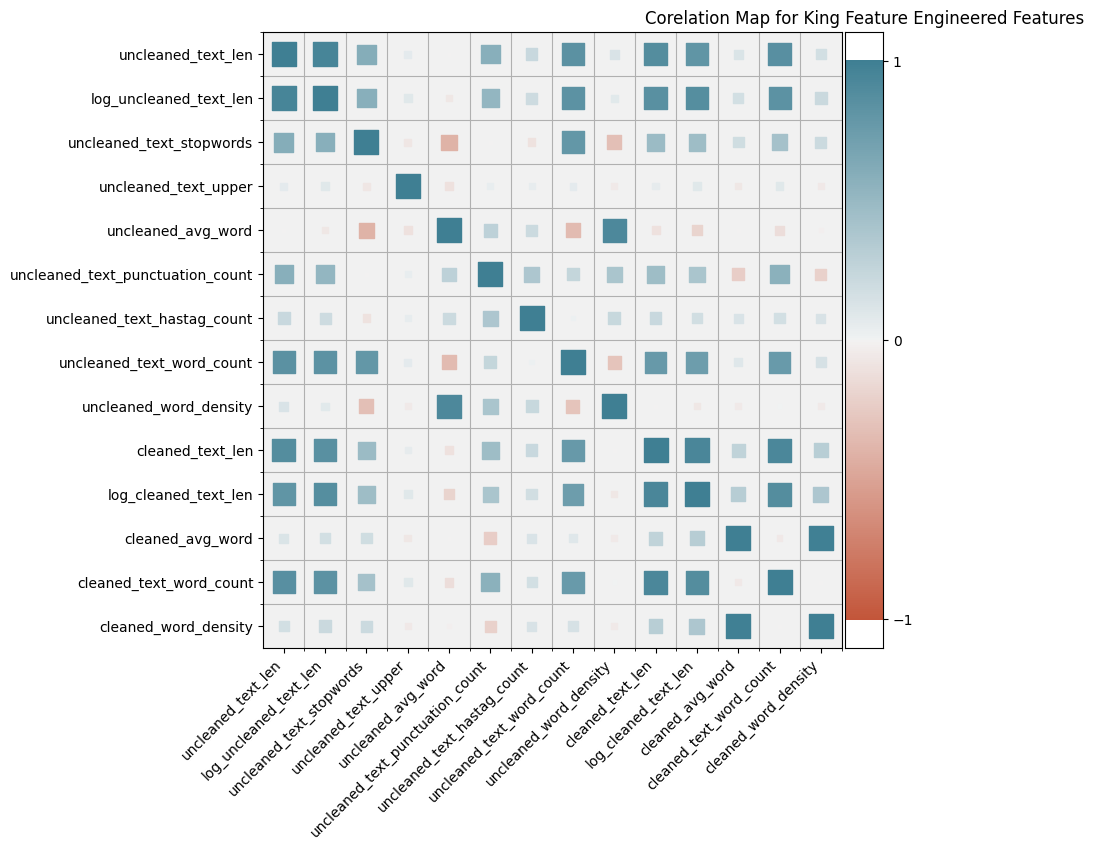

In [659]:
#### But how are these features Usefull? 
# Plot Source:- https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

## - Lets do a co-relation and understand them
plt.figure(figsize=(8, 8))


#Filtering some Features
corr_data_king = raw_train_data_king[['uncleaned_text_len', 'log_uncleaned_text_len',
       'uncleaned_text_stopwords', 'uncleaned_text_upper',
       'uncleaned_avg_word', 'uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count', 'uncleaned_text_word_count',
       'uncleaned_word_density','cleaned_text_len',
       'log_cleaned_text_len', 'cleaned_avg_word', 'cleaned_text_word_count',
       'cleaned_word_density']]

corrplot(corr_data_king.corr(), size_scale=300)

plt.title("Corelation Map for King Feature Engineered Features")

In [997]:
# SOME MODIFICATIONS OF FEATURE ENGINEERING BASED ON CORELATIONS FOR CHECK POINT 3
raw_train_data_king['m_1'] = raw_train_data_king['uncleaned_text_len'] + raw_train_data_king['log_uncleaned_text_len'] + raw_train_data_king['uncleaned_text_word_count'] + raw_train_data_king['cleaned_text_len']+raw_train_data_king['log_cleaned_text_len']   + raw_train_data_king['cleaned_text_word_count'] + raw_train_data_king['uncleaned_text_word_count']
#keep uncleaned_tet_upper

raw_train_data_king['m_2']  = raw_train_data_king['uncleaned_avg_word'] + raw_train_data_king['uncleaned_word_density'] 
#keep uncleaned text punc count, uncleaned hastag count

raw_train_data_king['m_3'] = raw_train_data_king['cleaned_avg_word'] + raw_train_data_king['cleaned_word_density']


NameError: name 'raw_trai' is not defined

Observations by Team:- 
> - We can see that there are many strong positive co-relations among features, so we can keep one and remove the later.

Suggestions by Team:- 
> - Should Remove Uncleaned text Length, as it strongly co-relates to cleaned text length, log_uncleaned_text_length, uncleaned_text_word_count, log_cleaned_text_length, cleaned text_word_count

Text(0.5, 1.0, 'Corelation Map for King Feature Engineered Features')

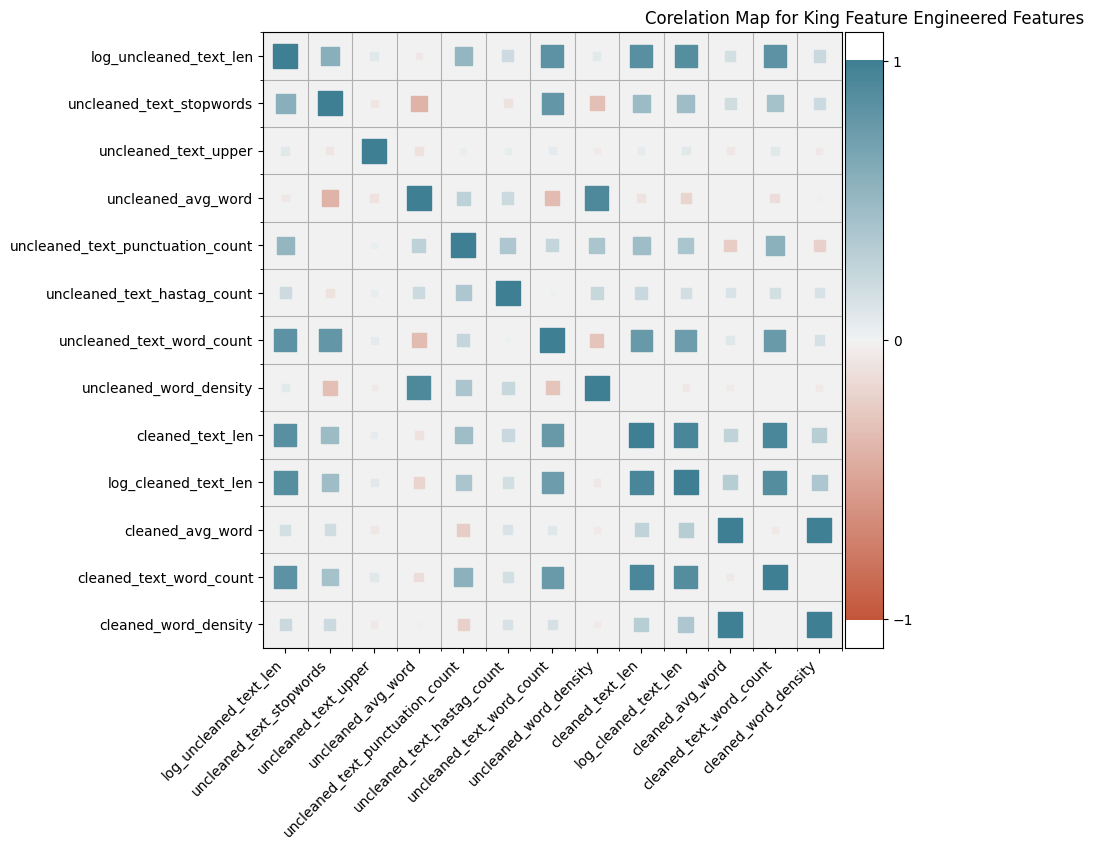

In [660]:
## - co-relation continued - removed uncleaned_text_length
plt.figure(figsize=(8, 8))
#Filtering some Features
corr_data_king = raw_train_data_king[['log_uncleaned_text_len',
       'uncleaned_text_stopwords', 'uncleaned_text_upper',
       'uncleaned_avg_word', 'uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count', 'uncleaned_text_word_count',
       'uncleaned_word_density','cleaned_text_len',
       'log_cleaned_text_len', 'cleaned_avg_word', 'cleaned_text_word_count',
       'cleaned_word_density']]

corrplot(corr_data_king.corr(), size_scale=300)

plt.title("Corelation Map for King Feature Engineered Features")

Observations by Team:- 
> - We can see that there are many strong positive co-relations among features, so we can keep one and remove the later.

Suggestions by Team:- 
> - Should Remove Log uncleaned text Length, as it strongly co-relates to cleaned text length, log_uncleaned_text_length, uncleaned_text_word_count, log_cleaned_text_length, cleaned text_word_count

Text(0.5, 1.0, 'Corelation Map for King Feature Engineered Features')

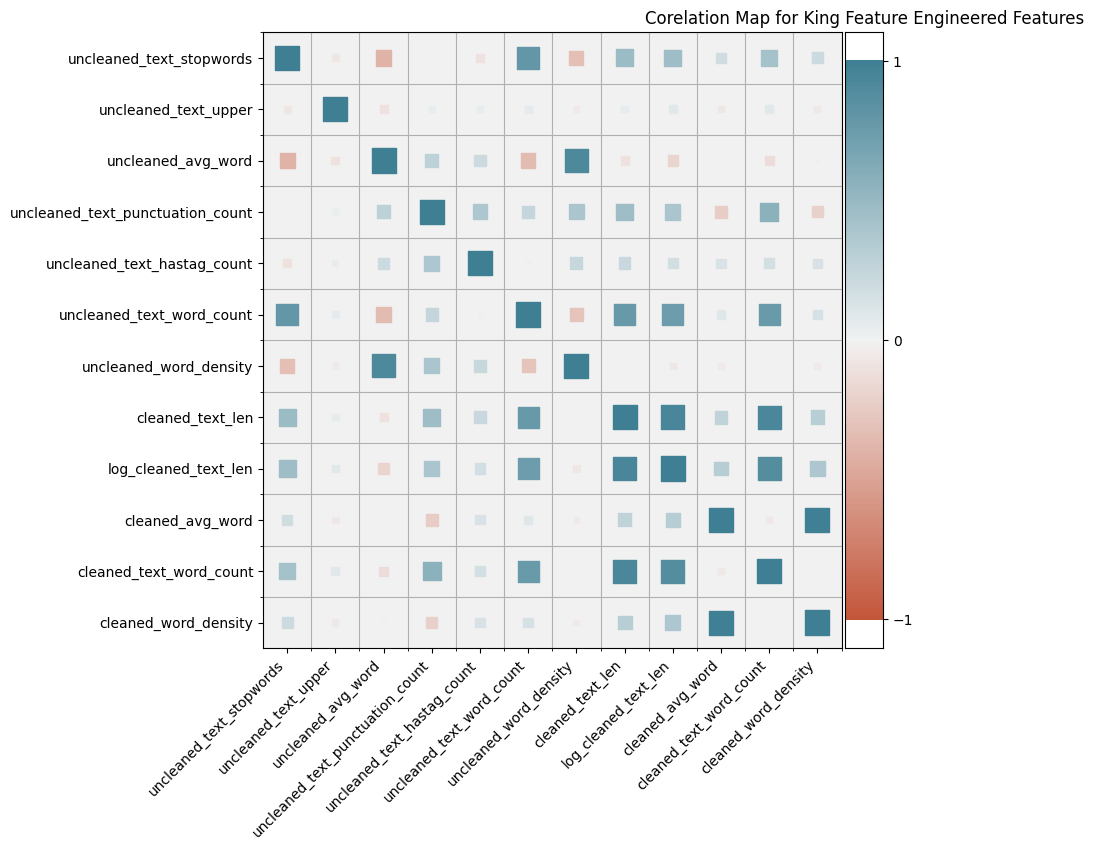

In [661]:
## - co-relation continued - removed uncleaned_text_length, log of uncleaned text length,
plt.figure(figsize=(8, 8))
#Filtering some Features
corr_data_king = raw_train_data_king[['uncleaned_text_stopwords', 'uncleaned_text_upper',
       'uncleaned_avg_word', 'uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count', 'uncleaned_text_word_count',
       'uncleaned_word_density','cleaned_text_len',
       'log_cleaned_text_len', 'cleaned_avg_word', 'cleaned_text_word_count',
       'cleaned_word_density']]

corrplot(corr_data_king.corr(), size_scale=300)

plt.title("Corelation Map for King Feature Engineered Features")

Observations by Team:- 
> - We can see that there are many strong positive co-relations among features, so we can keep one and remove the later.

Suggestions by Team:- 
> - Should Remove uncleaned text word count, as it strongly co-relates to uncleaned text stop words, cleaned_text_length, cleaned_text_word_count

Text(0.5, 1.0, 'Corelation Map for King Feature Engineered Features')

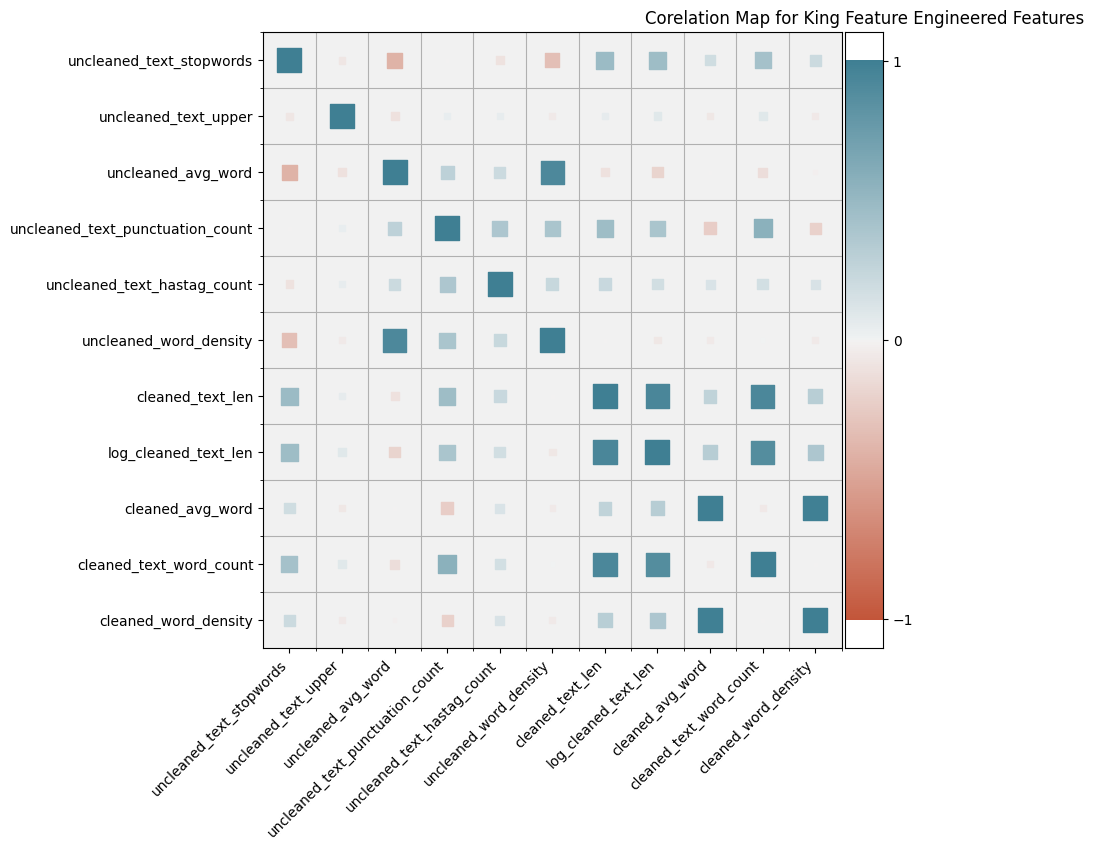

In [662]:
## - co-relation continued - removed uncleaned_text_length, log of uncleaned text length, uncleaned text word count
plt.figure(figsize=(8, 8))
#Filtering some Features
corr_data_king = raw_train_data_king[['uncleaned_text_stopwords', 'uncleaned_text_upper',
       'uncleaned_avg_word', 'uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count',
       'uncleaned_word_density','cleaned_text_len',
       'log_cleaned_text_len', 'cleaned_avg_word', 'cleaned_text_word_count',
       'cleaned_word_density']]

corrplot(corr_data_king.corr(), size_scale=300)

plt.title("Corelation Map for King Feature Engineered Features")

Observations by Team:- 
> - We can see that there are many strong positive co-relations among features, so we can keep one and remove the later.

Suggestions by Team:- 
> - Should Remove uncleaned word density, as it strongly co-relates to uncleaned avg word length

Text(0.5, 1.0, 'Corelation Map for King Feature Engineered Features')

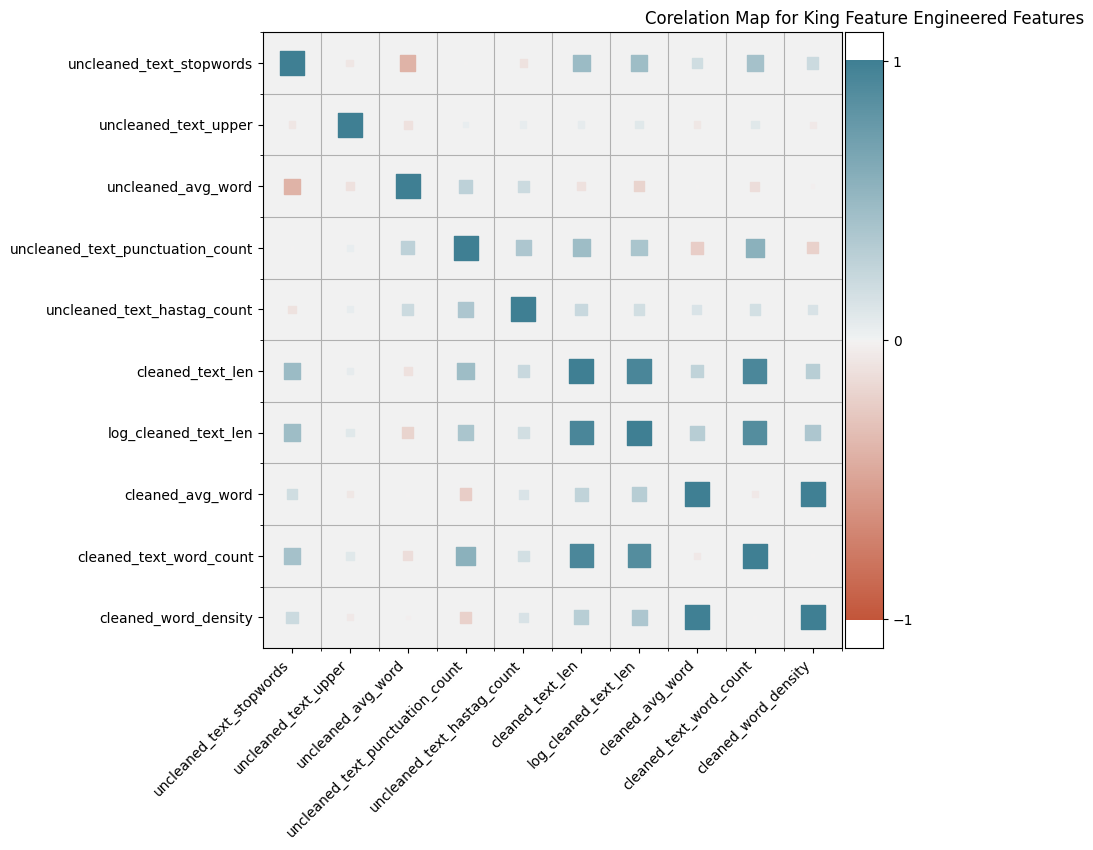

In [663]:
## - co-relation continued - removed uncleaned_text_length, log of uncleaned text length, uncleaned text word count, uncleaned_word_density
plt.figure(figsize=(8, 8))
#Filtering some Features
corr_data_king = raw_train_data_king[['uncleaned_text_stopwords', 'uncleaned_text_upper',
       'uncleaned_avg_word', 'uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count','cleaned_text_len',
       'log_cleaned_text_len', 'cleaned_avg_word', 'cleaned_text_word_count',
       'cleaned_word_density']]

corrplot(corr_data_king.corr(), size_scale=300)

plt.title("Corelation Map for King Feature Engineered Features")

Observations by Team:- 
> - We can see that there are many strong positive co-relations among features, so we can keep one and remove the later.

Suggestions by Team:- 
> - Should Remove log_cleaned_text length, as it strongly co-relates to cleaned text length, cleaned text word count
> - Should Remove Cleaned word density as it strongly co-relates to cleaned avg word


Text(0.5, 1.0, 'Corelation Map for King Feature Engineered Features')

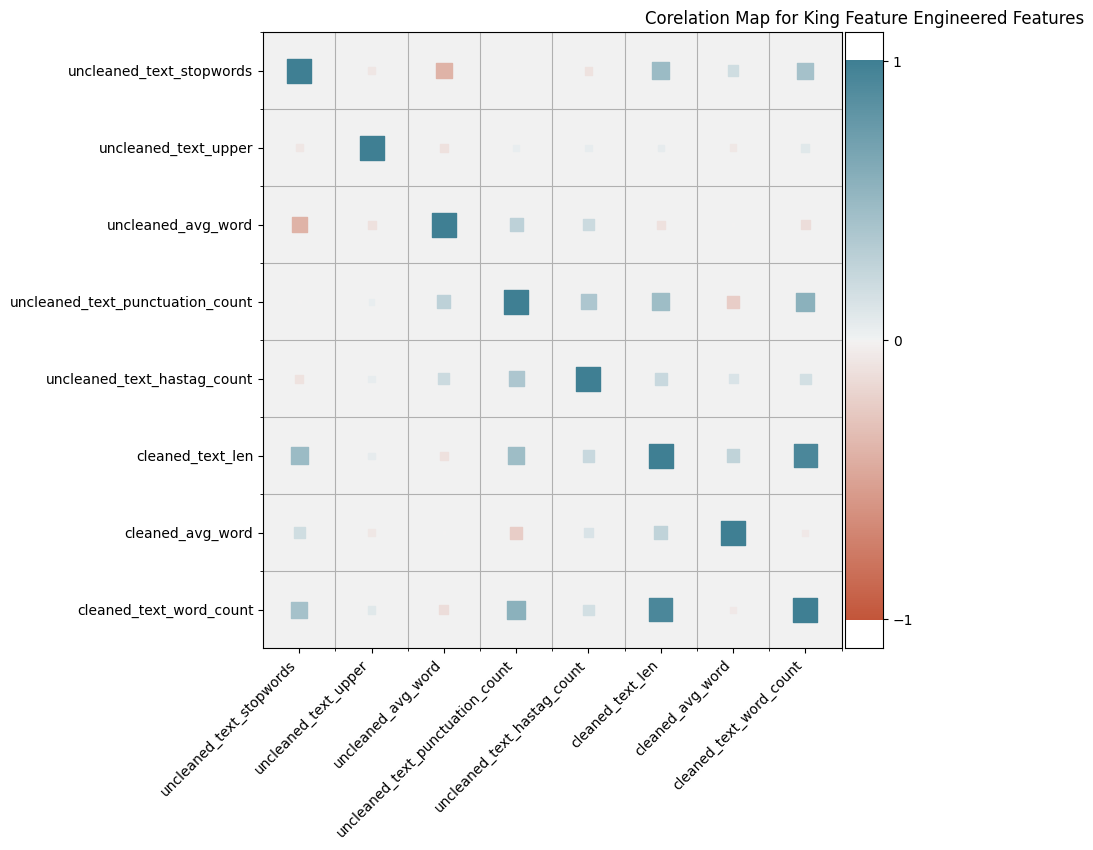

In [664]:
## - co-relation continued - removed uncleaned_text_length, log of uncleaned text length, uncleaned text word count, uncleaned_word_density, log cleaned text length,
### cleaned word density

plt.figure(figsize=(8, 8))
#Filtering some Features
corr_data_king = raw_train_data_king[['uncleaned_text_stopwords', 'uncleaned_text_upper',
       'uncleaned_avg_word', 'uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count','cleaned_text_len', 'cleaned_avg_word', 'cleaned_text_word_count']]

corrplot(corr_data_king.corr(), size_scale=300)

plt.title("Corelation Map for King Feature Engineered Features")

Observations by Team:- 
> - We can see that there are many strong positive co-relations among features, so we can keep one and remove the later.

Suggestions by Team:- 
> - Should Remove cleaned_text_word count length, as it strongly co-relates to cleaned text length


Text(0.5, 1.0, 'Corelation Map for King Feature Engineered Features')

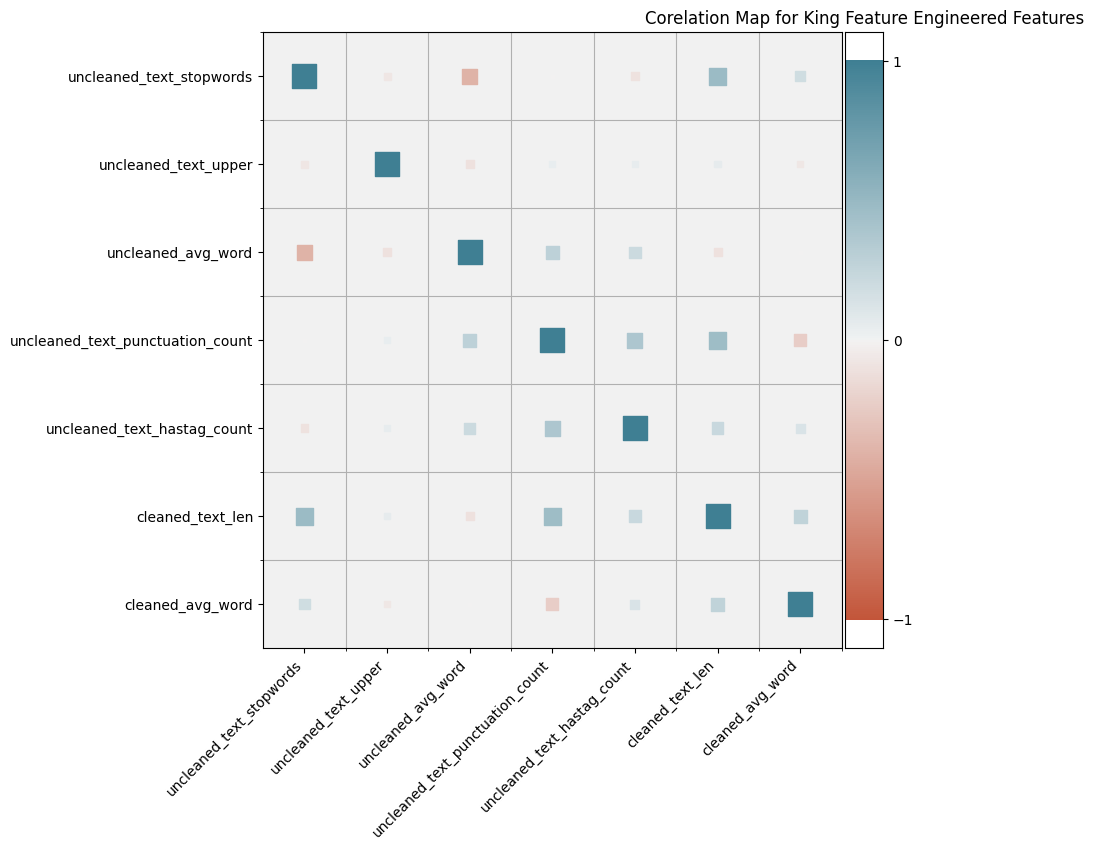

In [665]:
## - co-relation continued - removed uncleaned_text_length, log of uncleaned text length, uncleaned text word count, uncleaned_word_density, log cleaned text length,
### cleaned word density, cleaned text word count

plt.figure(figsize=(8, 8))
#Filtering some Features
corr_data_king = raw_train_data_king[['uncleaned_text_stopwords', 'uncleaned_text_upper',
       'uncleaned_avg_word', 'uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count','cleaned_text_len', 'cleaned_avg_word']]

corrplot(corr_data_king.corr(), size_scale=300)

plt.title("Corelation Map for King Feature Engineered Features")

Observations by Team:- 
> - We almost got rid of co-relations


In [666]:
raw_train_data_king.columns
#removed uncleaned_text_length, log of uncleaned text length, uncleaned text word count, uncleaned_word_density, log cleaned text length,
### cleaned word density, cleaned text word count

Index(['safe_text', 'label', 'uncleaned_text_len', 'log_uncleaned_text_len',
       'uncleaned_text_stopwords', 'uncleaned_text_upper',
       'uncleaned_avg_word', 'uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count', 'uncleaned_text_word_count',
       'uncleaned_word_density', 'CLEANED_TEXT', 'cleaned_text_len',
       'log_cleaned_text_len', 'cleaned_avg_word', 'cleaned_text_word_count',
       'cleaned_word_density'],
      dtype='object')

In [667]:
## Lets remove the features and store original data features as well

raw_train_data_king.to_csv("BEFORE_CO-RELATION_CLEANEDDATA_KING.csv", header=True, index=False)
raw_train_data_king.drop(columns=['uncleaned_text_len','log_uncleaned_text_len','uncleaned_text_word_count','uncleaned_word_density','log_cleaned_text_len','cleaned_word_density', 'cleaned_text_word_count'], axis=1, inplace=True)
raw_train_data_king.to_csv("AFTER_CO-RELATION_CLEANEDDATA_KING.csv", header=True, index=False)


In [885]:
#Lets look at dataframe
raw_train_data_king.columns

Index(['safe_text', 'label', 'uncleaned_text_len', 'log_uncleaned_text_len',
       'uncleaned_text_stopwords', 'uncleaned_text_upper',
       'uncleaned_avg_word', 'uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count', 'uncleaned_text_word_count',
       'uncleaned_word_density', 'CLEANED_TEXT', 'cleaned_text_len',
       'log_cleaned_text_len', 'cleaned_avg_word', 'cleaned_text_word_count',
       'cleaned_word_density'],
      dtype='object')

## D. Continued with experiment
#### Performing an experiment - 4 
#### Are these feature engineered features help us in classification? Lets Use Tsne and PCA to check our idea...! its efficient than ML Techniques


In [998]:
# SOME MODIFICATIONS OF FEATURE ENGINEERING BASED ON CORELATIONS FOR CHECK POINT 3
raw_train_data_king['m_1'] = raw_train_data_king['uncleaned_text_len'] + raw_train_data_king['log_uncleaned_text_len'] + raw_train_data_king['uncleaned_text_word_count'] + raw_train_data_king['cleaned_text_len']+raw_train_data_king['log_cleaned_text_len']   + raw_train_data_king['cleaned_text_word_count'] + raw_train_data_king['uncleaned_text_word_count']
#keep uncleaned_tet_upper

raw_train_data_king['m_2']  = raw_train_data_king['uncleaned_avg_word'] + raw_train_data_king['uncleaned_word_density'] 
#keep uncleaned text punc count, uncleaned hastag count

raw_train_data_king['m_3'] = raw_train_data_king['cleaned_avg_word'] + raw_train_data_king['cleaned_word_density']



#### - 1. PCA King

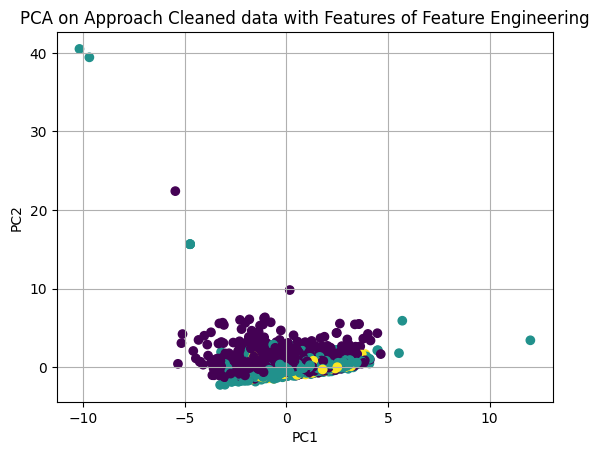

In [999]:
# PCA on King 
# Standardize the features
df_ = raw_train_data_king[['m_1', 'm_2', 'm_3']]

df_['temp_'] = raw_train_data_king['label']
df_['temp_'] = df_['temp_'].astype('int')

X = df_.drop(columns=['temp_'],axis=1).values
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

# Plot the results
plt.figure()
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=list(df_.temp_.values))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.title('PCA on Approach Cleaned data with Features of Feature Engineering')
plt.show()

#### - 2. TSNE King

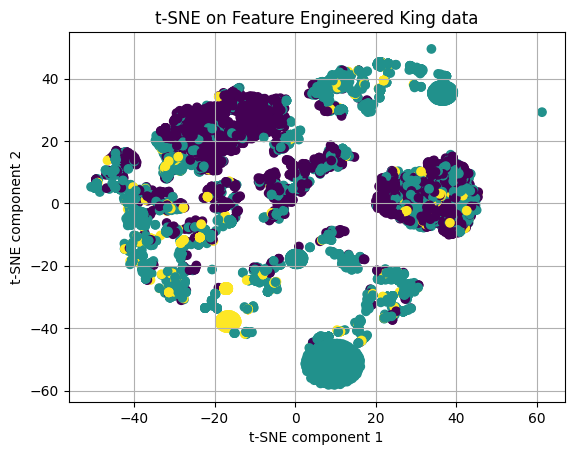

In [1004]:
# TSNE Zindi
# Standardize the features
X = df_.drop(columns=['temp_'],axis=1).values
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Perform t-SNE
tsne_king = TSNE(n_components=2, perplexity=120, learning_rate=500)
tsne_components = tsne_king.fit_transform(X_std)

# Plot the results
plt.figure()
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=list(df_.temp_.values))
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE on Feature Engineered King data')
plt.grid()
plt.show()

Observations by Team:- 
> - No useful information from the experiment, But tsne on Kings data seems to be partially usefull.

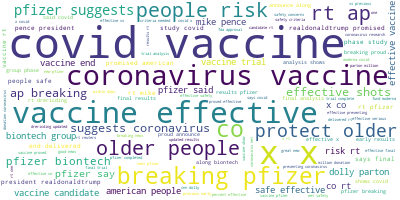

In [671]:
#Full text Word Cloud
from PIL import Image

w = wordcloud.WordCloud(background_color="white")
text = " ".join(raw_train_data_king['CLEANED_TEXT'].tolist())
w.generate(text)
w.to_file("word_cloud_King_Data_cleaned_init.png")

img = Image.open("word_cloud_King_Data_cleaned_init.png")
display(img)

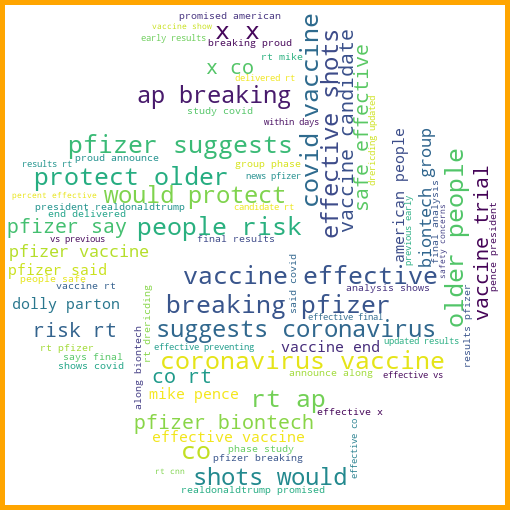

In [672]:
#source:-  Chat Gpt & https://medium.com/techtofreedom/5-levels-of-generating-word-cloud-in-python-e95471d0d9b1

import wordcloud
import imageio.v3 as iio
from IPython.display import display, Image
from PIL import ImageOps
from PIL import Image

mk = iio.imread("PythonLogo.jpeg")
w = wordcloud.WordCloud(mask=mk,
                        background_color="white",
                        stopwords=set(stop),
                        min_font_size=8,
                        max_font_size=25,
                        repeat=True,
                        )

text = " ".join(raw_train_data_king['CLEANED_TEXT'].tolist())
w.generate(text)
w.to_file("word_cloud_King_Data_cleaned.png")


# Adding a border
img = ImageOps.expand(Image.open("word_cloud_King_Data_cleaned.png"), border=5, fill='orange')

display(img)

In [673]:
# Getting the Frequencies of words
word_freq = w.words_
for word_,perc_ in word_freq.items():
    print((word_, str(np.round(perc_,2)) + " %"))

('covid vaccine', '1.0 %')
('x x', '0.54 %')
('vaccine effective', '0.45 %')
('coronavirus vaccine', '0.4 %')
('breaking pfizer', '0.25 %')
('co', '0.24 %')
('older people', '0.18 %')
('people risk', '0.18 %')
('rt ap', '0.18 %')
('protect older', '0.18 %')
('pfizer suggests', '0.18 %')
('suggests coronavirus', '0.18 %')
('effective shots', '0.18 %')
('shots would', '0.18 %')
('would protect', '0.18 %')
('ap breaking', '0.17 %')
('pfizer biontech', '0.16 %')
('pfizer say', '0.15 %')
('x co', '0.13 %')
('vaccine candidate', '0.12 %')
('risk rt', '0.12 %')
('vaccine trial', '0.11 %')
('safe effective', '0.11 %')
('co rt', '0.11 %')
('pfizer vaccine', '0.1 %')
('biontech group', '0.1 %')
('effective vaccine', '0.1 %')
('pfizer said', '0.09 %')
('mike pence', '0.09 %')
('vaccine end', '0.09 %')
('american people', '0.08 %')
('dolly parton', '0.08 %')
('president realdonaldtrump', '0.08 %')
('rt mike', '0.08 %')
('pence president', '0.08 %')
('realdonaldtrump promised', '0.08 %')
('promised

## Before proceeding ahead lets see our datasets

In [886]:
#Zindi
raw_train_data

safe_text label  \
0      Me &amp; The Big Homie meanboy3000 #MEANBOY #M...     1   
1      I'm 100% thinking of devoting my career to pro...     2   
2      #whatcausesautism VACCINES, DO NOT VACCINATE Y...     0   
3      I mean if they immunize my kid with something ...     0   
4      Thanks to <user> Catch me performing at La Nui...     1   
...                                                  ...   ...   
9996   Living in a time where the sperm I used to was...     2   
9997   <user> <user>  In spite of all measles outbrea...     2   
9998   Interesting trends in child immunization in Ok...     1   
9999   CDC Says Measles Are At Highest Levels In Deca...     1   
10000  Pneumonia vaccine: for women w risk of pulmona...     2   

       uncleaned_text_len  log_uncleaned_text_len  uncleaned_text_stopwords  \
0                      90                  4.4998                         0   
1                     140                  4.9416                         8   
2                      55                  4.0073                         0   
3                     138                  4.9273                        15   
4                     106                  4.6634                         4   
...                   ...                     ...                       ...   
9996                  137                  4.9200                        13   
9997                  109                  4.6913                         6   
9998                   93                  4.5326                         4   
9999                   95                  4.5539                         3   
10000                  84                  4.4308                         3   

       uncleaned_text_upper  uncleaned_avg_word  \
0                         5            5.066667   
1                         1            4.640000   
2                         6            7.000000   
3                         2            3.964286   
4                         1            4.350000   
...                     ...                 ...   
9996                      1            4.307692   
9997                      2            4.450000   
9998                      0            6.230769   
9999                      2            4.647059   
10000                     1            5.000000   

       uncleaned_text_punctuation_count  uncleaned_text_hastag_count  \
0                                    11                            5   
1                                     4                            0   
2                                     2                            1   
3                                     4                            0   
4                                     8                            2   
...                                 ...                          ...   
9996                                  2                            1   
9997                                  6                            0   
9998                                  5                            0   
9999                                 11                            0   
10000                                 4                            0   

       uncleaned_text_word_count  uncleaned_word_density  \
0                             15                5.625000   
1                             25                5.384615   
2                              7                6.875000   
3                             28                4.758621   
4                             20                5.047619   
...                          ...                     ...   
9996                          26                5.074074   
9997                          21                4.954545   
9998                          13                6.642857   
9999                          17                5.277778   
10000                         15                5.250000   

                                            CLEANED_TEXT  cleaned_text_len  \
0      big homie meanboy mea

In [887]:
#king
raw_train_data_king

safe_text  label  \
0     New Pfizer Results: Coronavirus Vaccine Is Saf...      0   
1     RT @DrEricDing: BREAKINGâ€”Updated results fro...      1   
2     RT @BBCBreaking: Coronavirus vaccine by Pfizer...      0   
3     This is an objectively written and factual thr...      0   
4     RT @AP: BREAKING: Pfizer suggests its coronavi...      1   
...                                                 ...    ...   
9995  RT @Vrody_Jerome_: About the COVID vaccine: It...      1   
9996  @DenverChannel the best way to not get sick is...      2   
9997  RT @garrcie: being against student loan debt f...      1   
9998  @xevtfm Would you give your child a covid vacc...      0   
9999  Honestly the endgame to covid didnâ€™t have to...      2   

      uncleaned_text_len  log_uncleaned_text_len  uncleaned_text_stopwords  \
0                     89                  4.4886                         1   
1                    146                  4.9836                         4   
2                    142                  4.9558                         4   
3                    306                  5.7236                        10   
4                    142                  4.9558                         8   
...                  ...                     ...                       ...   
9995                 142                  4.9558                        11   
9996                 295                  5.6870                        24   
9997                 142                  4.9558                        10   
9998                 130                  4.8675                         5   
9999                 226                  5.4205                        20   

      uncleaned_text_upper  uncleaned_avg_word  \
0                        0            7.181818   
1                        2            6.000000   
2                        1            6.526316   
3                        1            6.871795   
4                        3            4.958333   
...                    ...                 ...   
9995                     2            4.500000   
9996                     0            4.803922   
9997                     1            5.217391   
9998                     1            5.500000   
9999                     0            4.973684   

      uncleaned_text_punctuation_count  uncleaned_text_hastag_count  \
0                                    7                            0   
1                                    7                            1   
2                                    9                            0   
3                                   21                            0   
4                                    4                            0   
...                                ...                          ...   
9995                                 7                            0   
9996                                35                            0   
9997                                 2                            0   
9998                                 9                            0   
9999                                 5                            0   

      uncleaned_text_word_count  uncleaned_word_density  \
0                            11                7.416667   
1                            21                6.636364   
2                            19                7.100000   
3                            39                7.650000   
4                            24                5.680000   
...                         ...                     ...   
9995                         26                5.259259   
9996                         51                5.673077   
9997                         23                5.916667   
9998                         21                5.909091   
9999                         38                5.794872   

                                           CLEANED_TEXT  cleaned_text_len  \
0     new pfizer results coronavirus vaccine safe ef...                60   

In [908]:
#king holdoutsets

kishan_hold_out_1

safe_text  label  \
0    Iâ€™m excited for the generation that canâ€™t ...      2   
1    RT @SethMacFarlane: With both Moderna and Pfiz...      2   
2    RT @maktejah_: Alafu wewe utakua zile za: "I w...      0   
3    @BrittPettibone Plot twist: the water cannons ...      1   
4    Hamilton County Health Commissioner calls rise...      1   
..                                                 ...    ...   
245  Trump is furious because he thinks Biden will ...      2   
246  @siegs111 @JamesTodaroMD Yes it will be over w...      2   
247  RT @Tim_Hayward_: Have I understood correctly?...      2   
248  RT @NorbertElekes: BREAKING: Pfizer to file fo...      2   
249  RT @ABCWorldNews: BREAKING: Pfizer and partner...      2   

     uncleaned_text_len  log_uncleaned_text_len  uncleaned_text_stopwords  \
0                   121                  4.7958                        10   
1                   141                  4.9488                         9   
2                   125                  4.8283                         1   
3                    76                  4.3307                         3   
4                   151                  5.0173                         4   
..                  ...                     ...                       ...   
245                 135                  4.9053                         6   
246                 154                  5.0370                        12   
247                 141                  4.9488                         4   
248                  98                  4.5850                         4   
249                 142                  4.9558                         7   

     uncleaned_text_upper  uncleaned_avg_word  \
0                       0            4.809524   
1                       1            5.761905   
2                       2            6.411765   
3                       0            6.000000   
4                       2            7.000000   
..                    ...                 ...   
245                     0            6.555556   
246                     0            4.923077   
247                     2            6.100000   
248                     3            6.071429   
249                     2            6.150000   

     uncleaned_text_punctuation_count  uncleaned_text_hastag_count  \
0                                   1                            0   
1                                   4                            0   
2                                  12                            0   
3                                   3                            0   
4                                  12                            0   
..                                ...                          ...   
245                                 9                            0   
246                                 9                            0   
247                                 8                            0   
248                                 3                            0   
249                                 4                            0   

     uncleaned_text_word_count  uncleaned_word_density  \
0                           21                5.500000   
1                           21                6.409091   
2                           17                6.944444   
3                           11                6.333333   
4                           19                7.550000   
..                         ...                     ...   
245                         18                7.105263   
246                         25                5.923077   
247                         20                6.714286   
248                         14                6.533333   
249                         20                6.761905   

                                          CLEANED_TEXT  cleaned_text_len  \
0    excited generation reset wifi router teach dan...                64   
1    rt sethmacfarlane moderna pfizer announcing su...      

In [909]:
#king holdoutsets

kishan_hold_out_2

safe_text  label  \
0    RT @joeynolfi: Ladies: Prior to tonight, you w...      2   
1    So now it really is a drug war... Pfizer and B...      2   
2    RT @ABC: Hereâ€™s everything you need to know ...      2   
3    "Covid vaccine: Pfizer says it's '94% effectiv...      2   
4    RT @AJEnglish: Pfizer ends COVID-19 vaccine tr...      2   
..                                                 ...    ...   
246  RT @NorbertElekes: BREAKING: Pfizer to file fo...      2   
247  Gov. Justice: We have a real problem, it's har...      2   
248  And then he wants to take credit for a vaccine...      2   
249  RT @realTuckFrumper: Pfizerâ€™s Covid-19 vacci...      0   
250  Alamak...abis la! Belangkas akn diburu habis2a...      0   

     uncleaned_text_len  log_uncleaned_text_len  uncleaned_text_stopwords  \
0                   156                  5.0499                         8   
1                   178                  5.1818                         8   
2                   144                  4.9698                         6   
3                    77                  4.3438                         2   
4                   119                  4.7791                         1   
..                  ...                     ...                       ...   
246                  98                  4.5850                         4   
247                 237                  5.4681                        20   
248                 183                  5.2095                        12   
249                 120                  4.7875                         3   
250                 175                  5.1648                         0   

     uncleaned_text_upper  uncleaned_avg_word  \
0                       1            5.280000   
1                       0            5.884615   
2                       2            6.250000   
3                       0            5.500000   
4                       2            8.230769   
..                    ...                 ...   
246                     3            6.071429   
247                     1            4.173913   
248                     1            5.133333   
249                     1            7.642857   
250                     0            7.800000   

     uncleaned_text_punctuation_count  uncleaned_text_hastag_count  \
0                                  12                            0   
1                                  13                            0   
2                                   8                            0   
3                                   9                            0   
4                                  14                            0   
..                                ...                          ...   
246                                 3                            0   
247                                12                            1   
248                                12                            0   
249                                 8                            0   
250                                14                            0   

     uncleaned_text_word_count  uncleaned_word_density  \
0                           23                6.500000   
1                           24                7.120000   
2                           20                6.857143   
3                           12                5.923077   
4                           13                8.500000   
..                         ...                     ...   
246                         14                6.533333   
247                         46                5.042553   
248                         30                5.903226   
249                         14                8.000000   
250                         19                8.750000   

                                          CLEANED_TEXT  cleaned_text_len  \
0    rt joeynolfi ladies prior tonight asked prepar...               101   
1    really drug war pfizer biontech say final anal...      

In [910]:
#king holdoutsets

ben_hold_out_1

safe_text  label  \
0    RT @ColleenHuberNMD: Tell the whole story @Ale...      0   
1    RT @CNN: German pharmaceutical company BioNTec...      1   
2    RT @NPR: NEW: Pfizer's COVID-19 vaccine was fo...      1   
3    RT @Mike_Pence: President @realDonaldTrump pro...      1   
4    RT @DrEricDing: BREAKINGâ€”Updated results fro...      1   
..                                                 ...    ...   
245  Pfizer says that more interim results from its...      2   
246  RT @wolfblitzer: Even as thereâ€™s very encour...      1   
247  RT @propjoesays: ðŸŽ¼ vaccine_x000D_\nvaccine_...      1   
248  If Dolly Parton's funding of the Covid-19 vacc...      1   
249  RT @DHSCgovuk: "People shouldn't be worried th...      1   

     uncleaned_text_len  log_uncleaned_text_len  uncleaned_text_stopwords  \
0                   141                  4.9488                         4   
1                   142                  4.9558                         7   
2                   142                  4.9558                         6   
3                   142                  4.9558                         8   
4                   146                  4.9836                         4   
..                  ...                     ...                       ...   
245                 227                  5.4250                        13   
246                 144                  4.9698                         7   
247                  90                  4.4998                         0   
248                 158                  5.0626                        11   
249                 156                  5.0499                         8   

     uncleaned_text_upper  uncleaned_avg_word  \
0                       2            5.666667   
1                       3            5.809524   
2                       5            4.720000   
3                       2            5.500000   
4                       2            6.000000   
..                    ...                 ...   
245                     0            5.909091   
246                     2            5.304348   
247                     2           10.375000   
248                     0            4.678571   
249                     2            6.136364   

     uncleaned_text_punctuation_count  uncleaned_text_hastag_count  \
0                                   7                            1   
1                                   5                            0   
2                                   7                            0   
3                                   5                            0   
4                                   7                            1   
..                                ...                          ...   
245                                10                            0   
246                                 7                            0   
247                                 8                            0   
248                                 6                            0   
249                                12                            1   

     uncleaned_text_word_count  uncleaned_word_density  \
0                           23                5.875000   
1                           21                6.454545   
2                           25                5.461538   
3                           22                6.173913   
4                           21                6.636364   
..                         ...                     ...   
245                         32                6.878788   
246                         23                6.000000   
247                          5               15.000000   
248                         28                5.448276   
249                         20                7.428571   

                                          CLEANED_TEXT  cleaned_text_len  \
0    rt colleenhubernmd tell whole story alexberens...                89   
1    rt cnn german pharmaceutical company biontech ...      

In [911]:
#king holdoutsets

ben_hold_out_2

safe_text  label  \
0    New Pfizer Results: Coronavirus Vaccine Is Saf...    2.0   
1    Health Workers, Pregnant Women, People Aged 65...    1.0   
2    RT @pfizer: BREAKING: We are proud to announce...    1.0   
3    @meenaharris Excellent. Dolly is a treasure. S...    1.0   
4    RT @MartinH77498500: A flu with 99% survival r...    0.0   
..                                                 ...    ...   
244  RT @CapitalTonight: One upstate immunologist s...    1.0   
245  @cnnbrk If the U.S. FDA approves the COVID-19 ...    1.0   
246  RT @maktejah_: Alafu wewe utakua zile za: "I w...    0.0   
247  Is Anyone planning to get the coronavirus Vacc...    1.0   
248  RT @Air_Cargo_News: Swissport demonstrates vac...    1.0   

     uncleaned_text_len  log_uncleaned_text_len  uncleaned_text_stopwords  \
0                    89                  4.4886                         1   
1                   127                  4.8442                         3   
2                   142                  4.9558                         8   
3                   179                  5.1874                         4   
4                   151                  5.0173                         7   
..                  ...                     ...                       ...   
244                 142                  4.9558                         7   
245                 119                  4.7791                         5   
246                 101                  4.6151                         1   
247                  65                  4.1744                         5   
248                 170                  5.1358                         1   

     uncleaned_text_upper  uncleaned_avg_word  \
0                       0            7.181818   
1                       1            6.111111   
2                       3            5.217391   
3                       0            8.000000   
4                       2            5.333333   
..                    ...                 ...   
244                     1            5.217391   
245                     3            4.714286   
246                     2            5.375000   
247                     0            4.500000   
248                     1           10.400000   

     uncleaned_text_punctuation_count  uncleaned_text_hastag_count  \
0                                   7                            0   
1                                  10                            0   
2                                   8                            1   
3                                  19                            0   
4                                   9                            0   
..                                ...                          ...   
244                                 3                            1   
245                                 6                            0   
246                                 7                            0   
247                                 1                            0   
248                                20                            3   

     uncleaned_text_word_count  uncleaned_word_density  \
0                           11                7.416667   
1                           17                7.055556   
2                           23                5.916667   
3                           18                9.421053   
4                           23                6.291667   
..                         ...                     ...   
244                         23                5.916667   
245                         21                5.409091   
246                         16                5.941176   
247                         12                5.000000   
248                         11               14.166667   

                                          CLEANED_TEXT  cleaned_text_len  \
0    new pfizer results coronavirus vaccine safe ef...                56   
1    health workers pregnant women people aged get ...      

In [912]:
#zindi 
kishan_hold_out_1

safe_text  label  \
0    Iâ€™m excited for the generation that canâ€™t ...      2   
1    RT @SethMacFarlane: With both Moderna and Pfiz...      2   
2    RT @maktejah_: Alafu wewe utakua zile za: "I w...      0   
3    @BrittPettibone Plot twist: the water cannons ...      1   
4    Hamilton County Health Commissioner calls rise...      1   
..                                                 ...    ...   
245  Trump is furious because he thinks Biden will ...      2   
246  @siegs111 @JamesTodaroMD Yes it will be over w...      2   
247  RT @Tim_Hayward_: Have I understood correctly?...      2   
248  RT @NorbertElekes: BREAKING: Pfizer to file fo...      2   
249  RT @ABCWorldNews: BREAKING: Pfizer and partner...      2   

     uncleaned_text_len  log_uncleaned_text_len  uncleaned_text_stopwords  \
0                   121                  4.7958                        10   
1                   141                  4.9488                         9   
2                   125                  4.8283                         1   
3                    76                  4.3307                         3   
4                   151                  5.0173                         4   
..                  ...                     ...                       ...   
245                 135                  4.9053                         6   
246                 154                  5.0370                        12   
247                 141                  4.9488                         4   
248                  98                  4.5850                         4   
249                 142                  4.9558                         7   

     uncleaned_text_upper  uncleaned_avg_word  \
0                       0            4.809524   
1                       1            5.761905   
2                       2            6.411765   
3                       0            6.000000   
4                       2            7.000000   
..                    ...                 ...   
245                     0            6.555556   
246                     0            4.923077   
247                     2            6.100000   
248                     3            6.071429   
249                     2            6.150000   

     uncleaned_text_punctuation_count  uncleaned_text_hastag_count  \
0                                   1                            0   
1                                   4                            0   
2                                  12                            0   
3                                   3                            0   
4                                  12                            0   
..                                ...                          ...   
245                                 9                            0   
246                                 9                            0   
247                                 8                            0   
248                                 3                            0   
249                                 4                            0   

     uncleaned_text_word_count  uncleaned_word_density  \
0                           21                5.500000   
1                           21                6.409091   
2                           17                6.944444   
3                           11                6.333333   
4                           19                7.550000   
..                         ...                     ...   
245                         18                7.105263   
246                         25                5.923077   
247                         20                6.714286   
248                         14                6.533333   
249                         20                6.761905   

                                          CLEANED_TEXT  cleaned_text_len  \
0    excited generation reset wifi router teach dan...                64   
1    rt sethmacfarlane moderna pfizer announcing su...      

#### Some Future Scope of work

In [91]:
# # Last source of additions , emoji's, ner, topic modelling, hastags, mentions
# #emojis and emoticon's
# import re

# text = "I ❤️ Python  and sai is 😊"
# # Emoji pattern
# emoji_pattern = re.compile("["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags=re.UNICODE)

# # Emoticon pattern
# emoticon_pattern = re.compile(u'('
#         u'\ud83c[\udf00-\udfff]|'
#         u'\ud83d[\udc00-\ude4f\ude80-\udeff]|'
#         u'\uD83E[\uDD00-\uDDFF]|'
#         u'[\u2600-\u26FF\u2700-\u27BF])+', 
#         flags=re.UNICODE)


# emojis = emoji_pattern.findall(text)
# emoticons = emoticon_pattern.findall(text)

# print("Emojis found:", length(emojis))
# print("Emoticons found:", emoticons)


In [92]:
# sentiment_dict = {
#     "😂": "funny",
#     "😊": "positive",
#     "😒": "negative",
#     "😠": "angry",
#     "❤️": "positive",
#     "😍": "positive",
#     "😘": "positive",
#     "😢": "sad",
#     "😭": "sad",
#     "😴": "sleepy",
#     "😕": "confused",
#     "😎": "cool",
#     "😇": "angelic",
#     "😈": "devilish",
#     "🤔": "thinking",
#     "🙄": "annoyed",
#     "😱": "scared",
#     "🤗": "hugging",
#     "🤢": "disgusted",
#     "🤷": "shrugging",
#     "👍": "thumbs up",
#     "👎": "thumbs down",
#     "👌": "ok",
#     "🙏": "prayer",
#     "💩": "poop"
# }

# def get_emoji_sentiment(emoji):
#     sentiment = sentiment_dict.get(emoji, "neutral")
#     return sentiment

# # Example usage:
# emoji1 = "😂"
# emoji2 = "😊"
# emoji3 = "🤔"
# emoji4 = "😠"
# emoji5 = "👍"
# emoji6 = "🙀"

# print(get_emoji_sentiment(emoji1))  # Output: "funny"
# print(get_emoji_sentiment(emoji2))  # Output: "positive"
# print(get_emoji_sentiment(emoji3))  # Output: "thinking"
# print(get_emoji_sentiment(emoji4))  # Output: "angry"
# print(get_emoji_sentiment(emoji5))  # Output: "thumbs up"
# print(get_emoji_sentiment(emoji6))  # Output: "poop"


In [ ]:

# raw_train_data
# raw_train_data_king
# kishan_hold_out_1
# kishan_hold_out_2
# ben_hold_out_1
# ben_hold_out_2


## Sinece we have datasets, we need word vector exmbedings of text feautre

> - 1. BOW
> - 2. TFIDF
> - 3. W2V


## 1. BOW Approach

In [938]:
# Bag of words for all datasets we have, Range = (1-1,1-2,1-3) - Not using binary version since the count of _ve, +ve words matters in Sentiment Analysis

## zindi train data
zindi_bow_1_1 = []
for text in raw_train_data['CLEANED_TEXT'].values:
    zindi_bow_1_1.append(text)
    
## king train data
king_bow_1_1 = []
for text in raw_train_data_king['CLEANED_TEXT'].values:
    king_bow_1_1.append(text)
    
## kishan holdout set1
kishan_holdout_set1_bow_1_1 = []
for text in kishan_hold_out_1['CLEANED_TEXT'].values:
    kishan_holdout_set1_bow_1_1.append(text)
    
## kishan holdout set2
kishan_holdout_set2_bow_1_1 = []
for text in kishan_hold_out_2['CLEANED_TEXT'].values:
    kishan_holdout_set2_bow_1_1.append(text)
    
## Ben holdout set1
ben_holdout_set1_bow_1_1 = []
for text in ben_hold_out_1['CLEANED_TEXT'].values:
    ben_holdout_set1_bow_1_1.append(text)
    
## Ben holdout set2
ben_holdout_set2_bow_1_1 = []
for text in ben_hold_out_2['CLEANED_TEXT'].values:
    ben_holdout_set2_bow_1_1.append(text)

#zindi
zindi_bow_1_1_cv = CountVectorizer(ngram_range=(1,1), min_df=5)
zindi_bow_1_2_cv = CountVectorizer(ngram_range=(1,2), min_df=5)
#zindi_bow_1_3_cv = CountVectorizer(ngram_range=(1,3), min_df=5)
zindi_bow_1_2_cv_100 = CountVectorizer(ngram_range=(1,2), min_df=5, max_features=100)
zindi_bow_1_2_cv_500 = CountVectorizer(ngram_range=(1,2), min_df=5, max_features=500)
zindi_bow_1_1_cv.fit(zindi_bow_1_1)
zindi_bow_1_2_cv.fit(zindi_bow_1_1)
#zindi_bow_1_3_cv.fit(zindi_bow_1_1)
zindi_bow_1_2_cv_100.fit(zindi_bow_1_1)
zindi_bow_1_2_cv_500.fit(zindi_bow_1_1)

#king
king_bow_1_1_cv = CountVectorizer(ngram_range=(1,1), min_df=15)
king_bow_1_2_cv = CountVectorizer(ngram_range=(1,2), min_df=15)
#king_bow_1_3_cv = CountVectorizer(ngram_range=(1,3), min_df=5)
king_bow_1_2_cv_100 = CountVectorizer(ngram_range=(1,2), min_df=15, max_features=100)
king_bow_1_2_cv_500 = CountVectorizer(ngram_range=(1,2), min_df=15, max_features=500)
king_bow_1_1_cv.fit(king_bow_1_1)
king_bow_1_2_cv.fit(king_bow_1_1)
#king_bow_1_3_cv.fit(king_bow_1_1)
king_bow_1_2_cv_100.fit(king_bow_1_1)
king_bow_1_2_cv_500.fit(king_bow_1_1)

##################################################################rawzinditraintransformations with their 1,1-1,2-1,3versions######################################################################
#Transformations and Dataframes TRAINING SETS
#zindi train data variations
zindi_bow_1_1_array = zindi_bow_1_1_cv.transform(zindi_bow_1_1).toarray()
zindi_bow_1_1_array_fn = zindi_bow_1_1_cv.get_feature_names_out()
zindi_bow_1_1_array_df = pd.DataFrame(zindi_bow_1_1_array, columns=zindi_bow_1_1_array_fn)

zindi_bow_1_2_array = zindi_bow_1_2_cv.transform(zindi_bow_1_1).toarray()
zindi_bow_1_2_array_fn = zindi_bow_1_2_cv.get_feature_names_out()
zindi_bow_1_2_array_df = pd.DataFrame(zindi_bow_1_2_array, columns=zindi_bow_1_2_array_fn)

# zindi_bow_1_3_array = zindi_bow_1_3_cv.transform(zindi_bow_1_1).toarray()
# zindi_bow_1_3_array_fn = zindi_bow_1_3_cv.get_feature_names_out()
# zindi_bow_1_3_array_df = pd.DataFrame(zindi_bow_1_3_array, columns=zindi_bow_1_3_array_fn)

zindi_bow_1_2_100_array = zindi_bow_1_2_cv_100.transform(zindi_bow_1_1).toarray()
zindi_bow_1_2_100_array_fn = zindi_bow_1_2_cv_100.get_feature_names_out()
zindi_bow_1_2_100_array_df = pd.DataFrame(zindi_bow_1_2_100_array, columns=zindi_bow_1_2_100_array_fn)

zindi_bow_1_2_500_array = zindi_bow_1_2_cv_500.transform(zindi_bow_1_1).toarray()
zindi_bow_1_2_500_array_fn = zindi_bow_1_2_cv_500.get_feature_names_out()
zindi_bow_1_2_500_array_df = pd.DataFrame(zindi_bow_1_2_500_array, columns=zindi_bow_1_2_500_array_fn)

##################################################################rawkingtraintransformations with their 1,1-1,2-1,3versions######################################################################
#king transformations  TRAINING SETS
#king data transformations on king train data variations
king_bow_1_1_array = king_bow_1_1_cv.transform(king_bow_1_1).toarray()
king_bow_1_1_array_fn = king_bow_1_1_cv.get_feature_names_out()
king_bow_1_1_array_df = pd.DataFrame(king_bow_1_1_array, columns=king_bow_1_1_array_fn)

king_bow_1_2_array = king_bow_1_2_cv.transform(king_bow_1_1).toarray()
king_bow_1_2_array_fn = king_bow_1_2_cv.get_feature_names_out()
king_bow_1_2_array_df = pd.DataFrame(king_bow_1_2_array,columns=king_bow_1_2_array_fn)

# king_bow_1_3_array = king_bow_1_3_cv.transform(king_bow_1_1).toarray()
# king_bow_1_3_array_fn = king_bow_1_3_cv.get_feature_names_out()
# king_bow_1_3_array_df = pd.DataFrame(king_bow_1_3_array,king_bow_1_3_array_fn)

king_bow_1_2_100_array = king_bow_1_2_cv_100.transform(king_bow_1_1).toarray()
king_bow_1_2_100_array_fn = king_bow_1_2_cv_100.get_feature_names_out()
king_bow_1_2_100_array_df = pd.DataFrame(king_bow_1_2_100_array, columns=king_bow_1_2_100_array_fn)

king_bow_1_2_500_array = king_bow_1_2_cv_500.transform(king_bow_1_1).toarray()
king_bow_1_2_500_array_fn = king_bow_1_2_cv_500.get_feature_names_out()
king_bow_1_2_500_array_df = pd.DataFrame(king_bow_1_2_500_array, columns=king_bow_1_2_500_array_fn)




#Testset Transformations
## zindi transformations on king holdoutsets

#kishan set1
kishan_holdout_set1_bow_1_1_array_z = zindi_bow_1_1_cv.transform(kishan_holdout_set1_bow_1_1).toarray()
kishan_holdout_set1_bow_1_1_array_fn_z = zindi_bow_1_1_array_fn
kishan_holdout_set1_bow_1_1_array_df_z = pd.DataFrame(kishan_holdout_set1_bow_1_1_array_z, columns=kishan_holdout_set1_bow_1_1_array_fn_z)

kishan_holdout_set1_bow_1_2_array_z = zindi_bow_1_2_cv.transform(kishan_holdout_set1_bow_1_1).toarray()
kishan_holdout_set1_bow_1_2_array_fn_z = zindi_bow_1_2_array_fn
kishan_holdout_set1_bow_1_2_array_df_z = pd.DataFrame(kishan_holdout_set1_bow_1_2_array_z, columns=kishan_holdout_set1_bow_1_2_array_fn_z)

# kishan_holdout_set1_bow_1_3_array_z = zindi_bow_1_3_cv.transform(kishan_holdout_set1_bow_1_1).toarray()
# kishan_holdout_set1_bow_1_3_array_fn_z = zindi_bow_1_3_array_fn
# kishan_holdout_set1_bow_1_3_array_df_z = pd.DataFrame(kishan_holdout_set1_bow_1_3_array_z, columns=kishan_holdout_set1_bow_1_3_array_fn_z)

kishan_holdout_set1_bow_1_2_100_array_z = zindi_bow_1_2_cv_100.transform(kishan_holdout_set1_bow_1_1).toarray()
kishan_holdout_set1_bow_1_2_100_array_fn_z = zindi_bow_1_2_100_array_fn
kishan_holdout_set1_bow_1_2_100_array_df_z = pd.DataFrame(kishan_holdout_set1_bow_1_2_100_array_z, columns=kishan_holdout_set1_bow_1_2_100_array_fn_z)

kishan_holdout_set1_bow_1_2_500_array_z = zindi_bow_1_2_cv_500.transform(kishan_holdout_set1_bow_1_1).toarray()
kishan_holdout_set1_bow_1_2_500_array_fn_z = zindi_bow_1_2_500_array_fn
kishan_holdout_set1_bow_1_2_500_array_df_z = pd.DataFrame(kishan_holdout_set1_bow_1_2_500_array_z, columns=kishan_holdout_set1_bow_1_2_500_array_fn_z) 


#kishan set2
kishan_holdout_set2_bow_1_1_array_z = zindi_bow_1_1_cv.transform(kishan_holdout_set2_bow_1_1).toarray()
kishan_holdout_set2_bow_1_1_array_fn_z = zindi_bow_1_1_array_fn
kishan_holdout_set2_bow_1_1_array_df_z = pd.DataFrame(kishan_holdout_set2_bow_1_1_array_z, columns=kishan_holdout_set2_bow_1_1_array_fn_z)

kishan_holdout_set2_bow_1_2_array_z = zindi_bow_1_2_cv.transform(kishan_holdout_set2_bow_1_1).toarray()
kishan_holdout_set2_bow_1_2_array_fn_z = zindi_bow_1_2_array_fn
kishan_holdout_set2_bow_1_2_array_df_z = pd.DataFrame(kishan_holdout_set2_bow_1_2_array_z, columns=kishan_holdout_set2_bow_1_2_array_fn_z)

# kishan_holdout_set2_bow_1_3_array_z = zindi_bow_1_3_cv.transform(kishan_holdout_set2_bow_1_1).toarray()
# kishan_holdout_set2_bow_1_3_array_fn_z = zindi_bow_1_3_array_fn
# kishan_holdout_set2_bow_1_3_array_df_z = pd.DataFrame(kishan_holdout_set2_bow_1_3_array_z, columns=kishan_holdout_set2_bow_1_3_array_fn_z)

kishan_holdout_set2_bow_1_2_100_array_z = zindi_bow_1_2_cv_100.transform(kishan_holdout_set2_bow_1_1).toarray()
kishan_holdout_set2_bow_1_2_100_array_fn_z = zindi_bow_1_2_100_array_fn
kishan_holdout_set2_bow_1_2_100_array_df_z = pd.DataFrame(kishan_holdout_set2_bow_1_2_100_array_z, columns=kishan_holdout_set2_bow_1_2_100_array_fn_z)

kishan_holdout_set2_bow_1_2_500_array_z = zindi_bow_1_2_cv_500.transform(kishan_holdout_set2_bow_1_1).toarray()
kishan_holdout_set2_bow_1_2_500_array_fn_z = zindi_bow_1_2_500_array_fn
kishan_holdout_set2_bow_1_2_500_array_df_z = pd.DataFrame(kishan_holdout_set2_bow_1_2_500_array_z, columns=kishan_holdout_set2_bow_1_2_500_array_fn_z)


#Ben Set1
ben_holdout_set1_bow_1_1_array_z = zindi_bow_1_1_cv.transform(ben_holdout_set1_bow_1_1).toarray()
ben_holdout_set1_bow_1_1_array_fn_z = zindi_bow_1_1_array_fn
ben_holdout_set1_bow_1_1_array_df_z = pd.DataFrame(ben_holdout_set1_bow_1_1_array_z, columns=ben_holdout_set1_bow_1_1_array_fn_z)

ben_holdout_set1_bow_1_2_array_z = zindi_bow_1_2_cv.transform(ben_holdout_set1_bow_1_1).toarray()
ben_holdout_set1_bow_1_2_array_fn_z = zindi_bow_1_2_array_fn
ben_holdout_set1_bow_1_2_array_df_z = pd.DataFrame(ben_holdout_set1_bow_1_2_array_z, columns=ben_holdout_set1_bow_1_2_array_fn_z)

# ben_holdout_set1_bow_1_3_array_z = zindi_bow_1_3_cv.transform(ben_holdout_set1_bow_1_1).toarray()
# ben_holdout_set1_bow_1_3_array_fn_z = zindi_bow_1_3_array_fn
# ben_holdout_set1_bow_1_3_array_df_z = pd.DataFrame(ben_holdout_set1_bow_1_3_array_z, columns=ben_holdout_set1_bow_1_3_array_fn_z)

ben_holdout_set1_bow_1_2_100_array_z = zindi_bow_1_2_cv_100.transform(ben_holdout_set1_bow_1_1).toarray()
ben_holdout_set1_bow_1_2_100_array_fn_z = zindi_bow_1_2_100_array_fn
ben_holdout_set1_bow_1_2_100_array_df_z = pd.DataFrame(ben_holdout_set1_bow_1_2_100_array_z, columns=ben_holdout_set1_bow_1_2_100_array_fn_z)

ben_holdout_set1_bow_1_2_500_array_z = zindi_bow_1_2_cv_500.transform(ben_holdout_set1_bow_1_1).toarray()
ben_holdout_set1_bow_1_2_500_array_fn_z = zindi_bow_1_2_500_array_fn
ben_holdout_set1_bow_1_2_500_array_df_z = pd.DataFrame(ben_holdout_set1_bow_1_2_500_array_z, columns=ben_holdout_set1_bow_1_2_500_array_fn_z)

#Ben Set2
ben_holdout_set2_bow_1_1_array_z = zindi_bow_1_1_cv.transform(ben_holdout_set2_bow_1_1).toarray()
ben_holdout_set2_bow_1_1_array_fn_z = zindi_bow_1_1_array_fn
ben_holdout_set2_bow_1_1_array_df_z = pd.DataFrame(ben_holdout_set2_bow_1_1_array_z, columns=ben_holdout_set2_bow_1_1_array_fn_z)

ben_holdout_set2_bow_1_2_array_z = zindi_bow_1_2_cv.transform(ben_holdout_set2_bow_1_1).toarray()
ben_holdout_set2_bow_1_2_array_fn_z = zindi_bow_1_2_array_fn
ben_holdout_set2_bow_1_2_array_df_z = pd.DataFrame(ben_holdout_set2_bow_1_2_array_z, columns=ben_holdout_set2_bow_1_2_array_fn_z)

# ben_holdout_set2_bow_1_3_array_z = zindi_bow_1_3_cv.transform(ben_holdout_set2_bow_1_1).toarray()
# ben_holdout_set2_bow_1_3_array_fn_z = zindi_bow_1_3_array_fn
# ben_holdout_set2_bow_1_3_array_df_z = pd.DataFrame(ben_holdout_set2_bow_1_3_array_z, columns=ben_holdout_set2_bow_1_3_array_fn_z)

ben_holdout_set2_bow_1_2_100_array_z = zindi_bow_1_2_cv_100.transform(ben_holdout_set2_bow_1_1).toarray()
ben_holdout_set2_bow_1_2_100_array_fn_z = zindi_bow_1_2_100_array_fn
ben_holdout_set2_bow_1_2_100_array_df_z = pd.DataFrame(ben_holdout_set2_bow_1_2_100_array_z, columns=ben_holdout_set2_bow_1_2_100_array_fn_z)

ben_holdout_set2_bow_1_2_500_array_z = zindi_bow_1_2_cv_500.transform(ben_holdout_set2_bow_1_1).toarray()
ben_holdout_set2_bow_1_2_500_array_fn_z = zindi_bow_1_2_500_array_fn
ben_holdout_set2_bow_1_2_500_array_df_z = pd.DataFrame(ben_holdout_set2_bow_1_2_500_array_z, columns=ben_holdout_set2_bow_1_2_500_array_fn_z)


## king king TRANSFORMATIONS TEST Sets
#kishan set1
kishan_holdout_set1_bow_1_1_array_k = king_bow_1_1_cv.transform(kishan_holdout_set1_bow_1_1).toarray()
kishan_holdout_set1_bow_1_1_array_fn_k = king_bow_1_1_array_fn
kishan_holdout_set1_bow_1_1_array_df_k = pd.DataFrame(kishan_holdout_set1_bow_1_1_array_k, columns=kishan_holdout_set1_bow_1_1_array_fn_k)

kishan_holdout_set1_bow_1_2_array_k = king_bow_1_2_cv.transform(kishan_holdout_set1_bow_1_1).toarray()
kishan_holdout_set1_bow_1_2_array_fn_k = king_bow_1_2_array_fn
kishan_holdout_set1_bow_1_2_array_df_k = pd.DataFrame(kishan_holdout_set1_bow_1_2_array_k, columns=kishan_holdout_set1_bow_1_2_array_fn_k)

# kishan_holdout_set1_bow_1_3_array_k = king_bow_1_3_cv.transform(kishan_holdout_set1_bow_1_1).toarray()
# kishan_holdout_set1_bow_1_3_array_fn_k = king_bow_1_3_array_fn
# kishan_holdout_set1_bow_1_3_array_df_k = pd.DataFrame(kishan_holdout_set1_bow_1_3_array_k, columns=kishan_holdout_set1_bow_1_3_array_fn_k)

kishan_holdout_set1_bow_1_2_100_array_k = king_bow_1_2_cv_100.transform(kishan_holdout_set1_bow_1_1).toarray()
kishan_holdout_set1_bow_1_2_100_array_fn_k = king_bow_1_2_100_array_fn
kishan_holdout_set1_bow_1_2_100_array_df_k = pd.DataFrame(kishan_holdout_set1_bow_1_2_100_array_k, columns=kishan_holdout_set1_bow_1_2_100_array_fn_k)

kishan_holdout_set1_bow_1_2_500_array_k = king_bow_1_2_cv_500.transform(kishan_holdout_set1_bow_1_1).toarray()
kishan_holdout_set1_bow_1_2_500_array_fn_k = king_bow_1_2_500_array_fn
kishan_holdout_set1_bow_1_2_500_array_df_k = pd.DataFrame(kishan_holdout_set1_bow_1_2_500_array_k, columns=kishan_holdout_set1_bow_1_2_500_array_fn_k) 

#kishan set2
kishan_holdout_set2_bow_1_1_array_k = king_bow_1_1_cv.transform(kishan_holdout_set2_bow_1_1).toarray()
kishan_holdout_set2_bow_1_1_array_fn_k = king_bow_1_1_array_fn
kishan_holdout_set2_bow_1_1_array_df_k = pd.DataFrame(kishan_holdout_set2_bow_1_1_array_k, columns=kishan_holdout_set2_bow_1_1_array_fn_k)

kishan_holdout_set2_bow_1_2_array_k = king_bow_1_2_cv.transform(kishan_holdout_set2_bow_1_1).toarray()
kishan_holdout_set2_bow_1_2_array_fn_k = king_bow_1_2_array_fn
kishan_holdout_set2_bow_1_2_array_df_k = pd.DataFrame(kishan_holdout_set2_bow_1_2_array_k, columns=kishan_holdout_set2_bow_1_2_array_fn_k)

# kishan_holdout_set2_bow_1_3_array_k = king_bow_1_3_cv.transform(kishan_holdout_set2_bow_1_1).toarray()
# kishan_holdout_set2_bow_1_3_array_fn_k = king_bow_1_3_array_fn
# kishan_holdout_set2_bow_1_3_array_df_k = pd.DataFrame(kishan_holdout_set2_bow_1_3_array_k, columns=kishan_holdout_set2_bow_1_3_array_fn_k)

kishan_holdout_set2_bow_1_2_100_array_k = king_bow_1_2_cv_100.transform(kishan_holdout_set2_bow_1_1).toarray()
kishan_holdout_set2_bow_1_2_100_array_fn_k = king_bow_1_2_100_array_fn
kishan_holdout_set2_bow_1_2_100_array_df_k = pd.DataFrame(kishan_holdout_set2_bow_1_2_100_array_k, columns=kishan_holdout_set2_bow_1_2_100_array_fn_k)

kishan_holdout_set2_bow_1_2_500_array_k = king_bow_1_2_cv_500.transform(kishan_holdout_set2_bow_1_1).toarray()
kishan_holdout_set2_bow_1_2_500_array_fn_k = king_bow_1_2_500_array_fn
kishan_holdout_set2_bow_1_2_500_array_df_k = pd.DataFrame(kishan_holdout_set2_bow_1_2_500_array_k, columns=kishan_holdout_set2_bow_1_2_500_array_fn_k)

#ben set 1
ben_holdout_set1_bow_1_1_array_k = king_bow_1_1_cv.transform(ben_holdout_set1_bow_1_1).toarray()
ben_holdout_set1_bow_1_1_array_fn_k = king_bow_1_1_array_fn
ben_holdout_set1_bow_1_1_array_df_k = pd.DataFrame(ben_holdout_set1_bow_1_1_array_k, columns=ben_holdout_set1_bow_1_1_array_fn_k)

ben_holdout_set1_bow_1_2_array_k = king_bow_1_2_cv.transform(ben_holdout_set1_bow_1_1).toarray()
ben_holdout_set1_bow_1_2_array_fn_k = king_bow_1_2_array_fn
ben_holdout_set1_bow_1_2_array_df_k = pd.DataFrame(ben_holdout_set1_bow_1_2_array_k, columns=ben_holdout_set1_bow_1_2_array_fn_k)

# ben_holdout_set1_bow_1_3_array_k = king_bow_1_3_cv.transform(ben_holdout_set1_bow_1_1).toarray()
# ben_holdout_set1_bow_1_3_array_fn_k = king_bow_1_3_array_fn
# ben_holdout_set1_bow_1_3_array_df_k = pd.DataFrame(ben_holdout_set1_bow_1_3_array_k, columns=ben_holdout_set1_bow_1_3_array_fn_k)

ben_holdout_set1_bow_1_2_100_array_k = king_bow_1_2_cv_100.transform(ben_holdout_set1_bow_1_1).toarray()
ben_holdout_set1_bow_1_2_100_array_fn_k = king_bow_1_2_100_array_fn
ben_holdout_set1_bow_1_2_100_array_df_k = pd.DataFrame(ben_holdout_set1_bow_1_2_100_array_k, columns=ben_holdout_set1_bow_1_2_100_array_fn_k)

ben_holdout_set1_bow_1_2_500_array_k = king_bow_1_2_cv_500.transform(ben_holdout_set1_bow_1_1).toarray()
ben_holdout_set1_bow_1_2_500_array_fn_k = king_bow_1_2_500_array_fn
ben_holdout_set1_bow_1_2_500_array_df_k = pd.DataFrame(ben_holdout_set1_bow_1_2_500_array_k, columns=ben_holdout_set1_bow_1_2_500_array_fn_k)

#Ben Set2
ben_holdout_set2_bow_1_1_array_k = king_bow_1_1_cv.transform(ben_holdout_set2_bow_1_1).toarray()
ben_holdout_set2_bow_1_1_array_fn_k = king_bow_1_1_array_fn
ben_holdout_set2_bow_1_1_array_df_k = pd.DataFrame(ben_holdout_set2_bow_1_1_array_k, columns=ben_holdout_set2_bow_1_1_array_fn_k)

ben_holdout_set2_bow_1_2_array_k = king_bow_1_2_cv.transform(ben_holdout_set2_bow_1_1).toarray()
ben_holdout_set2_bow_1_2_array_fn_k = king_bow_1_2_array_fn
ben_holdout_set2_bow_1_2_array_df_k = pd.DataFrame(ben_holdout_set2_bow_1_2_array_k, columns=ben_holdout_set2_bow_1_2_array_fn_k)

# ben_holdout_set2_bow_1_3_array_k = king_bow_1_3_cv.transform(ben_holdout_set2_bow_1_1).toarray()
# ben_holdout_set2_bow_1_3_array_fn_k = king_bow_1_3_array_fn
# ben_holdout_set2_bow_1_3_array_df_k = pd.DataFrame(ben_holdout_set2_bow_1_3_array_k, columns=ben_holdout_set2_bow_1_3_array_fn_k)

ben_holdout_set2_bow_1_2_100_array_k = king_bow_1_2_cv_100.transform(ben_holdout_set2_bow_1_1).toarray()
ben_holdout_set2_bow_1_2_100_array_fn_k = king_bow_1_2_100_array_fn
ben_holdout_set2_bow_1_2_100_array_df_k = pd.DataFrame(ben_holdout_set2_bow_1_2_100_array_k, columns=ben_holdout_set2_bow_1_2_100_array_fn_k)

ben_holdout_set2_bow_1_2_500_array_k = king_bow_1_2_cv_500.transform(ben_holdout_set2_bow_1_1).toarray()
ben_holdout_set2_bow_1_2_500_array_fn_k = king_bow_1_2_500_array_fn
ben_holdout_set2_bow_1_2_500_array_df_k = pd.DataFrame(ben_holdout_set2_bow_1_2_500_array_k, columns=ben_holdout_set2_bow_1_2_500_array_fn_k)


## 2. TFIDF Approach

In [939]:
# TFIDF for all datasets we have, Range = (1-1,1-2,1-3) - Not using binary version since the count of +ve and -ve worrds matters in Sentiment Analysis

## zindi train data
zindi_tfidf_1_1 = []
for text in raw_train_data['CLEANED_TEXT'].values:
    zindi_tfidf_1_1.append(text)
    
## king train data
king_tfidf_1_1 = []
for text in raw_train_data_king['CLEANED_TEXT'].values:
    king_tfidf_1_1.append(text)
    
## kishan holdout set1
kishan_holdout_set1_tfidf_1_1 = []
for text in kishan_hold_out_1['CLEANED_TEXT'].values:
    kishan_holdout_set1_tfidf_1_1.append(text)
    
## kishan holdout set2
kishan_holdout_set2_tfidf_1_1 = []
for text in kishan_hold_out_2['CLEANED_TEXT'].values:
    kishan_holdout_set2_tfidf_1_1.append(text)
    
## Ben holdout set1
ben_holdout_set1_tfidf_1_1 = []
for text in ben_hold_out_1['CLEANED_TEXT'].values:
    ben_holdout_set1_tfidf_1_1.append(text)
    
## Ben holdout set2
ben_holdout_set2_tfidf_1_1 = []
for text in ben_hold_out_2['CLEANED_TEXT'].values:
    ben_holdout_set2_tfidf_1_1.append(text)

#zindi
zindi_tfidf_1_1_cv = TfidfVectorizer(ngram_range=(1,1), min_df=5)
zindi_tfidf_1_2_cv = TfidfVectorizer(ngram_range=(1,1), min_df=5)
#zindi_tfidf_1_3_cv = TfidfVectorizer(ngram_range=(1,1), min_df=5)
zindi_tfidf_1_2_cv_100 = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_features=100)
zindi_tfidf_1_2_cv_500 = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_features=500)
zindi_tfidf_1_1_cv.fit(zindi_tfidf_1_1)
zindi_tfidf_1_2_cv.fit(zindi_tfidf_1_1)
#zindi_tfidf_1_3_cv.fit(zindi_tfidf_1_1)
zindi_tfidf_1_2_cv_100.fit(zindi_tfidf_1_1)
zindi_tfidf_1_2_cv_500.fit(zindi_tfidf_1_1)

#king
king_tfidf_1_1_cv = TfidfVectorizer(ngram_range=(1,1), min_df=15)
king_tfidf_1_2_cv = TfidfVectorizer(ngram_range=(1,2), min_df=15)
#king_tfidf_1_3_cv = TfidfVectorizer(ngram_range=(1,3), min_df=5)
king_tfidf_1_2_cv_100 = TfidfVectorizer(ngram_range=(1,2), min_df=15, max_features=100)
king_tfidf_1_2_cv_500 = TfidfVectorizer(ngram_range=(1,2), min_df=15, max_features=500)
king_tfidf_1_1_cv.fit(king_tfidf_1_1)
king_tfidf_1_2_cv.fit(king_tfidf_1_1)
#king_tfidf_1_3_cv.fit(king_tfidf_1_1)
king_tfidf_1_2_cv_100.fit(king_tfidf_1_1)
king_tfidf_1_2_cv_500.fit(king_tfidf_1_1)


#Transformations and Dataframes
zindi_tfidf_1_1_array = zindi_tfidf_1_1_cv.transform(zindi_tfidf_1_1).toarray()
zindi_tfidf_1_1_array_fn = zindi_tfidf_1_1_cv.get_feature_names_out()
zindi_tfidf_1_1_array_df = pd.DataFrame(zindi_tfidf_1_1_array, columns=zindi_tfidf_1_1_array_fn)

zindi_tfidf_1_2_array = zindi_tfidf_1_2_cv.transform(zindi_tfidf_1_1).toarray()
zindi_tfidf_1_2_array_fn = zindi_tfidf_1_2_cv.get_feature_names_out()
zindi_tfidf_1_2_array_df = pd.DataFrame(zindi_tfidf_1_2_array, columns=zindi_tfidf_1_2_array_fn)

# zindi_tfidf_1_3_array = zindi_tfidf_1_3_cv.transform(zindi_tfidf_1_1).toarray()
# zindi_tfidf_1_3_array_fn = zindi_tfidf_1_3_cv.get_feature_names_out()
# zindi_tfidf_1_3_array_df = pd.DataFrame(zindi_tfidf_1_3_array, columns=zindi_tfidf_1_3_array_fn)

zindi_tfidf_1_2_100_array = zindi_tfidf_1_2_cv_100.transform(zindi_tfidf_1_1).toarray()
zindi_tfidf_1_2_100_array_fn = zindi_tfidf_1_2_cv_100.get_feature_names_out()
zindi_tfidf_1_2_100_array_df = pd.DataFrame(zindi_tfidf_1_2_100_array, columns=zindi_tfidf_1_2_100_array_fn)

zindi_tfidf_1_2_500_array = zindi_tfidf_1_2_cv_500.transform(zindi_tfidf_1_1).toarray()
zindi_tfidf_1_2_500_array_fn = zindi_tfidf_1_2_cv_500.get_feature_names_out()
zindi_tfidf_1_2_500_array_df = pd.DataFrame(zindi_tfidf_1_2_500_array, columns=zindi_tfidf_1_2_500_array_fn)

king_tfidf_1_1_array = king_tfidf_1_1_cv.transform(king_tfidf_1_1).toarray()
king_tfidf_1_1_array_fn = king_tfidf_1_1_cv.get_feature_names_out()
king_tfidf_1_1_array_df = pd.DataFrame(king_tfidf_1_1_array, columns=king_tfidf_1_1_array_fn)

king_tfidf_1_2_array = king_tfidf_1_2_cv.transform(king_tfidf_1_1).toarray()
king_tfidf_1_2_array_fn = king_tfidf_1_2_cv.get_feature_names_out()
king_tfidf_1_2_array_df = pd.DataFrame(king_tfidf_1_2_array,columns=king_tfidf_1_2_array_fn)

# king_tfidf_1_3_array = king_tfidf_1_3_cv.transform(king_tfidf_1_1).toarray()
# king_tfidf_1_3_array_fn = king_tfidf_1_3_cv.get_feature_names_out()
# king_tfidf_1_3_array_df = pd.DataFrame(king_tfidf_1_3_array,king_tfidf_1_3_array_fn)

king_tfidf_1_2_100_array = king_tfidf_1_2_cv_100.transform(king_tfidf_1_1).toarray()
king_tfidf_1_2_100_array_fn = king_tfidf_1_2_cv_100.get_feature_names_out()
king_tfidf_1_2_100_array_df = pd.DataFrame(king_tfidf_1_2_100_array, columns=king_tfidf_1_2_100_array_fn)

king_tfidf_1_2_500_array = king_tfidf_1_2_cv_500.transform(king_tfidf_1_1).toarray()
king_tfidf_1_2_500_array_fn = king_tfidf_1_2_cv_500.get_feature_names_out()
king_tfidf_1_2_500_array_df = pd.DataFrame(king_tfidf_1_2_500_array, columns=king_tfidf_1_2_500_array_fn)



#Testset Transformations
## zindi transformations on king holdoutsets

#kishan set1
kishan_holdout_set1_tfidf_1_1_array_z = zindi_tfidf_1_1_cv.transform(kishan_holdout_set1_tfidf_1_1).toarray()
kishan_holdout_set1_tfidf_1_1_array_fn_z = zindi_tfidf_1_1_array_fn
kishan_holdout_set1_tfidf_1_1_array_df_z = pd.DataFrame(kishan_holdout_set1_tfidf_1_1_array_z, columns=kishan_holdout_set1_tfidf_1_1_array_fn_z)

kishan_holdout_set1_tfidf_1_2_array_z = zindi_tfidf_1_2_cv.transform(kishan_holdout_set1_tfidf_1_1).toarray()
kishan_holdout_set1_tfidf_1_2_array_fn_z = zindi_tfidf_1_2_array_fn
kishan_holdout_set1_tfidf_1_2_array_df_z = pd.DataFrame(kishan_holdout_set1_tfidf_1_2_array_z, columns=kishan_holdout_set1_tfidf_1_2_array_fn_z)

# kishan_holdout_set1_tfidf_1_3_array_z = zindi_tfidf_1_3_cv.transform(kishan_holdout_set1_tfidf_1_1).toarray()
# kishan_holdout_set1_tfidf_1_3_array_fn_z = zindi_tfidf_1_3_array_fn
# kishan_holdout_set1_tfidf_1_3_array_df_z = pd.DataFrame(kishan_holdout_set1_tfidf_1_3_array_z, columns=kishan_holdout_set1_tfidf_1_3_array_fn_z)

kishan_holdout_set1_tfidf_1_2_100_array_z = zindi_tfidf_1_2_cv_100.transform(kishan_holdout_set1_tfidf_1_1).toarray()
kishan_holdout_set1_tfidf_1_2_100_array_fn_z = zindi_tfidf_1_2_100_array_fn
kishan_holdout_set1_tfidf_1_2_100_array_df_z = pd.DataFrame(kishan_holdout_set1_tfidf_1_2_100_array_z, columns=kishan_holdout_set1_tfidf_1_2_100_array_fn_z)

kishan_holdout_set1_tfidf_1_2_500_array_z = zindi_tfidf_1_2_cv_500.transform(kishan_holdout_set1_tfidf_1_1).toarray()
kishan_holdout_set1_tfidf_1_2_500_array_fn_z = zindi_tfidf_1_2_500_array_fn
kishan_holdout_set1_tfidf_1_2_500_array_df_z = pd.DataFrame(kishan_holdout_set1_tfidf_1_2_500_array_z, columns=kishan_holdout_set1_tfidf_1_2_500_array_fn_z) 


#kishan set2
kishan_holdout_set2_tfidf_1_1_array_z = zindi_tfidf_1_1_cv.transform(kishan_holdout_set2_tfidf_1_1).toarray()
kishan_holdout_set2_tfidf_1_1_array_fn_z = zindi_tfidf_1_1_array_fn
kishan_holdout_set2_tfidf_1_1_array_df_z = pd.DataFrame(kishan_holdout_set2_tfidf_1_1_array_z, columns=kishan_holdout_set2_tfidf_1_1_array_fn_z)

kishan_holdout_set2_tfidf_1_2_array_z = zindi_tfidf_1_2_cv.transform(kishan_holdout_set2_tfidf_1_1).toarray()
kishan_holdout_set2_tfidf_1_2_array_fn_z = zindi_tfidf_1_2_array_fn
kishan_holdout_set2_tfidf_1_2_array_df_z = pd.DataFrame(kishan_holdout_set2_tfidf_1_2_array_z, columns=kishan_holdout_set2_tfidf_1_2_array_fn_z)

# kishan_holdout_set2_tfidf_1_3_array_z = zindi_tfidf_1_3_cv.transform(kishan_holdout_set2_tfidf_1_1).toarray()
# kishan_holdout_set2_tfidf_1_3_array_fn_z = zindi_tfidf_1_3_array_fn
# kishan_holdout_set2_tfidf_1_3_array_df_z = pd.DataFrame(kishan_holdout_set2_tfidf_1_3_array_z, columns=kishan_holdout_set2_tfidf_1_3_array_fn_z)

kishan_holdout_set2_tfidf_1_2_100_array_z = zindi_tfidf_1_2_cv_100.transform(kishan_holdout_set2_tfidf_1_1).toarray()
kishan_holdout_set2_tfidf_1_2_100_array_fn_z = zindi_tfidf_1_2_100_array_fn
kishan_holdout_set2_tfidf_1_2_100_array_df_z = pd.DataFrame(kishan_holdout_set2_tfidf_1_2_100_array_z, columns=kishan_holdout_set2_tfidf_1_2_100_array_fn_z)

kishan_holdout_set2_tfidf_1_2_500_array_z = zindi_tfidf_1_2_cv_500.transform(kishan_holdout_set2_tfidf_1_1).toarray()
kishan_holdout_set2_tfidf_1_2_500_array_fn_z = zindi_tfidf_1_2_500_array_fn
kishan_holdout_set2_tfidf_1_2_500_array_df_z = pd.DataFrame(kishan_holdout_set2_tfidf_1_2_500_array_z, columns=kishan_holdout_set2_tfidf_1_2_500_array_fn_z)


#Ben Set1
ben_holdout_set1_tfidf_1_1_array_z = zindi_tfidf_1_1_cv.transform(ben_holdout_set1_tfidf_1_1).toarray()
ben_holdout_set1_tfidf_1_1_array_fn_z = zindi_tfidf_1_1_array_fn
ben_holdout_set1_tfidf_1_1_array_df_z = pd.DataFrame(ben_holdout_set1_tfidf_1_1_array_z, columns=ben_holdout_set1_tfidf_1_1_array_fn_z)

ben_holdout_set1_tfidf_1_2_array_z = zindi_tfidf_1_2_cv.transform(ben_holdout_set1_tfidf_1_1).toarray()
ben_holdout_set1_tfidf_1_2_array_fn_z = zindi_tfidf_1_2_array_fn
ben_holdout_set1_tfidf_1_2_array_df_z = pd.DataFrame(ben_holdout_set1_tfidf_1_2_array_z, columns=ben_holdout_set1_tfidf_1_2_array_fn_z)

# ben_holdout_set1_tfidf_1_3_array_z = zindi_tfidf_1_3_cv.transform(ben_holdout_set1_tfidf_1_1).toarray()
# ben_holdout_set1_tfidf_1_3_array_fn_z = zindi_tfidf_1_3_array_fn
# ben_holdout_set1_tfidf_1_3_array_df_z = pd.DataFrame(ben_holdout_set1_tfidf_1_3_array_z, columns=ben_holdout_set1_tfidf_1_3_array_fn_z)

ben_holdout_set1_tfidf_1_2_100_array_z = zindi_tfidf_1_2_cv_100.transform(ben_holdout_set1_tfidf_1_1).toarray()
ben_holdout_set1_tfidf_1_2_100_array_fn_z = zindi_tfidf_1_2_100_array_fn
ben_holdout_set1_tfidf_1_2_100_array_df_z = pd.DataFrame(ben_holdout_set1_tfidf_1_2_100_array_z, columns=ben_holdout_set1_tfidf_1_2_100_array_fn_z)

ben_holdout_set1_tfidf_1_2_500_array_z = zindi_tfidf_1_2_cv_500.transform(ben_holdout_set1_tfidf_1_1).toarray()
ben_holdout_set1_tfidf_1_2_500_array_fn_z = zindi_tfidf_1_2_500_array_fn
ben_holdout_set1_tfidf_1_2_500_array_df_z = pd.DataFrame(ben_holdout_set1_tfidf_1_2_500_array_z, columns=ben_holdout_set1_tfidf_1_2_500_array_fn_z)

#Ben Set2
ben_holdout_set2_tfidf_1_1_array_z = zindi_tfidf_1_1_cv.transform(ben_holdout_set2_tfidf_1_1).toarray()
ben_holdout_set2_tfidf_1_1_array_fn_z = zindi_tfidf_1_1_array_fn
ben_holdout_set2_tfidf_1_1_array_df_z = pd.DataFrame(ben_holdout_set2_tfidf_1_1_array_z, columns=ben_holdout_set2_tfidf_1_1_array_fn_z)

ben_holdout_set2_tfidf_1_2_array_z = zindi_tfidf_1_2_cv.transform(ben_holdout_set2_tfidf_1_1).toarray()
ben_holdout_set2_tfidf_1_2_array_fn_z = zindi_tfidf_1_2_array_fn
ben_holdout_set2_tfidf_1_2_array_df_z = pd.DataFrame(ben_holdout_set2_tfidf_1_2_array_z, columns=ben_holdout_set2_tfidf_1_2_array_fn_z)

# ben_holdout_set2_tfidf_1_3_array_z = zindi_tfidf_1_3_cv.transform(ben_holdout_set2_tfidf_1_1).toarray()
# ben_holdout_set2_tfidf_1_3_array_fn_z = zindi_tfidf_1_3_array_fn
# ben_holdout_set2_tfidf_1_3_array_df_z = pd.DataFrame(ben_holdout_set2_tfidf_1_3_array_z, columns=ben_holdout_set2_tfidf_1_3_array_fn_z)

ben_holdout_set2_tfidf_1_2_100_array_z = zindi_tfidf_1_2_cv_100.transform(ben_holdout_set2_tfidf_1_1).toarray()
ben_holdout_set2_tfidf_1_2_100_array_fn_z = zindi_tfidf_1_2_100_array_fn
ben_holdout_set2_tfidf_1_2_100_array_df_z = pd.DataFrame(ben_holdout_set2_tfidf_1_2_100_array_z, columns=ben_holdout_set2_tfidf_1_2_100_array_fn_z)

ben_holdout_set2_tfidf_1_2_500_array_z = zindi_tfidf_1_2_cv_500.transform(ben_holdout_set2_tfidf_1_1).toarray()
ben_holdout_set2_tfidf_1_2_500_array_fn_z = zindi_tfidf_1_2_500_array_fn
ben_holdout_set2_tfidf_1_2_500_array_df_z = pd.DataFrame(ben_holdout_set2_tfidf_1_2_500_array_z, columns=ben_holdout_set2_tfidf_1_2_500_array_fn_z)


## king king
#kishan set1
kishan_holdout_set1_tfidf_1_1_array_k = king_tfidf_1_1_cv.transform(kishan_holdout_set1_tfidf_1_1).toarray()
kishan_holdout_set1_tfidf_1_1_array_fn_k = king_tfidf_1_1_array_fn
kishan_holdout_set1_tfidf_1_1_array_df_k = pd.DataFrame(kishan_holdout_set1_tfidf_1_1_array_k, columns=kishan_holdout_set1_tfidf_1_1_array_fn_k)

kishan_holdout_set1_tfidf_1_2_array_k = king_tfidf_1_2_cv.transform(kishan_holdout_set1_tfidf_1_1).toarray()
kishan_holdout_set1_tfidf_1_2_array_fn_k = king_tfidf_1_2_array_fn
kishan_holdout_set1_tfidf_1_2_array_df_k = pd.DataFrame(kishan_holdout_set1_tfidf_1_2_array_k, columns=kishan_holdout_set1_tfidf_1_2_array_fn_k)

# kishan_holdout_set1_tfidf_1_3_array_k = king_tfidf_1_3_cv.transform(kishan_holdout_set1_tfidf_1_1).toarray()
# kishan_holdout_set1_tfidf_1_3_array_fn_k = king_tfidf_1_3_array_fn
# kishan_holdout_set1_tfidf_1_3_array_df_k = pd.DataFrame(kishan_holdout_set1_tfidf_1_3_array_k, columns=kishan_holdout_set1_tfidf_1_3_array_fn_k)

kishan_holdout_set1_tfidf_1_2_100_array_k = king_tfidf_1_2_cv_100.transform(kishan_holdout_set1_tfidf_1_1).toarray()
kishan_holdout_set1_tfidf_1_2_100_array_fn_k = king_tfidf_1_2_100_array_fn
kishan_holdout_set1_tfidf_1_2_100_array_df_k = pd.DataFrame(kishan_holdout_set1_tfidf_1_2_100_array_k, columns=kishan_holdout_set1_tfidf_1_2_100_array_fn_k)

kishan_holdout_set1_tfidf_1_2_500_array_k = king_tfidf_1_2_cv_500.transform(kishan_holdout_set1_tfidf_1_1).toarray()
kishan_holdout_set1_tfidf_1_2_500_array_fn_k = king_tfidf_1_2_500_array_fn
kishan_holdout_set1_tfidf_1_2_500_array_df_k = pd.DataFrame(kishan_holdout_set1_tfidf_1_2_500_array_k, columns=kishan_holdout_set1_tfidf_1_2_500_array_fn_k) 

#kishan set2
kishan_holdout_set2_tfidf_1_1_array_k = king_tfidf_1_1_cv.transform(kishan_holdout_set2_tfidf_1_1).toarray()
kishan_holdout_set2_tfidf_1_1_array_fn_k = king_tfidf_1_1_array_fn
kishan_holdout_set2_tfidf_1_1_array_df_k = pd.DataFrame(kishan_holdout_set2_tfidf_1_1_array_k, columns=kishan_holdout_set2_tfidf_1_1_array_fn_k)

kishan_holdout_set2_tfidf_1_2_array_k = king_tfidf_1_2_cv.transform(kishan_holdout_set2_tfidf_1_1).toarray()
kishan_holdout_set2_tfidf_1_2_array_fn_k = king_tfidf_1_2_array_fn
kishan_holdout_set2_tfidf_1_2_array_df_k = pd.DataFrame(kishan_holdout_set2_tfidf_1_2_array_k, columns=kishan_holdout_set2_tfidf_1_2_array_fn_k)

# kishan_holdout_set2_tfidf_1_3_array_k = king_tfidf_1_3_cv.transform(kishan_holdout_set2_tfidf_1_1).toarray()
# kishan_holdout_set2_tfidf_1_3_array_fn_k = king_tfidf_1_3_array_fn
# kishan_holdout_set2_tfidf_1_3_array_df_k = pd.DataFrame(kishan_holdout_set2_tfidf_1_3_array_k, columns=kishan_holdout_set2_tfidf_1_3_array_fn_k)

kishan_holdout_set2_tfidf_1_2_100_array_k = king_tfidf_1_2_cv_100.transform(kishan_holdout_set2_tfidf_1_1).toarray()
kishan_holdout_set2_tfidf_1_2_100_array_fn_k = king_tfidf_1_2_100_array_fn
kishan_holdout_set2_tfidf_1_2_100_array_df_k = pd.DataFrame(kishan_holdout_set2_tfidf_1_2_100_array_k, columns=kishan_holdout_set2_tfidf_1_2_100_array_fn_k)

kishan_holdout_set2_tfidf_1_2_500_array_k = king_tfidf_1_2_cv_500.transform(kishan_holdout_set2_tfidf_1_1).toarray()
kishan_holdout_set2_tfidf_1_2_500_array_fn_k = king_tfidf_1_2_500_array_fn
kishan_holdout_set2_tfidf_1_2_500_array_df_k = pd.DataFrame(kishan_holdout_set2_tfidf_1_2_500_array_k, columns=kishan_holdout_set2_tfidf_1_2_500_array_fn_k)

#ben set 1
ben_holdout_set1_tfidf_1_1_array_k = king_tfidf_1_1_cv.transform(ben_holdout_set1_tfidf_1_1).toarray()
ben_holdout_set1_tfidf_1_1_array_fn_k = king_tfidf_1_1_array_fn
ben_holdout_set1_tfidf_1_1_array_df_k = pd.DataFrame(ben_holdout_set1_tfidf_1_1_array_k, columns=ben_holdout_set1_tfidf_1_1_array_fn_k)

ben_holdout_set1_tfidf_1_2_array_k = king_tfidf_1_2_cv.transform(ben_holdout_set1_tfidf_1_1).toarray()
ben_holdout_set1_tfidf_1_2_array_fn_k = king_tfidf_1_2_array_fn
ben_holdout_set1_tfidf_1_2_array_df_k = pd.DataFrame(ben_holdout_set1_tfidf_1_2_array_k, columns=ben_holdout_set1_tfidf_1_2_array_fn_k)

# ben_holdout_set1_tfidf_1_3_array_k = king_tfidf_1_3_cv.transform(ben_holdout_set1_tfidf_1_1).toarray()
# ben_holdout_set1_tfidf_1_3_array_fn_k = king_tfidf_1_3_array_fn
# ben_holdout_set1_tfidf_1_3_array_df_k = pd.DataFrame(ben_holdout_set1_tfidf_1_3_array_k, columns=ben_holdout_set1_tfidf_1_3_array_fn_k)

ben_holdout_set1_tfidf_1_2_100_array_k = king_tfidf_1_2_cv_100.transform(ben_holdout_set1_tfidf_1_1).toarray()
ben_holdout_set1_tfidf_1_2_100_array_fn_k = king_tfidf_1_2_100_array_fn
ben_holdout_set1_tfidf_1_2_100_array_df_k = pd.DataFrame(ben_holdout_set1_tfidf_1_2_100_array_k, columns=ben_holdout_set1_tfidf_1_2_100_array_fn_k)

ben_holdout_set1_tfidf_1_2_500_array_k = king_tfidf_1_2_cv_500.transform(ben_holdout_set1_tfidf_1_1).toarray()
ben_holdout_set1_tfidf_1_2_500_array_fn_k = king_tfidf_1_2_500_array_fn
ben_holdout_set1_tfidf_1_2_500_array_df_k = pd.DataFrame(ben_holdout_set1_tfidf_1_2_500_array_k, columns=ben_holdout_set1_tfidf_1_2_500_array_fn_k)

#Ben Set2
ben_holdout_set2_tfidf_1_1_array_k = king_tfidf_1_1_cv.transform(ben_holdout_set2_tfidf_1_1).toarray()
ben_holdout_set2_tfidf_1_1_array_fn_k = king_tfidf_1_1_array_fn
ben_holdout_set2_tfidf_1_1_array_df_k = pd.DataFrame(ben_holdout_set2_tfidf_1_1_array_k, columns=ben_holdout_set2_tfidf_1_1_array_fn_k)

ben_holdout_set2_tfidf_1_2_array_k = king_tfidf_1_2_cv.transform(ben_holdout_set2_tfidf_1_1).toarray()
ben_holdout_set2_tfidf_1_2_array_fn_k = king_tfidf_1_2_array_fn
ben_holdout_set2_tfidf_1_2_array_df_k = pd.DataFrame(ben_holdout_set2_tfidf_1_2_array_k, columns=ben_holdout_set2_tfidf_1_2_array_fn_k)

# ben_holdout_set2_tfidf_1_3_array_k = king_tfidf_1_3_cv.transform(ben_holdout_set2_tfidf_1_1).toarray()
# ben_holdout_set2_tfidf_1_3_array_fn_k = king_tfidf_1_3_array_fn
# ben_holdout_set2_tfidf_1_3_array_df_k = pd.DataFrame(ben_holdout_set2_tfidf_1_3_array_k, columns=ben_holdout_set2_tfidf_1_3_array_fn_k)

ben_holdout_set2_tfidf_1_2_100_array_k = king_tfidf_1_2_cv_100.transform(ben_holdout_set2_tfidf_1_1).toarray()
ben_holdout_set2_tfidf_1_2_100_array_fn_k = king_tfidf_1_2_100_array_fn
ben_holdout_set2_tfidf_1_2_100_array_df_k = pd.DataFrame(ben_holdout_set2_tfidf_1_2_100_array_k, columns=ben_holdout_set2_tfidf_1_2_100_array_fn_k)

ben_holdout_set2_tfidf_1_2_500_array_k = king_tfidf_1_2_cv_500.transform(ben_holdout_set2_tfidf_1_1).toarray()
ben_holdout_set2_tfidf_1_2_500_array_fn_k = king_tfidf_1_2_500_array_fn
ben_holdout_set2_tfidf_1_2_500_array_df_k = pd.DataFrame(ben_holdout_set2_tfidf_1_2_500_array_k, columns=ben_holdout_set2_tfidf_1_2_500_array_fn_k)



<br>

## 3. W2V 

In [707]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess


In [437]:
raw_train_data['w2v_data'] = raw_train_data['CLEANED_TEXT'].apply(lambda x: x.split())
raw_train_data_king['w2v_data'] = raw_train_data_king['CLEANED_TEXT'].apply(lambda x: x.split())

#train w2v on zindi and apply to kishan and ben
#train w2v on king and apply to kishan and ben

In [438]:
corpus_w2v = []
corpus_w2v_k = []

for val in raw_train_data['w2v_data'].values:
    corpus_w2v.append(val)
    
for val in raw_train_data_king['w2v_data'].values:
    corpus_w2v_k.append(val)
    

In [439]:
exp_w2v_model = Word2Vec(corpus_w2v, min_count=5)
exp_w2v_model_k = Word2Vec(corpus_w2v_k, min_count=5)


In [447]:
vector = exp_w2v_model_k.wv['vaccin']
print(vector)


[-0.2734722   0.5965621   0.38754472  0.551724   -0.24678811 -0.77945924
  0.21567944  0.3883107  -0.65460235 -0.67195874  0.3258059  -0.50159115
 -0.40006378  0.60607964  0.26989427 -0.09404777  0.01156391 -0.21113355
  0.02075277 -0.4917367  -0.4725964   0.34553644  0.23122077 -0.1352406
 -0.13297759  0.18912439 -0.4888976   0.41225213 -0.1418499   0.04630306
 -0.01505688 -0.04787667  0.11292043 -0.03037552 -0.23096529  0.04420363
  0.3131074  -0.45249817  0.04245646 -0.05036109 -0.14342621  0.14691117
 -0.6135824   0.5684103  -0.0561568   0.08476446 -0.19466135  0.4624807
  0.3357206   0.60035557 -0.13331972 -0.03492817  0.3640453   0.23249537
 -0.13164306  0.5540349   0.03979202 -0.02967231  0.04187621  0.01968296
 -0.41884792  0.4604297   0.00249136 -0.09695262  0.14769912  0.4201492
  0.1152848   0.41033456 -0.2774266   0.12159864  0.14180365  0.32096377
  0.23471056 -0.23172103 -0.0636365   0.23830909  0.10051715  0.08696098
  0.00790341 -0.31045738 -0.4569913  -0.16389161  0.51

In [448]:
#avgW2V -zindi

# Load the Word2Vec model
model = exp_w2v_model

# Get the vector representation of a sentence
def get_avg_word2vec(sentence):
    vector_sum = np.zeros(model.vector_size)
    num_words = 0
    for word in sentence:
        if word in model.wv:
            vector_sum += model.wv[word]
            num_words += 1
    if num_words > 0:
        vector_avg = vector_sum / num_words
    else:
        vector_avg = vector_sum
    return vector_avg

# Example usage
#sentence = ['this', 'is', 'an', 'example', 'sentence']
#vector_avg = get_avg_word2vec(sentence)


In [449]:
vector_w2v_list = []

for sent in raw_train_data['w2v_data'].values:
    vector_avg = get_avg_word2vec(sent)
    vector_w2v_list.append(vector_avg)


In [450]:
df_w2v_traindata_zindi = pd.DataFrame(vector_w2v_list)

In [451]:
#w2v dataframe is for zindi

df_w2v_traindata_zindi.head()

0         1         2         3         4         5         6   \
0 -0.160956  0.151984  0.127548  0.067841 -0.044676 -0.415782  0.031281   
1 -0.217230  0.213971  0.186904  0.101095 -0.022459 -0.664925  0.151935   
2 -0.283912  0.296111  0.253382  0.118180 -0.029966 -0.837286  0.242785   
3 -0.258089  0.234285  0.161135  0.117232 -0.070403 -0.629393  0.034308   
4 -0.234864  0.228399  0.183200  0.097632 -0.054473 -0.632131  0.058217   

         7         8         9   ...        90        91        92        93  \
0  0.424580 -0.144017 -0.094438  ...  0.137767  0.084178  0.091396 -0.034405   
1  0.653873 -0.249989 -0.185894  ...  0.155188  0.188301  0.114337 -0.068941   
2  0.812789 -0.337582 -0.247326  ...  0.144680  0.258195  0.158532 -0.109911   
3  0.658048 -0.216106 -0.135075  ...  0.202015  0.114604  0.160964 -0.046352   
4  0.638889 -0.215259 -0.145691  ...  0.198520  0.140084  0.126602 -0.071755   

         94        95        96        97        98        99  
0  0.381154  0.206581  0.051088 -0.191636 -0.005109 -0.007404  
1  0.711281  0.361622  0.040439 -0.388569  0.075708 -0.059557  
2  0.941235  0.479726  0.026042 -0.549366  0.083300 -0.097772  
3  0.553750  0.308973  0.092009 -0.257750 -0.031925  0.016461  
4  0.594066  0.309416  0.080135 -0.309445  0.018082 -0.014765  

[5 rows x 100 columns]

In [452]:
#avgW2V -King

# Load the Word2Vec model
model = exp_w2v_model_k

# Get the vector representation of a sentence
def get_avg_word2vec(sentence):
    vector_sum = np.zeros(model.vector_size)
    num_words = 0
    for word in sentence:
        if word in model.wv:
            vector_sum += model.wv[word]
            num_words += 1
    if num_words > 0:
        vector_avg = vector_sum / num_words
    else:
        vector_avg = vector_sum
    return vector_avg

# Example usage
#sentence = ['this', 'is', 'an', 'example', 'sentence']
#vector_avg = get_avg_word2vec(sentence)


In [453]:
vector_w2v_list_king = []

for sent in raw_train_data_king['w2v_data'].values:
    vector_avg = get_avg_word2vec(sent)
    vector_w2v_list_king.append(vector_avg)


In [454]:
df_w2v_traindata_king = pd.DataFrame(vector_w2v_list_king)

In [455]:
#w2v dataframe is for zindi

df_w2v_traindata_king.head()

0         1         2         3         4         5         6   \
0  0.166625  0.467991  0.279139  0.116846  0.313806 -0.640259  0.510154   
1 -0.154487  0.653915  0.359938 -0.215008  0.317346 -0.916388  0.185469   
2  0.006088  0.560372  0.105925  0.059598 -0.003181 -0.540257  0.204173   
3 -0.210801  0.254380  0.084579 -0.064358  0.104581 -0.491277  0.079602   
4  0.122168  0.776970  0.080971  0.816394  0.162730 -0.661297  0.524933   

         7         8         9   ...        90        91        92        93  \
0  0.757642 -0.519223 -1.041177  ...  0.563110  0.217295  0.111891  0.271779   
1  1.064702 -0.475163 -0.936283  ...  0.569954  0.129011  0.131017  0.164993   
2  0.739659 -0.796707 -0.689682  ...  0.339166  0.403826  0.325645  0.544100   
3  0.617033 -0.412461 -0.302729  ...  0.369362  0.184114  0.099765  0.107316   
4  1.041650 -0.723451 -1.010778  ...  0.783434  0.382109 -0.031833  0.725403   

         94        95        96        97        98        99  
0  0.722845  0.071784  0.683885  0.122154 -0.214909 -0.016102  
1  1.065141  0.202087  0.739538 -0.076796 -0.788072  0.116606  
2  0.922958  0.165915  0.485185  0.079619 -0.052792  0.338820  
3  0.550414  0.322746  0.395277 -0.156286 -0.177154 -0.079221  
4  1.194807 -0.088442  0.243911  0.458601  0.063384  0.492285  

[5 rows x 100 columns]

##### Transformations for w2v for king and zindi data

# Skiping W2V now....! transformatons will utilise later w2v 

## E. Modelling 

In [ ]:
# SOME MODIFICATIONS OF FEATURE ENGINEERING BASED ON CORELATIONS FOR CHECK POINT 3
raw_train_data_king['m_1'] = raw_train_data_king['uncleaned_text_len'] + raw_train_data_king['log_uncleaned_text_len'] + raw_train_data_king['uncleaned_text_word_count'] +\
raw_train_data_king['cleaned_text_len']+raw_train_data_king['log_cleaned_text_len']   +\
raw_train_data_king['cleaned_text_word_count'] + raw_train_data_king['uncleaned_text_word_count']
#keep uncleaned_tet_upper

raw_train_data_king['m_2']  = raw_train_data_king['uncleaned_avg_word'] + raw_train_data_king['uncleaned_word_density'] 
#keep uncleaned text punc count, uncleaned hastag count

raw_train_data_king['m_3'] = raw_train_data_king['cleaned_avg_word'] + raw_train_data_king['cleaned_word_density']


# SOME MODIFICATIONS OF FEATURE ENGINEERING BASED ON CORELATIONS FOR CHECK POINT 3
kishan_hold_out_1['m_1'] = kishan_hold_out_1['uncleaned_text_len'] + kishan_hold_out_1['log_uncleaned_text_len'] + kishan_hold_out_1['uncleaned_text_word_count'] + kishan_hold_out_1['cleaned_text_len']+kishan_hold_out_1['log_cleaned_text_len']   + kishan_hold_out_1['cleaned_text_word_count'] + kishan_hold_out_1['uncleaned_text_word_count']
#keep uncleaned_tet_upper

kishan_hold_out_1['m_2']  = kishan_hold_out_1['uncleaned_avg_word'] + kishan_hold_out_1['uncleaned_word_density'] 
#keep uncleaned text punc count, uncleaned hastag count

kishan_hold_out_1['m_3'] = kishan_hold_out_1['cleaned_avg_word'] + kishan_hold_out_1['cleaned_word_density']


# SOME MODIFICATIONS OF FEATURE ENGINEERING BASED ON CORELATIONS FOR CHECK POINT 3
ben_hold_out_1['m_1'] = ben_hold_out_1['uncleaned_text_len'] + ben_hold_out_1['log_uncleaned_text_len'] + ben_hold_out_1['uncleaned_text_word_count'] + ben_hold_out_1['cleaned_text_len']+ben_hold_out_1['log_cleaned_text_len']   + ben_hold_out_1['cleaned_text_word_count'] + ben_hold_out_1['uncleaned_text_word_count']
#keep uncleaned_tet_upper

ben_hold_out_1['m_2']  = ben_hold_out_1['uncleaned_avg_word'] + ben_hold_out_1['uncleaned_word_density'] 
#keep uncleaned text punc count, uncleaned hastag count

ben_hold_out_1['m_3'] = ben_hold_out_1['cleaned_avg_word'] + ben_hold_out_1['cleaned_word_density']



In [ ]:
# TRAINING FILES king_bow_1_1_array_df, king_bow_1_2_array_df, king_bow_1_2_100_array_df, king_bow_1_2_500_array_df
# Testing Sets ben_holdout_set1_bow_1_1_array_df_k, ben_holdout_set1_bow_1_2_array_df_k, ben_holdout_set1_bow_1_2_100_array_df_k, ben_holdout_set1_bow_1_2_500_array_df_k

In [ ]:
## Combining Training files with feature engineer data

In [940]:
raw_train_data_king.columns

Index(['safe_text', 'label', 'uncleaned_text_len', 'log_uncleaned_text_len',
       'uncleaned_text_stopwords', 'uncleaned_text_upper',
       'uncleaned_avg_word', 'uncleaned_text_punctuation_count',
       'uncleaned_text_hastag_count', 'uncleaned_text_word_count',
       'uncleaned_word_density', 'CLEANED_TEXT', 'cleaned_text_len',
       'log_cleaned_text_len', 'cleaned_avg_word', 'cleaned_text_word_count',
       'cleaned_word_density'],
      dtype='object')

In [1006]:
#1.set king bow 1,1 train set
king_bow_1_1_array_df_mergerd = raw_train_data_king[['label','m_1','m_2','m_3', 'uncleaned_text_upper',  'uncleaned_text_punctuation_count','uncleaned_text_hastag_count']]

king_bow_1_1_array_df_mergerd_final = pd.concat([king_bow_1_1_array_df, king_bow_1_1_array_df_mergerd],axis=1)

In [1007]:
#1. set kishan bow 1,1 king test set
kishan_holdout_set1_bow_1_1_array_df_k_merged = kishan_hold_out_1[['label','m_1','m_2','m_3', 'uncleaned_text_upper',  'uncleaned_text_punctuation_count','uncleaned_text_hastag_count']]

kishan_holdout_set1_bow_1_1_array_df_k_final = pd.concat([kishan_holdout_set1_bow_1_1_array_df_k,kishan_holdout_set1_bow_1_1_array_df_k_merged],axis=1)

<br>

In [1008]:
#2.set king bow 1,2 train set
king_bow_1_2_array_df_mergerd = raw_train_data_king[['label','m_1','m_2','m_3', 'uncleaned_text_upper',  'uncleaned_text_punctuation_count','uncleaned_text_hastag_count']]
king_bow_1_2_array_df_mergerd_final=pd.concat([king_bow_1_2_array_df, king_bow_1_2_array_df_mergerd],axis=1)

In [1009]:
king_bow_1_2_array_df_mergerd_final

abc  abc breaking  ability  able  able widely  absolutely  access  \
0       0             0        0     0            0           0       0   
1       0             0        0     0            0           0       0   
2       0             0        0     0            0           0       0   
3       0             0        0     0            0           0       0   
4       0             0        0     0            0           0       0   
...   ...           ...      ...   ...          ...         ...     ...   
9995    0             0        0     0            0           0       0   
9996    0             0        0     0            0           0       0   
9997    0             0        0     0            0           0       0   
9998    0             0        0     0            0           0       0   
9999    0             0        0     0            0           0       0   

      according  according final  accrued  ...  ztsamudzi  ztsamudzi toughest  \
0             0                0        0  ...          0                   0   
1             0                0        0  ...          0                   0   
2             0                0        0  ...          0                   0   
3             0                0        0  ...          0                   0   
4             0                0        0  ...          0                   0   
...         ...              ...      ...  ...        ...                 ...   
9995          0                0        0  ...          0                   0   
9996          0                0        0  ...          0                   0   
9997          0                0        0  ...          0                   0   
9998          0                0        0  ...          0                   0   
9999          0                0        0  ...          0                   0   

      zy  label       m_1        m_2        m_3  uncleaned_text_upper  \
0      0      0  188.5829  14.598485  11.200000                     0   
1      0      1  301.4945  12.636364  12.142857                     2   
2      0      0  299.5305  13.626316  13.000000                     1   
3      0      0  652.1529  14.521795  14.266667                     1   
4      0      1  311.5408  10.638333  12.200000                     3   
...   ..    ...       ...        ...        ...                   ...   
9995   0      1  294.3125   9.759259  10.285714                     2   
9996   0      2  604.8287  10.476998  11.740741                     0   
9997   0      1  286.2996  11.134058  11.000000                     1   
9998   0      0  289.3893  11.409091   9.941176                     1   
9999   0      2  464.3332  10.768556  15.117647                     0   

      uncleaned_text_punctuation_count  uncleaned_text_hastag_count  
0                                    7                            0  
1                                    7                            1  
2                                    9                            0  
3                                   21                            0  
4                                    4                            0  
...                                ...                          ...  
9995                                 7                            0  
9996                                35                            0  
9997                                 2                            0  
9998                                 9                            0  
9999                                 5                            0  

[10000 rows x 2062 columns]

In [945]:
king_bow_1_2_array_df_mergerd_final.label

0       0
1       1
2       0
3       0
4       1
       ..
9995    1
9996    2
9997    1
9998    0
9999    2
Name: label, Length: 10000, dtype: int64

In [1010]:
#2. set ben bow 1,2 king test set
ben_holdout_set1_bow_1_2_array_df_k_merged = ben_hold_out_1[['label','m_1','m_2','m_3', 'uncleaned_text_upper',  'uncleaned_text_punctuation_count','uncleaned_text_hastag_count']]

ben_holdout_set1_bow_1_2_array_df_k_merged_final = pd.concat([ben_holdout_set1_bow_1_2_array_df_k,ben_holdout_set1_bow_1_2_array_df_k_merged],axis=1)

In [1011]:
ben_holdout_set1_bow_1_2_array_df_k_merged_final

abc  abc breaking  ability  able  able widely  absolutely  access  \
0      0             0        0     0            0           0       0   
1      0             0        0     0            0           0       0   
2      0             0        0     0            0           0       0   
3      0             0        0     0            0           0       0   
4      0             0        0     0            0           0       0   
..   ...           ...      ...   ...          ...         ...     ...   
245    0             0        0     0            0           0       0   
246    0             0        0     0            0           0       0   
247    0             0        0     0            0           0       0   
248    0             0        0     0            0           0       0   
249    0             0        0     0            0           0       0   

     according  according final  accrued  ...  ztsamudzi  ztsamudzi toughest  \
0            0                0        0  ...          0                   0   
1            0                0        0  ...          0                   0   
2            0                0        0  ...          0                   0   
3            0                0        0  ...          0                   0   
4            0                0        0  ...          0                   0   
..         ...              ...      ...  ...        ...                 ...   
245          0                0        0  ...          0                   0   
246          0                0        0  ...          0                   0   
247          0                0        0  ...          0                   0   
248          0                0        0  ...          0                   0   
249          0                0        0  ...          0                   0   

     zy  label       m_1        m_2        m_3  uncleaned_text_upper  \
0     0      0  297.4374  11.541667  12.846154                     2   
1     0      1  304.5408  12.264069  13.142857                     3   
2     0      1  315.5408  10.181538  10.647059                     5   
3     0      1  309.5709  11.673913  13.571429                     2   
4     0      1  301.4945  12.636364  12.142857                     2   
..   ..    ...       ...        ...        ...                   ...   
245   0      2  463.3738  12.787879  11.909091                     0   
246   0      1  304.4807  11.304348  11.266667                     2   
247   0      1  180.6429  25.375000  11.800000                     2   
248   0      1  331.6059  10.126847  11.666667                     0   
249   0      1  308.5497  13.564935  12.000000                     2   

     uncleaned_text_punctuation_count  uncleaned_text_hastag_count  
0                                   7                            1  
1                                   5                            0  
2                                   7                            0  
3                                   5                            0  
4                                   7                            1  
..                                ...                          ...  
245                                10                            0  
246                                 7                            0  
247                                 8                            0  
248                                 6                            0  
249                                12                            1  

[250 rows x 2062 columns]

In [948]:
#set 3 top 100 bow ben set

In [1012]:
king_bow_1_2_100_array_df_merged = raw_train_data_king[['label','m_1','m_2','m_3', 'uncleaned_text_upper',  'uncleaned_text_punctuation_count','uncleaned_text_hastag_count']]

king_bow_1_2_100_array_df_merged_final = pd.concat([king_bow_1_2_100_array_df,king_bow_1_2_100_array_df_merged],axis=1)

In [1013]:
king_bow_1_2_100_array_df_merged_final

along  american  american people  analysis  analysis shows  ap  \
0         0         0                0         0               0   0   
1         0         0                0         0               0   0   
2         0         0                0         0               0   0   
3         0         0                0         0               0   0   
4         0         0                0         0               0   1   
...     ...       ...              ...       ...             ...  ..   
9995      0         0                0         0               0   0   
9996      0         0                0         0               0   0   
9997      0         0                0         0               0   0   
9998      0         0                0         0               0   0   
9999      0         0                0         0               0   0   

      ap breaking  approval  biontech  biontech group  ...  vs  would  \
0               0         0         0               0  ...   0      0   
1               0         0         0               0  ...   1      0   
2               0         0         1               0  ...   0      0   
3               0         0         0               0  ...   0      0   
4               1         0         0               0  ...   0      1   
...           ...       ...       ...             ...  ...  ..    ...   
9995            0         0         0               0  ...   0      0   
9996            0         0         0               0  ...   0      0   
9997            0         0         0               0  ...   0      0   
9998            0         0         0               0  ...   0      1   
9999            0         0         0               0  ...   0      0   

      would protect  label       m_1        m_2        m_3  \
0                 0      0  188.5829  14.598485  11.200000   
1                 0      1  301.4945  12.636364  12.142857   
2                 0      0  299.5305  13.626316  13.000000   
3                 0      0  652.1529  14.521795  14.266667   
4                 1      1  311.5408  10.638333  12.200000   
...             ...    ...       ...        ...        ...   
9995              0      1  294.3125   9.759259  10.285714   
9996              0      2  604.8287  10.476998  11.740741   
9997              0      1  286.2996  11.134058  11.000000   
9998              0      0  289.3893  11.409091   9.941176   
9999              0      2  464.3332  10.768556  15.117647   

      uncleaned_text_upper  uncleaned_text_punctuation_count  \
0                        0                                 7   
1                        2                                 7   
2                        1                                 9   
3                        1                                21   
4                        3                                 4   
...                    ...                               ...   
9995                     2                                 7   
9996                     0                                35   
9997                     1                                 2   
9998                     1                                 9   
9999                     0                                 5   

      uncleaned_text_hastag_count  
0                               0  
1                               1  
2                               0  
3                               0  
4                               0  
...                           ...  
9995                            0  
9996                            0  
9997                            0  
9998                            0  
9999                            0  

[10000 rows x 107 columns]

In [1014]:
ben_holdout_set1_bow_1_2_100_array_df_k_merged = ben_hold_out_1[['label','m_1','m_2','m_3', 'uncleaned_text_upper',  'uncleaned_text_punctuation_count','uncleaned_text_hastag_count']]
ben_holdout_set1_bow_1_2_100_array_df_k_merged_final = pd.concat([ben_holdout_set1_bow_1_2_100_array_df_k,ben_holdout_set1_bow_1_2_100_array_df_k_merged],axis=1)

In [1015]:
ben_holdout_set1_bow_1_2_100_array_df_k_merged_final

along  american  american people  analysis  analysis shows  ap  \
0        0         0                0         0               0   0   
1        0         0                0         0               0   0   
2        0         0                0         1               0   0   
3        0         1                1         0               0   0   
4        0         0                0         0               0   0   
..     ...       ...              ...       ...             ...  ..   
245      0         0                0         0               0   0   
246      0         0                0         0               0   0   
247      0         0                0         0               0   0   
248      0         0                0         0               0   0   
249      0         0                0         0               0   0   

     ap breaking  approval  biontech  biontech group  ...  vs  would  \
0              0         0         0               0  ...   0      0   
1              0         0         1               0  ...   0      0   
2              0         0         0               0  ...   0      0   
3              0         0         0               0  ...   0      0   
4              0         0         0               0  ...   1      0   
..           ...       ...       ...             ...  ...  ..    ...   
245            0         0         0               0  ...   0      0   
246            0         0         0               0  ...   0      0   
247            0         0         0               0  ...   0      0   
248            0         0         0               0  ...   0      0   
249            0         0         0               0  ...   0      0   

     would protect  label       m_1        m_2        m_3  \
0                0      0  297.4374  11.541667  12.846154   
1                0      1  304.5408  12.264069  13.142857   
2                0      1  315.5408  10.181538  10.647059   
3                0      1  309.5709  11.673913  13.571429   
4                0      1  301.4945  12.636364  12.142857   
..             ...    ...       ...        ...        ...   
245              0      2  463.3738  12.787879  11.909091   
246              0      1  304.4807  11.304348  11.266667   
247              0      1  180.6429  25.375000  11.800000   
248              0      1  331.6059  10.126847  11.666667   
249              0      1  308.5497  13.564935  12.000000   

     uncleaned_text_upper  uncleaned_text_punctuation_count  \
0                       2                                 7   
1                       3                                 5   
2                       5                                 7   
3                       2                                 5   
4                       2                                 7   
..                    ...                               ...   
245                     0                                10   
246                     2                                 7   
247                     2                                 8   
248                     0                                 6   
249                     2                                12   

     uncleaned_text_hastag_count  
0                              1  
1                              0  
2                              0  
3                              0  
4                              1  
..                           ...  
245                            0  
246                            0  
247                            0  
248                            0  
249                            1  

[250 rows x 107 columns]

In [1016]:
#tfidf 1,2 king train
king_tfidf_1_2_array_df_meged_final = pd.concat([king_tfidf_1_2_array_df, raw_train_data_king[['label','m_1','m_2','m_3', 'uncleaned_text_upper',  'uncleaned_text_punctuation_count','uncleaned_text_hastag_count']] ],axis=1)



In [1017]:
#testset tfidf 1,2king ben
ben_holdout_set1_tfidf_1_2_array_df_k_merged_final = pd.concat([ben_holdout_set1_tfidf_1_2_array_df_k, ben_hold_out_1[['label','m_1','m_2','m_3', 'uncleaned_text_upper',  'uncleaned_text_punctuation_count','uncleaned_text_hastag_count']] ],axis=1)

In [1018]:
king_tfidf_1_2_array_df_meged_final

abc  abc breaking  ability  able  able widely  absolutely  access  \
0     0.0           0.0      0.0   0.0          0.0         0.0     0.0   
1     0.0           0.0      0.0   0.0          0.0         0.0     0.0   
2     0.0           0.0      0.0   0.0          0.0         0.0     0.0   
3     0.0           0.0      0.0   0.0          0.0         0.0     0.0   
4     0.0           0.0      0.0   0.0          0.0         0.0     0.0   
...   ...           ...      ...   ...          ...         ...     ...   
9995  0.0           0.0      0.0   0.0          0.0         0.0     0.0   
9996  0.0           0.0      0.0   0.0          0.0         0.0     0.0   
9997  0.0           0.0      0.0   0.0          0.0         0.0     0.0   
9998  0.0           0.0      0.0   0.0          0.0         0.0     0.0   
9999  0.0           0.0      0.0   0.0          0.0         0.0     0.0   

      according  according final  accrued  ...  ztsamudzi  ztsamudzi toughest  \
0           0.0              0.0      0.0  ...        0.0                 0.0   
1           0.0              0.0      0.0  ...        0.0                 0.0   
2           0.0              0.0      0.0  ...        0.0                 0.0   
3           0.0              0.0      0.0  ...        0.0                 0.0   
4           0.0              0.0      0.0  ...        0.0                 0.0   
...         ...              ...      ...  ...        ...                 ...   
9995        0.0              0.0      0.0  ...        0.0                 0.0   
9996        0.0              0.0      0.0  ...        0.0                 0.0   
9997        0.0              0.0      0.0  ...        0.0                 0.0   
9998        0.0              0.0      0.0  ...        0.0                 0.0   
9999        0.0              0.0      0.0  ...        0.0                 0.0   

       zy  label       m_1        m_2        m_3  uncleaned_text_upper  \
0     0.0      0  188.5829  14.598485  11.200000                     0   
1     0.0      1  301.4945  12.636364  12.142857                     2   
2     0.0      0  299.5305  13.626316  13.000000                     1   
3     0.0      0  652.1529  14.521795  14.266667                     1   
4     0.0      1  311.5408  10.638333  12.200000                     3   
...   ...    ...       ...        ...        ...                   ...   
9995  0.0      1  294.3125   9.759259  10.285714                     2   
9996  0.0      2  604.8287  10.476998  11.740741                     0   
9997  0.0      1  286.2996  11.134058  11.000000                     1   
9998  0.0      0  289.3893  11.409091   9.941176                     1   
9999  0.0      2  464.3332  10.768556  15.117647                     0   

      uncleaned_text_punctuation_count  uncleaned_text_hastag_count  
0                                    7                            0  
1                                    7                            1  
2                                    9                            0  
3                                   21                            0  
4                                    4                            0  
...                                ...                          ...  
9995                                 7                            0  
9996                                35                            0  
9997                                 2                            0  
9998                                 9                            0  
9999                                 5                            0  

[10000 rows x 2062 columns]

In [1019]:
ben_holdout_set1_tfidf_1_2_array_df_k_merged_final

abc  abc breaking  ability  able  able widely  absolutely  access  \
0    0.0           0.0      0.0   0.0          0.0         0.0     0.0   
1    0.0           0.0      0.0   0.0          0.0         0.0     0.0   
2    0.0           0.0      0.0   0.0          0.0         0.0     0.0   
3    0.0           0.0      0.0   0.0          0.0         0.0     0.0   
4    0.0           0.0      0.0   0.0          0.0         0.0     0.0   
..   ...           ...      ...   ...          ...         ...     ...   
245  0.0           0.0      0.0   0.0          0.0         0.0     0.0   
246  0.0           0.0      0.0   0.0          0.0         0.0     0.0   
247  0.0           0.0      0.0   0.0          0.0         0.0     0.0   
248  0.0           0.0      0.0   0.0          0.0         0.0     0.0   
249  0.0           0.0      0.0   0.0          0.0         0.0     0.0   

     according  according final  accrued  ...  ztsamudzi  ztsamudzi toughest  \
0          0.0              0.0      0.0  ...        0.0                 0.0   
1          0.0              0.0      0.0  ...        0.0                 0.0   
2          0.0              0.0      0.0  ...        0.0                 0.0   
3          0.0              0.0      0.0  ...        0.0                 0.0   
4          0.0              0.0      0.0  ...        0.0                 0.0   
..         ...              ...      ...  ...        ...                 ...   
245        0.0              0.0      0.0  ...        0.0                 0.0   
246        0.0              0.0      0.0  ...        0.0                 0.0   
247        0.0              0.0      0.0  ...        0.0                 0.0   
248        0.0              0.0      0.0  ...        0.0                 0.0   
249        0.0              0.0      0.0  ...        0.0                 0.0   

      zy  label       m_1        m_2        m_3  uncleaned_text_upper  \
0    0.0      0  297.4374  11.541667  12.846154                     2   
1    0.0      1  304.5408  12.264069  13.142857                     3   
2    0.0      1  315.5408  10.181538  10.647059                     5   
3    0.0      1  309.5709  11.673913  13.571429                     2   
4    0.0      1  301.4945  12.636364  12.142857                     2   
..   ...    ...       ...        ...        ...                   ...   
245  0.0      2  463.3738  12.787879  11.909091                     0   
246  0.0      1  304.4807  11.304348  11.266667                     2   
247  0.0      1  180.6429  25.375000  11.800000                     2   
248  0.0      1  331.6059  10.126847  11.666667                     0   
249  0.0      1  308.5497  13.564935  12.000000                     2   

     uncleaned_text_punctuation_count  uncleaned_text_hastag_count  
0                                   7                            1  
1                                   5                            0  
2                                   7                            0  
3                                   5                            0  
4                                   7                            1  
..                                ...                          ...  
245                                10                            0  
246                                 7                            0  
247                                 8                            0  
248                                 6                            0  
249                                12                            1  

[250 rows x 2062 columns]

In [1020]:
## Model KNN 

def knn_tunning(df, label):
    X = df
    y = label

    # apply SMOTE for upsampling
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X, y)


    #defining train and test data
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, stratify=y_smote, random_state=42)
    
    train_logloss = []
    cv_logloss = []
    
    # defining base models
    k = [1,3,5,7,11,21,31, 41]
    start_time_knn = time.time()
    
    for i in k:
        
        print(i)
        knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
        calibrated_knn = CalibratedClassifierCV(knn, method='sigmoid')
        calibrated_knn.fit(X_train, y_train)
        y_tr = calibrated_knn.predict(X_train)
        y_test = calibrated_knn.predict(X_test)
        y_tr_prob = calibrated_knn.predict_proba(X_train)
        y_tes_prob = calibrated_knn.predict_proba(X_test)
        
        train_logloss.append(log_loss(y_train,y_tr_prob,eps=1e-15))
        cv_logloss.append(log_loss(y_test,y_tes_prob,eps=1e-15))
        
    end_time_knn = time.time()
    print(f"knn training time :-> {end_time_knn - start_time_knn} seconds")
    
    plt.plot(k, train_logloss, label='Train Logloss')
    plt.plot(k, cv_logloss ,label='CV logloss')
    plt.legend()
    plt.scatter(k,cv_logloss , label='CV logloss', marker='x')
    plt.xlabel("k")
    plt.ylabel("logloss") 
    plt.grid()
    plt.title("ERROR PLOTS")
    
    return (plt.show(), end_time_knn - start_time_knn)

# kishan 1,1 bow testing tuning kings 

1
3
5
7
11
21
31
41
knn training time :-> 943.0117890834808 seconds


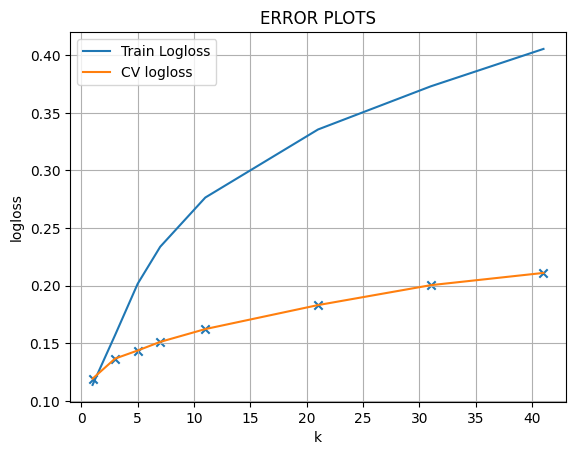

(None, 943.0117890834808)

In [1021]:
knn_tunning(king_bow_1_1_array_df_mergerd_final.drop(columns=['label'], axis=1), king_bow_1_1_array_df_mergerd_final.label)

2.8657866721785057


Classification Report for KNN Base Model --> 
                           precision    recall  f1-score   support

    class 0 -ve Sentiment       0.27      0.56      0.37        57
class 1 Netural Sentiment       0.18      0.29      0.22        58
    class 2 +ve Sentiment       0.58      0.16      0.25       135

                 accuracy                           0.28       250
                macro avg       0.34      0.34      0.28       250
             weighted avg       0.42      0.28      0.27       250

CONFUSION MATRIX KNN base model -->


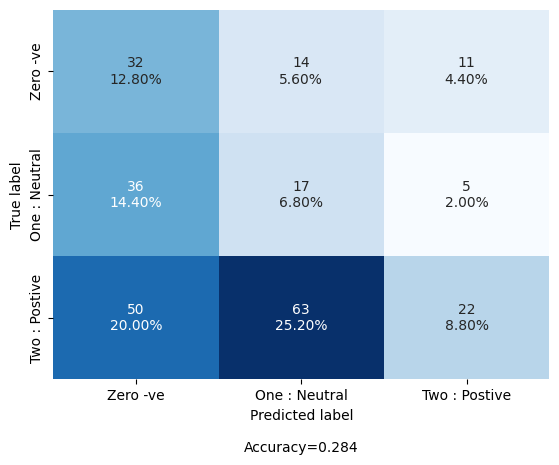

In [1022]:
# Modelling with above KNN best parameter and predicting on test batch set 1

#target dataframe - 
#kishan_holdout_set1_bow_1_1_array_df_k_final

#training data
X = king_bow_1_1_array_df_mergerd_final.drop(columns=['label'], axis=1)
y = king_bow_1_1_array_df_mergerd_final.label

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

knn = KNeighborsClassifier(n_neighbors=11,n_jobs=-1)
calibrated_knn = CalibratedClassifierCV(knn, method='sigmoid')
calibrated_knn.fit(X_smote, y_smote)

y_test_pred = calibrated_knn.predict(kishan_holdout_set1_bow_1_1_array_df_k_final.drop(columns=['label'],axis=1))
y_test_prob = calibrated_knn.predict_proba(kishan_holdout_set1_bow_1_1_array_df_k_final.drop(columns=['label'],axis=1))

y_true = kishan_holdout_set1_bow_1_1_array_df_k_final.label

print(log_loss(y_true,y_test_prob,eps=1e-15))


target_names = ['class 0 -ve Sentiment', 'class 1 Netural Sentiment', 'class 2 +ve Sentiment']
exp_1_cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_categories = ['Zero -ve', 'One : Neutral', 'Two : Postive']


print('\n')
print("Classification Report for KNN Base Model --> ")
print(classification_report(list(y_true), list(y_test_pred), target_names=target_names))

print('CONFUSION MATRIX KNN base model -->')
cf_matrix_exp1__ = confusion_matrix(list(y_true), list(y_test_pred))
make_confusion_matrix(cf_matrix_exp1__, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

# ben 1,2 testing and tuning kings bow 

1
3
5
7
11
21
31
41
knn training time :-> 545.5722167491913 seconds


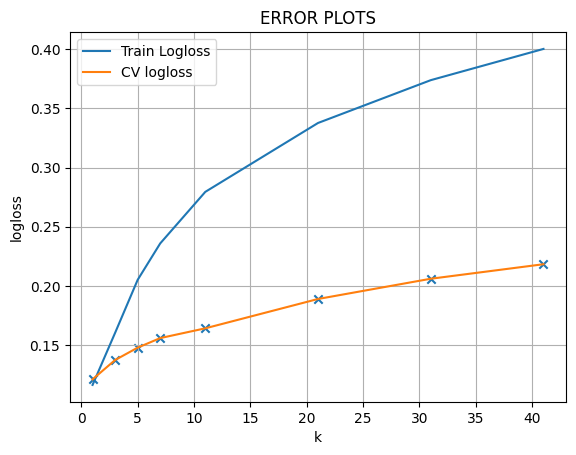

(None, 545.5722167491913)

In [1023]:
knn_tunning(king_bow_1_2_array_df_mergerd_final.drop(columns=['label'], axis=1), king_bow_1_2_array_df_mergerd_final.label)

2.5498871719417604


Classification Report for KNN Base Model --> 
                           precision    recall  f1-score   support

    class 0 -ve Sentiment       0.15      0.39      0.21        36
class 1 Netural Sentiment       0.43      0.40      0.42       124
    class 2 +ve Sentiment       0.26      0.11      0.16        90

                 accuracy                           0.30       250
                macro avg       0.28      0.30      0.26       250
             weighted avg       0.33      0.30      0.29       250

CONFUSION MATRIX KNN base model -->


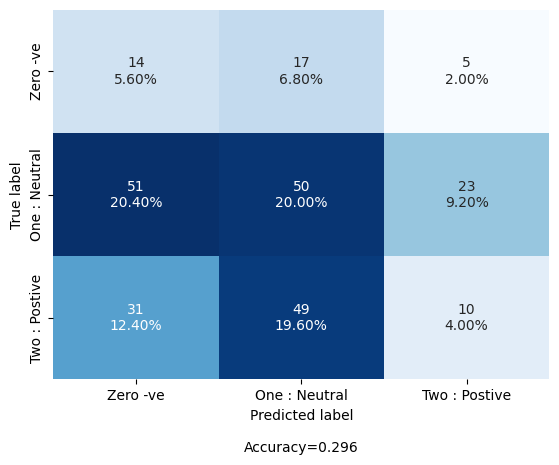

In [1024]:


# Modelling with above KNN best parameter and predicting on test batch set 1

#target dataframe - ben_holdout_set1_bow_1_2_array_df_k_merged_final


#training data
X = king_bow_1_2_array_df_mergerd_final.drop(columns=['label'], axis=1)
y = king_bow_1_2_array_df_mergerd_final.label

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

knn = KNeighborsClassifier(n_neighbors=11)
calibrated_knn = CalibratedClassifierCV(knn, method='sigmoid')
calibrated_knn.fit(X_smote, y_smote)

y_test_pred = calibrated_knn.predict(ben_holdout_set1_bow_1_2_array_df_k_merged_final.drop(columns=['label'],axis=1))
y_test_prob = calibrated_knn.predict_proba(ben_holdout_set1_bow_1_2_array_df_k_merged_final.drop(columns=['label'],axis=1))

y_true = ben_holdout_set1_bow_1_2_array_df_k_merged_final.label

print(log_loss(y_true,y_test_prob,eps=1e-15))


target_names = ['class 0 -ve Sentiment', 'class 1 Netural Sentiment', 'class 2 +ve Sentiment']
exp_1_cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_categories = ['Zero -ve', 'One : Neutral', 'Two : Postive']


print('\n')
print("Classification Report for KNN Base Model --> ")
print(classification_report(list(y_true), list(y_test_pred), target_names=target_names))

print('CONFUSION MATRIX KNN base model -->')
cf_matrix_exp1__ = confusion_matrix(list(y_true), list(y_test_pred))
make_confusion_matrix(cf_matrix_exp1__, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

# ben 1,2 bow top 100 king

1
3
5
7
11
21
31
41
knn training time :-> 40.45108985900879 seconds


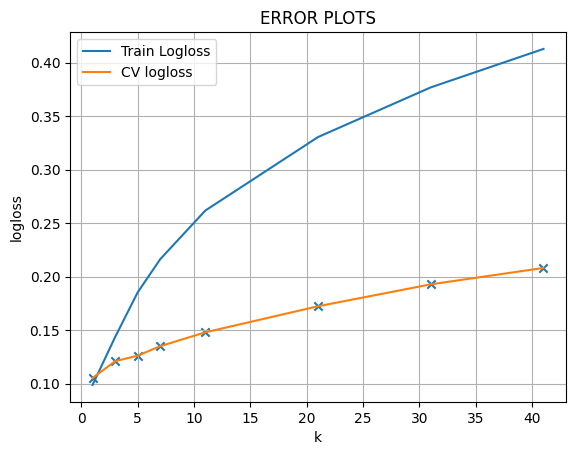

(None, 40.45108985900879)

In [1025]:
knn_tunning(king_bow_1_2_100_array_df_merged_final.drop(columns=['label'], axis=1), king_bow_1_2_100_array_df_merged_final.label)

2.439968517531591


Classification Report for KNN Base Model --> 
                           precision    recall  f1-score   support

    class 0 -ve Sentiment       0.13      0.36      0.20        36
class 1 Netural Sentiment       0.46      0.48      0.47       124
    class 2 +ve Sentiment       0.39      0.10      0.16        90

                 accuracy                           0.33       250
                macro avg       0.33      0.31      0.28       250
             weighted avg       0.39      0.33      0.32       250

CONFUSION MATRIX KNN base model -->


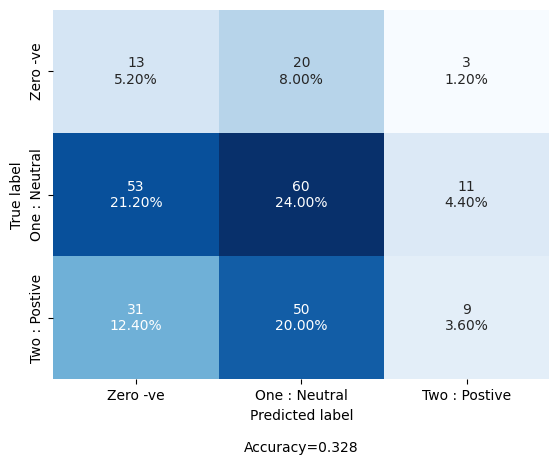

In [1027]:


# Modelling with above KNN best parameter and predicting on test batch set 1

#target dataframe - ben_holdout_set1_bow_1_2_100_array_df_k_merged_final


#training data
X = king_bow_1_2_100_array_df_merged_final.drop(columns=['label'], axis=1)
y = king_bow_1_2_100_array_df_merged_final.label

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

knn = KNeighborsClassifier(n_neighbors=11)
calibrated_knn = CalibratedClassifierCV(knn, method='sigmoid')
calibrated_knn.fit(X_smote, y_smote)

y_test_pred = calibrated_knn.predict(ben_holdout_set1_bow_1_2_100_array_df_k_merged_final.drop(columns=['label'],axis=1))
y_test_prob = calibrated_knn.predict_proba(ben_holdout_set1_bow_1_2_100_array_df_k_merged_final.drop(columns=['label'],axis=1))

y_true = ben_holdout_set1_bow_1_2_100_array_df_k_merged_final.label

print(log_loss(y_true,y_test_prob,eps=1e-15))


target_names = ['class 0 -ve Sentiment', 'class 1 Netural Sentiment', 'class 2 +ve Sentiment']
exp_1_cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_categories = ['Zero -ve', 'One : Neutral', 'Two : Postive']


print('\n')
print("Classification Report for KNN Base Model --> ")
print(classification_report(list(y_true), list(y_test_pred), target_names=target_names))

print('CONFUSION MATRIX KNN base model -->')
cf_matrix_exp1__ = confusion_matrix(list(y_true), list(y_test_pred))
make_confusion_matrix(cf_matrix_exp1__, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

In [ ]:
## SVM



In [1028]:
def SVM(var1,var2): 
    """
    This function is use to build n hyperparamater tune SVM 
    """
    X = var1
    y_true = var2
    
    x_train,x_test,y_train,y_test=train_test_split(X , y_true , stratify=y_true , test_size=0.2)
    x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train , stratify=y_train , test_size=0.2)

    #Svm HyperTuning

    logLoss_train=[ ]
    logLoss_cv=[ ]

    c = [0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10, 100 ] 
    for i in c:
        clf_SGD=SGDClassifier(loss='hinge',penalty='l2',alpha=i,random_state=42)
        #clf_SGD.fit(x_train,y_train)
        calibrated = CalibratedClassifierCV(clf_SGD, method='sigmoid', cv=3)
        calibrated.fit(x_train , y_train)
        predict_y = calibrated.predict_proba(x_train)
        predict_y2 = calibrated.predict_proba(x_cv)
        logLoss_train.append(log_loss(y_train,predict_y, eps=1e-15))
        logLoss_cv.append(log_loss(y_cv,predict_y2, eps=1e-15))

    plt.plot(np.log(c), logLoss_train, label='Train logloss')
    plt.plot(np.log(c), logLoss_cv, label='CV logloss')
    plt.scatter(np.log(c), logLoss_cv, label='CV AUC')
    plt.legend()
    plt.xlabel("C: hyperparameter") 
    plt.ylabel("LogLoss") 
    plt.title("ERROR PLOTS") 
    return(plt.show())

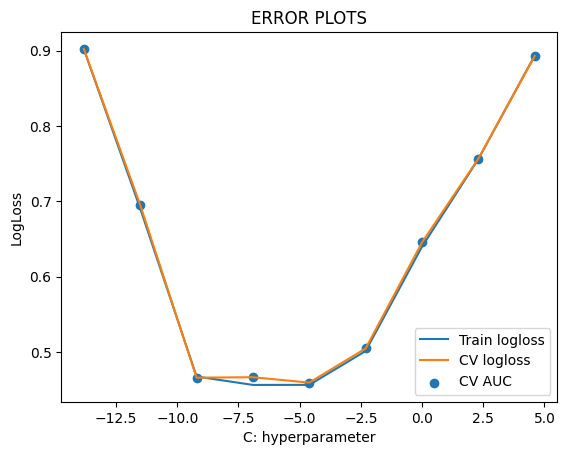

In [1029]:
SVM(king_bow_1_2_100_array_df_merged_final.drop(columns=['label'], axis=1), king_bow_1_2_100_array_df_merged_final.label)

Classification Report for SVM  Model --> 
                           precision    recall  f1-score   support

    class 0 -ve Sentiment       0.19      0.53      0.28        36
class 1 Netural Sentiment       0.48      0.56      0.51       124
    class 2 +ve Sentiment       0.50      0.03      0.06        90

                 accuracy                           0.36       250
                macro avg       0.39      0.37      0.29       250
             weighted avg       0.45      0.36      0.32       250

CONFUSION MATRIX SVM model -->


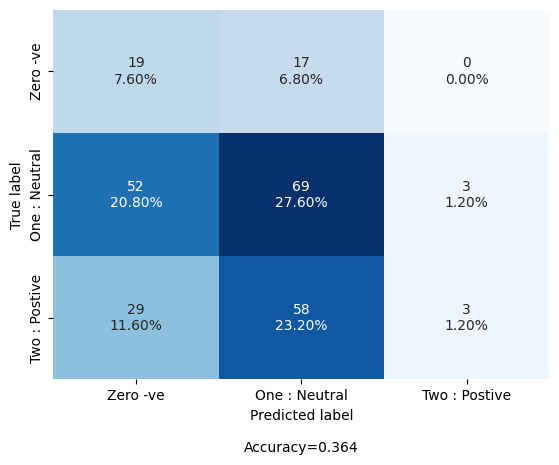

In [1031]:
# Training and testing using best paramenter
X= king_bow_1_2_100_array_df_merged_final.drop(columns=['label'], axis=1)
y = king_bow_1_2_100_array_df_merged_final.label

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


exp1_sv = SGDClassifier(loss='hinge',penalty='l2',alpha=0.001, random_state=42)
exp1_sv.fit(X_smote, y_smote)
exp1_sv_y = exp1_sv.predict(ben_holdout_set1_bow_1_2_100_array_df_k_merged_final.drop(columns=['label'],axis=1))

y_test = ben_holdout_set1_bow_1_2_100_array_df_k_merged_final.label
target_names = ['class 0 -ve Sentiment', 'class 1 Netural Sentiment', 'class 2 +ve Sentiment']
exp_1_cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_categories = ['Zero -ve', 'One : Neutral', 'Two : Postive']


# Best scoring for SVM model
print("Classification Report for SVM  Model --> ")
print(classification_report(y_test, exp1_sv_y, target_names=target_names))

print('CONFUSION MATRIX SVM model -->')
cf_matrix_exp1 = confusion_matrix(y_test, exp1_sv_y)
make_confusion_matrix(cf_matrix_exp1, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

Classification Report for SVM  Model --> 
                           precision    recall  f1-score   support

    class 0 -ve Sentiment       0.30      0.19      0.24        36
class 1 Netural Sentiment       0.52      0.71      0.60       124
    class 2 +ve Sentiment       0.32      0.20      0.24        90

                 accuracy                           0.45       250
                macro avg       0.38      0.37      0.36       250
             weighted avg       0.41      0.45      0.42       250

CONFUSION MATRIX SVM model -->


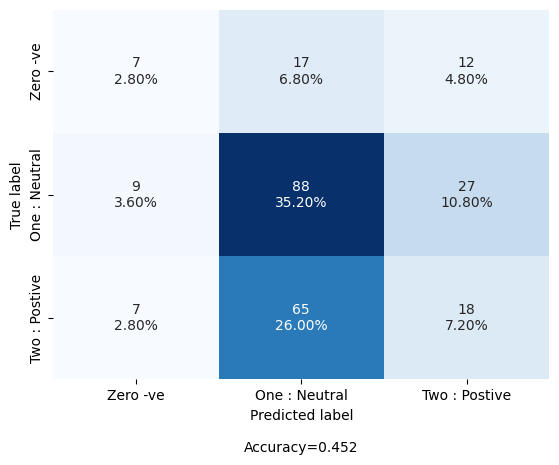

In [1034]:
# Training and testing using best paramenter
X= king_bow_1_2_100_array_df_merged_final.drop(columns=['label'], axis=1)
y = king_bow_1_2_100_array_df_merged_final.label

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


exp1_sv = SVC(C=0.001,kernel='rbf',random_state=42)

exp1_sv.fit(X_smote, y_smote)
exp1_sv_y = exp1_sv.predict(ben_holdout_set1_bow_1_2_100_array_df_k_merged_final.drop(columns=['label'],axis=1))

y_test = ben_holdout_set1_bow_1_2_100_array_df_k_merged_final.label
target_names = ['class 0 -ve Sentiment', 'class 1 Netural Sentiment', 'class 2 +ve Sentiment']
exp_1_cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_categories = ['Zero -ve', 'One : Neutral', 'Two : Postive']


# Best scoring for SVM model
print("Classification Report for SVM  Model --> ")
print(classification_report(y_test, exp1_sv_y, target_names=target_names))

print('CONFUSION MATRIX SVM model -->')
cf_matrix_exp1 = confusion_matrix(y_test, exp1_sv_y)
make_confusion_matrix(cf_matrix_exp1, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

Classification Report for SVM  Model --> 
                           precision    recall  f1-score   support

    class 0 -ve Sentiment       0.30      0.19      0.24        36
class 1 Netural Sentiment       0.52      0.71      0.60       124
    class 2 +ve Sentiment       0.32      0.20      0.24        90

                 accuracy                           0.45       250
                macro avg       0.38      0.37      0.36       250
             weighted avg       0.41      0.45      0.42       250

CONFUSION MATRIX SVM model -->


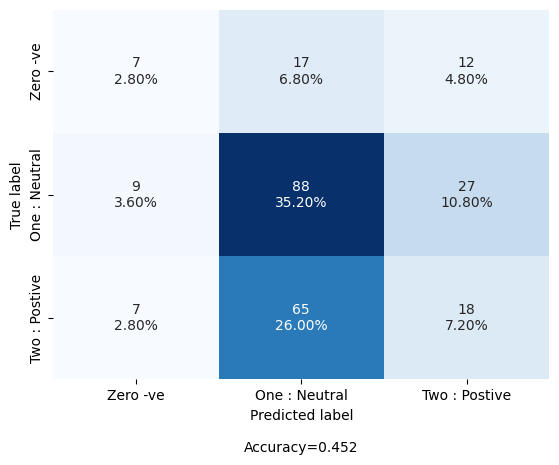

In [1035]:
# Training and testing using best paramenter
X= king_tfidf_1_2_array_df_meged_final.drop(columns=['label'], axis=1)
y = king_tfidf_1_2_array_df_meged_final.label

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


exp1_sv = SVC(C=0.001,kernel='rbf',random_state=42)

exp1_sv.fit(X_smote, y_smote)
exp1_sv_y = exp1_sv.predict(ben_holdout_set1_tfidf_1_2_array_df_k_merged_final.drop(columns=['label'],axis=1))

y_test = ben_holdout_set1_tfidf_1_2_array_df_k_merged_final.label
target_names = ['class 0 -ve Sentiment', 'class 1 Netural Sentiment', 'class 2 +ve Sentiment']
exp_1_cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_categories = ['Zero -ve', 'One : Neutral', 'Two : Postive']


# Best scoring for SVM model
print("Classification Report for SVM  Model --> ")
print(classification_report(y_test, exp1_sv_y, target_names=target_names))

print('CONFUSION MATRIX SVM model -->')
cf_matrix_exp1 = confusion_matrix(y_test, exp1_sv_y)
make_confusion_matrix(cf_matrix_exp1, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

In [795]:
raw_train_data_king.cleaned_text_len.max()

700

In [969]:
raw_train_data_king.to_csv("Google.csv", header=True, index=False)

In [1036]:
#since we understood bigram are doing good 1,2 we will take that datasets forward

# decision tree
def tune_decission_tree_(df, label):
    X = df
    y = label
    
    # apply SMOTE for upsampling
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X, y)

    param_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 5, 7, 9, 11, 13, 15],
    'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'min_samples_leaf' : [0.1, 0.2, 0.3, 0.4, 0.5]
    }
    
    clf = DecisionTreeClassifier(random_state = 42)
    grid_clf = GridSearchCV(clf, param_grid=param_dict, cv=5, n_jobs=-1)
    grid_clf.fit(X_smote,y_smote)
    
    return (grid_clf)

In [1037]:
res_ = tune_decission_tree_(king_bow_1_2_100_array_df_merged_final.drop(columns=['label'], axis=1),king_bow_1_2_100_array_df_merged_final.label)

res_.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1}

Classification Report for DT Model --> 
                           precision    recall  f1-score   support

    class 0 -ve Sentiment       0.15      0.36      0.21        36
class 1 Netural Sentiment       0.43      0.44      0.43       124
    class 2 +ve Sentiment       0.20      0.08      0.11        90

                 accuracy                           0.30       250
                macro avg       0.26      0.29      0.25       250
             weighted avg       0.31      0.30      0.28       250

CONFUSION MATRIX DT model -->


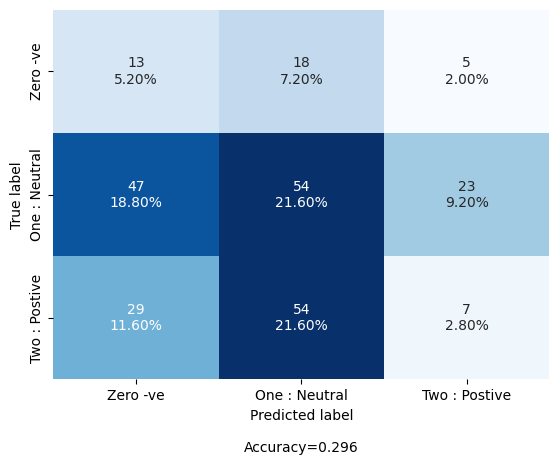

In [1038]:
## Training and testing using best parameter

X = king_bow_1_2_100_array_df_merged_final.drop(columns=['label'], axis=1)
y = king_bow_1_2_100_array_df_merged_final.label

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

exp1_dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1, random_state=42)
exp1_dt.fit(X_smote, y_smote)
exp1_dt_y = exp1_dt.predict(ben_holdout_set1_bow_1_2_100_array_df_k_merged_final.drop(columns=['label'],axis=1))

y_test = ben_holdout_set1_bow_1_2_100_array_df_k_merged_final.label

target_names = ['class 0 -ve Sentiment', 'class 1 Netural Sentiment', 'class 2 +ve Sentiment']
exp_1_cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_categories = ['Zero -ve', 'One : Neutral', 'Two : Postive']


# base scoring for DT model
print("Classification Report for DT Model --> ")
print(classification_report(y_test, exp1_dt_y, target_names=target_names))

print('CONFUSION MATRIX DT model -->')
cf_matrix_exp1 = confusion_matrix(y_test, exp1_dt_y)
make_confusion_matrix(cf_matrix_exp1, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

In [1039]:
res_ = tune_decission_tree_(king_tfidf_1_2_array_df_meged_final.drop(columns=['label'], axis=1) ,king_tfidf_1_2_array_df_meged_final.label)

res_.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1}

Classification Report for DT Model --> 
                           precision    recall  f1-score   support

    class 0 -ve Sentiment       0.15      0.36      0.21        36
class 1 Netural Sentiment       0.47      0.58      0.52       124
    class 2 +ve Sentiment       0.38      0.03      0.06        90

                 accuracy                           0.35       250
                macro avg       0.33      0.33      0.26       250
             weighted avg       0.39      0.35      0.31       250

CONFUSION MATRIX DT model -->


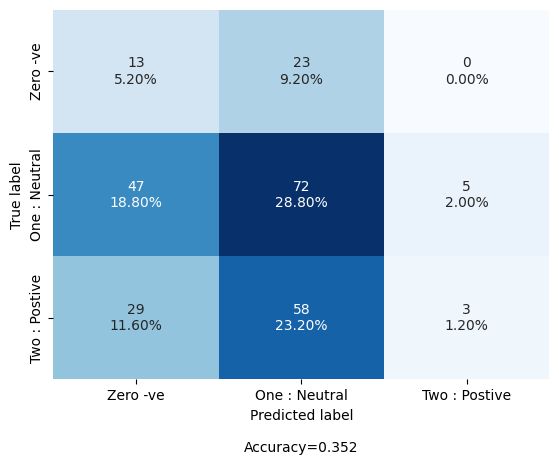

In [1040]:
## Training and testing using best parameter

X= king_tfidf_1_2_array_df_meged_final.drop(columns=['label'], axis=1)
y = king_tfidf_1_2_array_df_meged_final.label

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

exp1_dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=0.1, min_samples_split=0.1, random_state=42)
exp1_dt.fit(X_smote, y_smote)
exp1_dt_y = exp1_dt.predict(ben_holdout_set1_tfidf_1_2_array_df_k_merged_final.drop(columns=['label'],axis=1))

y_test = ben_holdout_set1_tfidf_1_2_array_df_k_merged_final.label

target_names = ['class 0 -ve Sentiment', 'class 1 Netural Sentiment', 'class 2 +ve Sentiment']
exp_1_cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_categories = ['Zero -ve', 'One : Neutral', 'Two : Postive']


# base scoring for DT model
print("Classification Report for DT Model --> ")
print(classification_report(y_test, exp1_dt_y, target_names=target_names))

print('CONFUSION MATRIX DT model -->')
cf_matrix_exp1 = confusion_matrix(y_test, exp1_dt_y)
make_confusion_matrix(cf_matrix_exp1, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

Best parameters: 
{'clf__max_depth': 11, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Classification report: 
                           precision    recall  f1-score   support

    class 0 -ve Sentiment       0.15      0.44      0.23        36
class 1 Netural Sentiment       0.45      0.50      0.48       124
    class 2 +ve Sentiment       0.56      0.06      0.10        90

                 accuracy                           0.33       250
                macro avg       0.39      0.33      0.27       250
             weighted avg       0.45      0.33      0.30       250

CONFUSION MATRIX RF model -->


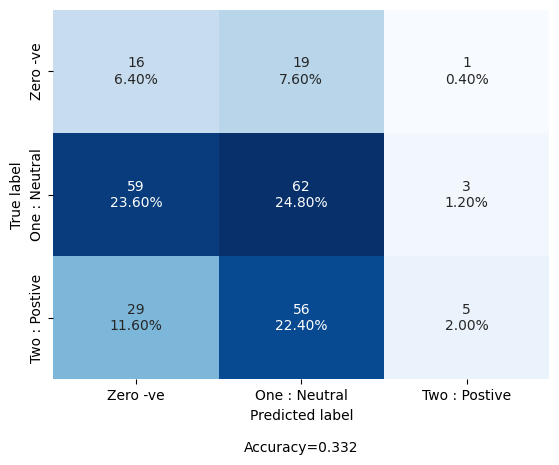

In [1041]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import classification_report

X= king_tfidf_1_2_array_df_meged_final.drop(columns=['label'], axis=1)
y = king_tfidf_1_2_array_df_meged_final.label

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Define the pipeline for the random forest classifier
pipeline = Pipeline([
    ('clf', RandomForestClassifier())
])

# Define the hyperparameters to tune
parameters = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [1,3,5, 7, 9, 11],
    'clf__min_samples_split': [2, 5, 10]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_smote, y_smote)

# Print the best hyperparameters
print("Best parameters: ")
print(grid_search.best_params_)

# Predict the labels of the test set using the best estimator





y_pred = grid_search.best_estimator_.predict(ben_holdout_set1_tfidf_1_2_array_df_k_merged_final.drop(columns=['label'],axis=1))
y_test = ben_holdout_set1_tfidf_1_2_array_df_k_merged_final.label

# Print the classification report
print("Classification report: ")
print(classification_report(y_test, y_pred, target_names=target_names))


print('CONFUSION MATRIX RF model -->')
cf_matrix_exp1 = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cf_matrix_exp1, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

Best parameters: 
{'clf__max_depth': 11, 'clf__min_samples_split': 10, 'clf__n_estimators': 100}
Classification report: 
                           precision    recall  f1-score   support

    class 0 -ve Sentiment       0.15      0.39      0.22        36
class 1 Netural Sentiment       0.48      0.56      0.52       124
    class 2 +ve Sentiment       0.42      0.06      0.10        90

                 accuracy                           0.36       250
                macro avg       0.35      0.34      0.28       250
             weighted avg       0.41      0.36      0.32       250

CONFUSION MATRIX RF model -->


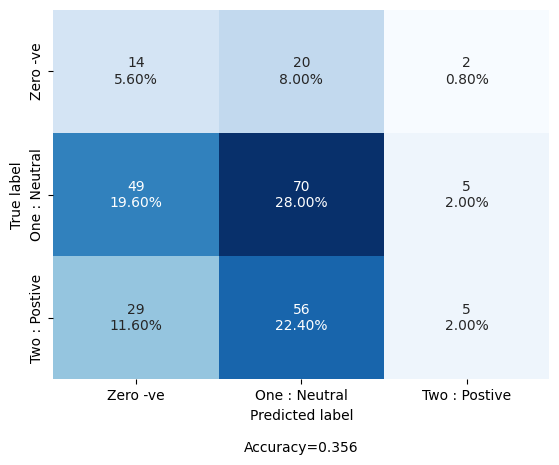

In [1042]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import classification_report

X = king_bow_1_2_100_array_df_merged_final.drop(columns=['label'], axis=1)
y = king_bow_1_2_100_array_df_merged_final.label

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Define the pipeline for the random forest classifier
pipeline = Pipeline([
    ('clf', RandomForestClassifier())
])

# Define the hyperparameters to tune
parameters = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [1,3,5, 7, 9, 11],
    'clf__min_samples_split': [2, 5, 10]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_smote, y_smote)

# Print the best hyperparameters
print("Best parameters: ")
print(grid_search.best_params_)

# Predict the labels of the test set using the best estimator

y_pred = grid_search.best_estimator_.predict(ben_holdout_set1_bow_1_2_100_array_df_k_merged_final.drop(columns=['label'],axis=1))

y_test = ben_holdout_set1_bow_1_2_100_array_df_k_merged_final.label


# Print the classification report
print("Classification report: ")
print(classification_report(y_test, y_pred, target_names=target_names))


print('CONFUSION MATRIX RF model -->')
cf_matrix_exp1 = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cf_matrix_exp1, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

In [1043]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report


X = king_bow_1_2_100_array_df_merged_final.drop(columns=['label'], axis=1)
y = king_bow_1_2_100_array_df_merged_final.label

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


# Define the pipeline for the classifier
pipeline = Pipeline([
    ('clf', GradientBoostingClassifier(random_state=42))
])

# Define the hyperparameters to tune for the classifier
parameters = {
    'clf__learning_rate': [0.01, 0.1, 1.0],
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [3, 5, 7, 9, 11, 13, 15],
    'clf__min_samples_split': [2, 5, 10]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_smote, y_smote)

# Print the best hyperparameters
print("Best parameters: ")
print(grid_search.best_params_)

# Predict the labels of the test set using the best estimator
y_pred = grid_search.best_estimator_.predict(ben_holdout_set1_bow_1_2_100_array_df_k_merged_final.drop(columns=['label'],axis=1))

y_test = ben_holdout_set1_bow_1_2_100_array_df_k_merged_final.label


# Print the classification report
print("Classification report: ")
print(classification_report(y_test, y_pred, target_names=target_names))


print('CONFUSION MATRIX DT model -->')
cf_matrix_exp1 = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cf_matrix_exp1, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)


KeyboardInterrupt: 

In [991]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report


X= king_tfidf_1_2_array_df_meged_final.drop(columns=['label'], axis=1)
y = king_tfidf_1_2_array_df_meged_final.label

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


# Define the pipeline for the classifier
pipeline = Pipeline([
    ('clf', GradientBoostingClassifier(random_state=42))
])

# Define the hyperparameters to tune for the classifier
parameters = {
    'clf__learning_rate': [0.01, 0.1, 1.0],
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [3, 5, 7, 9, 11, 13, 15],
    'clf__min_samples_split': [2, 5, 10]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_smote, y_smote)

# Print the best hyperparameters
print("Best parameters: ")
print(grid_search.best_params_)

# Predict the labels of the test set using the best estimator
y_pred = grid_search.best_estimator_.predict(ben_holdout_set1_tfidf_1_2_array_df_k_merged_final.drop(columns=['label'],axis=1))
y_test = ben_holdout_set1_tfidf_1_2_array_df_k_merged_final.label


# Print the classification report
print("Classification report: ")
print(classification_report(y_test, y_pred, target_names=target_names))


print('CONFUSION MATRIX DT model -->')
cf_matrix_exp1 = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cf_matrix_exp1, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)




KeyboardInterrupt: 

In [994]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


X= king_tfidf_1_2_array_df_meged_final.drop(columns=['label'], axis=1)
y = king_tfidf_1_2_array_df_meged_final.label

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


# Define the pipeline for the classifier
pipeline = Pipeline([
    ('clf', XGBClassifier(random_state=42))
])

# Define the hyperparameters to tune for the classifier
parameters = {
    'clf__learning_rate': [0.01, 0.1, 1.0],
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [3, 5, 7, 9, 11, 13, 15, 17],
    'clf__min_child_weight': [1, 5, 10],
    'clf__subsample': [0.6, 0.8, 1.0],
    'clf__colsample_bytree': [0.6, 0.8, 1.0],
    'clf__gamma': [0, 0.1, 0.5, 1, 5]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_smote, y_smote)

# Print the best hyperparameters
print("Best parameters: ")
print(grid_search.best_params_)

# Predict the labels of the test set using the best estimator
y_pred = grid_search.best_estimator_.predict(ben_holdout_set1_tfidf_1_2_array_df_k_merged_final.drop(columns=['label'],axis=1))
y_test = ben_holdout_set1_tfidf_1_2_array_df_k_merged_final.label

# Print the classification report
print("Classification report: ")
print(classification_report(y_test, y_pred))


# Print the classification report
print("Classification report: ")
print(classification_report(y_test, y_pred, target_names=target_names))


print('CONFUSION MATRIX DT model -->')
cf_matrix_exp1 = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cf_matrix_exp1, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)



KeyboardInterrupt: 

In [993]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 472.2 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


In [995]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


X = king_bow_1_2_100_array_df_merged_final.drop(columns=['label'], axis=1)
y = king_bow_1_2_100_array_df_merged_final.label

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


# Define the pipeline for the classifier
pipeline = Pipeline([
    ('clf', XGBClassifier(random_state=42))
])

# Define the hyperparameters to tune for the classifier
parameters = {
    'clf__learning_rate': [0.01, 0.1, 1.0],
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [3, 5, 7, 9, 11, 13, 15, 17],
    'clf__min_child_weight': [1, 5, 10],
    'clf__subsample': [0.6, 0.8, 1.0],
    'clf__colsample_bytree': [0.6, 0.8, 1.0],
    'clf__gamma': [0, 0.1, 0.5, 1, 5]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_smote, y_smote)

# Print the best hyperparameters
print("Best parameters: ")
print(grid_search.best_params_)

# Predict the labels of the test set using the best estimator
y_pred = grid_search.best_estimator_.redict(ben_holdout_set1_bow_1_2_100_array_df_k_merged_final.drop(columns=['label'],axis=1))

y_test = ben_holdout_set1_bow_1_2_100_array_df_k_merged_final.label


# Print the classification report
print("Classification report: ")
print(classification_report(y_test, y_pred, target_names=target_names))


print('CONFUSION MATRIX XGBoost model -->')
cf_matrix_exp1 = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cf_matrix_exp1, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)


KeyboardInterrupt: 

### Another Experiments below but not using them ########

In [751]:
std_ = StandardScaler()
std_.fit(raw_std_data)

std_scaled_data = std_.transform(raw_std_data)

scaled_df_trn = pd.DataFrame(std_scaled_data, columns=cols_for_std_global)

In [752]:
scaled_df_trn

raw_length_tweet  cleaned_length_tweet  word_count  char_count  \
0            -0.339008             -0.283541   -0.259307   -0.339008   
1             1.337761              1.269655    1.593950    1.337761   
2            -1.512745             -1.060139   -1.741912   -1.512745   
3             1.270690             -0.110964    2.149927    1.270690   
4             0.197558             -0.024675    0.667321    0.197558   
...                ...                   ...         ...         ...   
9687          1.237155              0.665634    1.779275    1.237155   
9688          0.298164              0.104758    0.852647    0.298164   
9689         -0.238401             -0.110964   -0.629958   -0.238401   
9690         -0.171331             -0.585551    0.111345   -0.171331   
9691         -0.540220             -0.110964   -0.259307   -0.540220   

      stopwords  numerics     upper  punctuation_count  hastag_count  \
0     -1.405010 -0.312220  2.712415           1.644121      3.537851   
1      1.135482 -0.312220  0.134520          -0.550585     -0.436839   
2     -1.405010 -0.312220  3.356889          -1.177644      0.358099   
3      3.358413 -0.312220  0.778994          -0.550585     -0.436839   
4     -0.134764  2.155996  0.134520           0.703533      1.153037   
...         ...       ...       ...                ...           ...   
9687   2.723290 -0.312220  0.134520          -1.177644      0.358099   
9688   0.500359 -0.312220  0.778994           0.076474     -0.436839   
9689  -0.134764 -0.312220 -0.509953          -0.237056     -0.436839   
9690  -0.452325 -0.312220  0.778994           1.644121     -0.436839   
9691  -0.452325 -0.312220  0.134520          -0.550585     -0.436839   

      word_count_cleaned_text  char_count_cleaned_text  numerics_cleaned_text  
0                    0.209345                -0.283541                    0.0  
1                    1.437721                 1.269655                    0.0  
2                   -1.633219                -1.060139                    0.0  
3                    0.209345                -0.110964                    0.0  
4                    0.516439                -0.024675                    0.0  
...                       ...                      ...                    ...  
9687                 0.823533                 0.665634                    0.0  
9688                 0.209345                 0.104758                    0.0  
9689                -0.711937                -0.110964                    0.0  
9690                -0.097749                -0.585551                    0.0  
9691                 0.209345                -0.110964                    0.0  

[9692 rows x 12 columns]

In [753]:
c=0
for v in scaled_df_trn.isnull().sum().values:
    c+=v
print(c)

0


In [754]:
scaled_df_trn.to_csv('std_features.csv', header=True, index=False)



In [757]:
raw_train_data['log_raw_length_tweet'].isnull().sum()

0

In [756]:

#scaled_df_trn['safe_text'] = raw_train_data['safe_text']
#scaled_df_trn['label'] = raw_train_data['label']
scaled_df_trn['log_raw_length_tweet'] = raw_train_data['log_raw_length_tweet']

#scaled_df_trn['cleaned_text'] = raw_train_data['cleaned_text']
scaled_df_trn['log_cleaned_length_tweet'] = raw_train_data['log_cleaned_length_tweet']
scaled_df_trn['word_density'] = raw_train_data['word_density']
scaled_df_trn['word_density_cleaned_text'] = raw_train_data['word_density_cleaned_text']
#scaled_df_trn['w2v_data'] = raw_train_data['w2v_data']

In [758]:
scaled_df_trn

raw_length_tweet  cleaned_length_tweet  word_count  char_count  \
0            -0.339008             -0.283541   -0.259307   -0.339008   
1             1.337761              1.269655    1.593950    1.337761   
2            -1.512745             -1.060139   -1.741912   -1.512745   
3             1.270690             -0.110964    2.149927    1.270690   
4             0.197558             -0.024675    0.667321    0.197558   
...                ...                   ...         ...         ...   
9687          1.237155              0.665634    1.779275    1.237155   
9688          0.298164              0.104758    0.852647    0.298164   
9689         -0.238401             -0.110964   -0.629958   -0.238401   
9690         -0.171331             -0.585551    0.111345   -0.171331   
9691         -0.540220             -0.110964   -0.259307   -0.540220   

      stopwords  numerics     upper  punctuation_count  hastag_count  \
0     -1.405010 -0.312220  2.712415           1.644121      3.537851   
1      1.135482 -0.312220  0.134520          -0.550585     -0.436839   
2     -1.405010 -0.312220  3.356889          -1.177644      0.358099   
3      3.358413 -0.312220  0.778994          -0.550585     -0.436839   
4     -0.134764  2.155996  0.134520           0.703533      1.153037   
...         ...       ...       ...                ...           ...   
9687   2.723290 -0.312220  0.134520          -1.177644      0.358099   
9688   0.500359 -0.312220  0.778994           0.076474     -0.436839   
9689  -0.134764 -0.312220 -0.509953          -0.237056     -0.436839   
9690  -0.452325 -0.312220  0.778994           1.644121     -0.436839   
9691  -0.452325 -0.312220  0.134520          -0.550585     -0.436839   

      word_count_cleaned_text  char_count_cleaned_text  numerics_cleaned_text  \
0                    0.209345                -0.283541                    0.0   
1                    1.437721                 1.269655                    0.0   
2                   -1.633219                -1.060139                    0.0   
3                    0.209345                -0.110964                    0.0   
4                    0.516439                -0.024675                    0.0   
...                       ...                      ...                    ...   
9687                 0.823533                 0.665634                    0.0   
9688                 0.209345                 0.104758                    0.0   
9689                -0.711937                -0.110964                    0.0   
9690                -0.097749                -0.585551                    0.0   
9691                 0.209345                -0.110964                    0.0   

      log_raw_length_tweet  log_cleaned_length_tweet  word_density  \
0                 4.499810                  4.077537         5.625   
1                 4.941642                  4.553877      5.384615   
2                 4.007333                  3.713572         6.875   
3                 4.927254                  4.143135      4.758621   
4                 4.663439                  4.174387      5.047619   
...                    ...                       ...           ...   
9687              3.931826                  2.890372      5.666667   
9688              4.174387                  3.637586      5.909091   
9689              4.804021                  4.406719      6.777778   
9690              4.615121                  4.110874      5.611111   
9691              4.700480                  4.454347      6.470588   

      word_density_cleaned_text  
0                      5.363636  
1                      6.333333  
2                      8.200000  
3                      5.727273  
4                      5.416667  
...                         ...  
9687                   4.500000  
9688                   5.428571  
9689                   7.454545  
9690                   6.100000  
9691                   6.615385  

[9692 rows x 16 columns]

In [761]:
c=0
for v in scaled_df_trn.isnull().sum().values:
    c+=v
print(c)

1196


In [762]:
scaled_df_trn['avg_word'] = raw_train_data['avg_word']

In [763]:
raw_train_data.columns

Index(['safe_text', 'label', 'raw_length_tweet', 'log_raw_length_tweet',
       'cleaned_text', 'cleaned_length_tweet', 'log_cleaned_length_tweet',
       'word_count', 'char_count', 'avg_word', 'stopwords', 'numerics',
       'upper', 'word_density', 'punctuation_count', 'hastag_count',
       'word_count_cleaned_text', 'char_count_cleaned_text',
       'numerics_cleaned_text', 'word_density_cleaned_text', 'w2v_data'],
      dtype='object')

In [764]:
scaled_df_trn.columns

Index(['raw_length_tweet', 'cleaned_length_tweet', 'word_count', 'char_count',
       'stopwords', 'numerics', 'upper', 'punctuation_count', 'hastag_count',
       'word_count_cleaned_text', 'char_count_cleaned_text',
       'numerics_cleaned_text', 'log_raw_length_tweet',
       'log_cleaned_length_tweet', 'word_density', 'word_density_cleaned_text',
       'avg_word'],
      dtype='object')

In [765]:
scaled_df_trn.shape

(9692, 17)

In [766]:
#FINAL SCALED SET OF DATAFRAME Ready to combine with word vectors
scaled_df_trn.to_csv('Scaled_set1_df_zoom.csv', header=True, index=False)
scaled_df_trn.head()

raw_length_tweet  cleaned_length_tweet  word_count  char_count  stopwords  \
0         -0.339008             -0.283541   -0.259307   -0.339008  -1.405010   
1          1.337761              1.269655    1.593950    1.337761   1.135482   
2         -1.512745             -1.060139   -1.741912   -1.512745  -1.405010   
3          1.270690             -0.110964    2.149927    1.270690   3.358413   
4          0.197558             -0.024675    0.667321    0.197558  -0.134764   

   numerics     upper  punctuation_count  hastag_count  \
0 -0.312220  2.712415           1.644121      3.537851   
1 -0.312220  0.134520          -0.550585     -0.436839   
2 -0.312220  3.356889          -1.177644      0.358099   
3 -0.312220  0.778994          -0.550585     -0.436839   
4  2.155996  0.134520           0.703533      1.153037   

   word_count_cleaned_text  char_count_cleaned_text  numerics_cleaned_text  \
0                 0.209345                -0.283541                    0.0   
1                 1.437721                 1.269655                    0.0   
2                -1.633219                -1.060139                    0.0   
3                 0.209345                -0.110964                    0.0   
4                 0.516439                -0.024675                    0.0   

   log_raw_length_tweet  log_cleaned_length_tweet  word_density  \
0              4.499810                  4.077537         5.625   
1              4.941642                  4.553877      5.384615   
2              4.007333                  3.713572         6.875   
3              4.927254                  4.143135      4.758621   
4              4.663439                  4.174387      5.047619   

   word_density_cleaned_text  avg_word  
0                   5.363636  5.066667  
1                   6.333333  4.640000  
2                   8.200000  7.000000  
3                   5.727273  3.964286  
4                   5.416667  4.350000

In [767]:
scaled_df_trn['log_raw_length_tweet'].fillna(float(scaled_df_trn['log_raw_length_tweet'].mean()), inplace=True)
scaled_df_trn['log_cleaned_length_tweet'].fillna(float(scaled_df_trn['log_cleaned_length_tweet'].mean()), inplace=True)
scaled_df_trn['word_density'].fillna(float(scaled_df_trn['word_density'].mean()), inplace=True)
scaled_df_trn['word_density_cleaned_text'].fillna(float(scaled_df_trn['word_density_cleaned_text'].mean()), inplace=True)
scaled_df_trn['avg_word'].fillna(float(scaled_df_trn['avg_word'].mean()), inplace=True)

In [768]:
c=0
for v in scaled_df_trn.isnull().sum().values:
    c+=v
print(c)

0


In [769]:
#IMP CELL
#Global_Labels_Training = scaled_df_trn['label']
Global_Train = scaled_df_trn.copy(deep=True)

In [406]:
#modified_df_scaled = scaled_df_trn.drop(columns=['safe_text', 'label','cleaned_text','w2v_data'],axis=1)

In [407]:
#IMP CELL
#modified_df_scaled

raw_length_tweet  cleaned_length_tweet  word_count  char_count  \
0            -0.339008             -0.283541   -0.259307   -0.339008   
1             1.337761              1.269655    1.593950    1.337761   
2            -1.512745             -1.060139   -1.741912   -1.512745   
3             1.270690             -0.110964    2.149927    1.270690   
4             0.197558             -0.024675    0.667321    0.197558   
...                ...                   ...         ...         ...   
9687          1.237155              0.665634    1.779275    1.237155   
9688          0.298164              0.104758    0.852647    0.298164   
9689         -0.238401             -0.110964   -0.629958   -0.238401   
9690         -0.171331             -0.585551    0.111345   -0.171331   
9691         -0.540220             -0.110964   -0.259307   -0.540220   

      stopwords  numerics     upper  punctuation_count  hastag_count  \
0     -1.405010 -0.312220  2.712415           1.644121      3.537851   
1      1.135482 -0.312220  0.134520          -0.550585     -0.436839   
2     -1.405010 -0.312220  3.356889          -1.177644      0.358099   
3      3.358413 -0.312220  0.778994          -0.550585     -0.436839   
4     -0.134764  2.155996  0.134520           0.703533      1.153037   
...         ...       ...       ...                ...           ...   
9687   2.723290 -0.312220  0.134520          -1.177644      0.358099   
9688   0.500359 -0.312220  0.778994           0.076474     -0.436839   
9689  -0.134764 -0.312220 -0.509953          -0.237056     -0.436839   
9690  -0.452325 -0.312220  0.778994           1.644121     -0.436839   
9691  -0.452325 -0.312220  0.134520          -0.550585     -0.436839   

      word_count_cleaned_text  char_count_cleaned_text  numerics_cleaned_text  \
0                    0.209345                -0.283541                    0.0   
1                    1.437721                 1.269655                    0.0   
2                   -1.633219                -1.060139                    0.0   
3                    0.209345                -0.110964                    0.0   
4                    0.516439                -0.024675                    0.0   
...                       ...                      ...                    ...   
9687                 0.823533                 0.665634                    0.0   
9688                 0.209345                 0.104758                    0.0   
9689                -0.711937                -0.110964                    0.0   
9690                -0.097749                -0.585551                    0.0   
9691                 0.209345                -0.110964                    0.0   

      log_raw_length_tweet  log_cleaned_length_tweet  word_density  \
0                 4.499810                  4.077537         5.625   
1                 4.941642                  4.553877      5.384615   
2                 4.007333                  3.713572         6.875   
3                 4.927254                  4.143135      4.758621   
4                 4.663439                  4.174387      5.047619   
...                    ...                       ...           ...   
9687              3.931826                  2.890372      5.666667   
9688              4.174387                  3.637586      5.909091   
9689              4.804021                  4.406719      6.777778   
9690              4.615121                  4.110874      5.611111   
9691              4.700480                  4.454347      6.470588   

      word_density_cleaned_text  avg_word  
0                      5.363636  5.066667  
1                      6.333333  4.640000  
2                      8.200000  7.000000  
3                      5.727273  3.964286  
4                      5.416667  4.350000  
...                         ...       ...  
9687                   4.500000  5.500000  
9688                   5.428571  5.600000  
9689                   7.454545  6.235294  
9690                  

In [770]:
scaled_df_trn

raw_length_tweet  cleaned_length_tweet  word_count  char_count  \
0            -0.339008             -0.283541   -0.259307   -0.339008   
1             1.337761              1.269655    1.593950    1.337761   
2            -1.512745             -1.060139   -1.741912   -1.512745   
3             1.270690             -0.110964    2.149927    1.270690   
4             0.197558             -0.024675    0.667321    0.197558   
...                ...                   ...         ...         ...   
9687          1.237155              0.665634    1.779275    1.237155   
9688          0.298164              0.104758    0.852647    0.298164   
9689         -0.238401             -0.110964   -0.629958   -0.238401   
9690         -0.171331             -0.585551    0.111345   -0.171331   
9691         -0.540220             -0.110964   -0.259307   -0.540220   

      stopwords  numerics     upper  punctuation_count  hastag_count  \
0     -1.405010 -0.312220  2.712415           1.644121      3.537851   
1      1.135482 -0.312220  0.134520          -0.550585     -0.436839   
2     -1.405010 -0.312220  3.356889          -1.177644      0.358099   
3      3.358413 -0.312220  0.778994          -0.550585     -0.436839   
4     -0.134764  2.155996  0.134520           0.703533      1.153037   
...         ...       ...       ...                ...           ...   
9687   2.723290 -0.312220  0.134520          -1.177644      0.358099   
9688   0.500359 -0.312220  0.778994           0.076474     -0.436839   
9689  -0.134764 -0.312220 -0.509953          -0.237056     -0.436839   
9690  -0.452325 -0.312220  0.778994           1.644121     -0.436839   
9691  -0.452325 -0.312220  0.134520          -0.550585     -0.436839   

      word_count_cleaned_text  char_count_cleaned_text  numerics_cleaned_text  \
0                    0.209345                -0.283541                    0.0   
1                    1.437721                 1.269655                    0.0   
2                   -1.633219                -1.060139                    0.0   
3                    0.209345                -0.110964                    0.0   
4                    0.516439                -0.024675                    0.0   
...                       ...                      ...                    ...   
9687                 0.823533                 0.665634                    0.0   
9688                 0.209345                 0.104758                    0.0   
9689                -0.711937                -0.110964                    0.0   
9690                -0.097749                -0.585551                    0.0   
9691                 0.209345                -0.110964                    0.0   

      log_raw_length_tweet  log_cleaned_length_tweet  word_density  \
0                 4.499810                  4.077537         5.625   
1                 4.941642                  4.553877      5.384615   
2                 4.007333                  3.713572         6.875   
3                 4.927254                  4.143135      4.758621   
4                 4.663439                  4.174387      5.047619   
...                    ...                       ...           ...   
9687              3.931826                  2.890372      5.666667   
9688              4.174387                  3.637586      5.909091   
9689              4.804021                  4.406719      6.777778   
9690              4.615121                  4.110874      5.611111   
9691              4.700480                  4.454347      6.470588   

      word_density_cleaned_text  avg_word  
0                      5.363636  5.066667  
1                      6.333333  4.640000  
2                      8.200000  7.000000  
3                      5.727273  3.964286  
4                      5.416667  4.350000  
...                         ...       ...  
9687                   4.500000  5.500000  
9688                   5.428571  5.600000  
9689                   7.454545  6.235294  
9690                  

In [782]:
scaled_df_trn['TARGET_VARIABLE_TO_PREDICT'].fillna(scaled_df_trn['TARGET_VARIABLE_TO_PREDICT'].mode()[0], inplace=True)

In [781]:
scaled_df_trn['TARGET_VARIABLE_TO_PREDICT'].dtype

CategoricalDtype(categories=['0', '1', '2'], ordered=False)

In [783]:
scaled_df_trn['TARGET_VARIABLE_TO_PREDICT'].isnull().sum()

0

In [784]:
c=0
for v in scaled_df_trn.isnull().sum().values:
    c+=v
print(c)

0


In [785]:
scaled_df_trn.to_csv("FINAL_ZOOM_FINAL.csv", header=True, index=False)

In [905]:
#Rough
df_temp = pd.read_csv("FINAL_ZOOM_FINAL.csv")

In [906]:
EXP11_DATAFRAME_ = pd.concat([df_temp, exp11_dataframe], axis=1)

In [907]:
row_indexs = list(EXP11_DATAFRAME_.index)

row_indexes_inf = []
for i in row_indexs:
    if np.isinf(np.array(EXP11_DATAFRAME_.iloc[i,:])).any() == True:
        row_indexes_inf.append(i)
        

print(len(row_indexes_inf))
EXP11_DATAFRAME_ = EXP11_DATAFRAME_.drop(index=row_indexes_inf)

301


In [908]:
EXP11_DATAFRAME_['TARGET_VARIABLE_TO_PREDICT'] = EXP11_DATAFRAME_['TARGET_VARIABLE_TO_PREDICT'].astype('category')

In [904]:
EXP11_DATAFRAME_.dtypes

raw_length_tweet        float64
cleaned_length_tweet    float64
word_count              float64
char_count              float64
stopwords               float64
                         ...   
95                      float64
96                      float64
97                      float64
98                      float64
99                      float64
Length: 118, dtype: object

## Now Performing concat operation of Scaled dataframe to our word embeddings and creating final training sets
# Not using them


In [786]:
LABELS= scaled_df_trn['TARGET_VARIABLE_TO_PREDICT'].values

In [788]:
#Exp 7 Binary BOW with ngram-range 1,2 and min_df =5

EXP7_DATAFRAME = pd.concat([scaled_df_trn, exp7_dataframe], axis=1)


In [791]:
#Exp8 Non Binary TFIDF witn ngram 1,1 and min_df =5
EXP8_DATAFRAME = pd.concat([scaled_df_trn, exp8_dataframe], axis=1)
#EXP8_LABELS = LABELS

In [792]:
#Exp 9 non binary tfidf with range 1,2
EXP9_DATAFRAME = pd.concat([scaled_df_trn, exp9_dataframe], axis=1)
#EXP9_LABELS = LABELS

In [793]:
#Exp 10 binary tfidf with range 1,2
EXP10_DATAFRAME = pd.concat([scaled_df_trn, exp10_dataframe], axis=1)
#EXP10_LABELS = LABELS


In [794]:
#Exp11 BOW Top 100 features witn ngram 1,1 binary
EXP11_DATAFRAME = pd.concat([scaled_df_trn, exp11_dataframe], axis=1)
#EXP11_LABELS = LABELS


In [795]:
#Exp12 BOW non binary ngram range 1,1 with top 500 features
EXP12_DATAFRAME = pd.concat([scaled_df_trn, exp12_dataframe], axis=1)
#EXP12_LABELS = LABELS


In [796]:
#EXP13 BOW nonbinary ngram range 1,2 top 100 features

EXP13_DATAFRAME = pd.concat([scaled_df_trn, exp13_dataframe], axis=1)
#EXP13_LABELS = LABELS


In [797]:
#Exp 14 Top 500 features Binary BOW with ngram range 1,2

EXP14_DATAFRAME = pd.concat([scaled_df_trn, exp14_dataframe], axis=1)
#EXP14_LABELS = LABELS


In [798]:
#Exp 15 Top 100 Features binary TFIDF ngram range 1,1

EXP15_DATAFRAME = pd.concat([scaled_df_trn, exp15_dataframe], axis=1)
#EXP15_LABELS = LABELS


In [799]:
#EXP 16 TFIDF top 500 with binary and ngram range 1,2

EXP16_DATAFRAME = pd.concat([scaled_df_trn, exp16_dataframe], axis=1)
#EXP16_LABELS = LABELS


In [800]:
#EXP 17 W2V

EXP17_DATAFRAME = pd.concat([scaled_df_trn, df_w2v_traindata], axis=1)
#EXP17_LABELS = LABELS

In [801]:
#EXP 18 W2V TFIDF

EXP18_DATAFRAME = pd.concat([scaled_df_trn, df_train_avgw2v_tfidf], axis=1)
#EXP18_LABELS = LABELS

In [804]:
c=0
for v in EXP15_DATAFRAME.isnull().sum().values:
    c+=v
print(c)

0


In [ ]:
#TESTDATAPROCESSING STARTS

In [877]:
data_ben = pd.read_excel('Manually_Label_Ben.xlsx')
data_ben_copy = pd.read_excel('Manually_Label_Ben.xlsx')

data_choi = pd.read_excel('Manual_Choi.xlsx')
data_choi_copy = pd.read_excel('Manual_Choi.xlsx')

data_kishan = pd.read_excel('Manual_Kishan.xlsx')
data_kishan_copy = pd.read_excel('Manual_Kishan.xlsx')

In [887]:
#data to do now

data_ben_copy

id                                          tweet_url  \
0    1329067945822199808  https://twitter.com/Ugomego/status/13290679458...   
1    1329067942147866624  https://twitter.com/polizeros/status/132906794...   
2    1329067938335264776  https://twitter.com/Rozemberg15/status/1329067...   
3    1329067941376131077  https://twitter.com/orangeboxwebdev/status/132...   
4    1329067940914708480  https://twitter.com/ErnestMFlower/status/13290...   
..                   ...                                                ...   
495  1329068885383888900  https://twitter.com/LV08111/status/13290688853...   
496  1329068890090053634  https://twitter.com/Creatoncrafts/status/13290...   
497  1329068885874655236  https://twitter.com/ArthmannLee/status/1329068...   
498  1329068889074970624  https://twitter.com/capt_neb/status/1329068889...   
499  1329068894343081984  https://twitter.com/PaulaVasan/status/13290688...   

                         created_at  parsed_created_at user_screen_name  \
0    Wed Nov 18 14:24:25 +0000 2020       44153.350289          Ugomego   
1    Wed Nov 18 14:24:24 +0000 2020       44153.350278        polizeros   
2    Wed Nov 18 14:24:24 +0000 2020       44153.350278      Rozemberg15   
3    Wed Nov 18 14:24:24 +0000 2020       44153.350278  orangeboxwebdev   
4    Wed Nov 18 14:24:24 +0000 2020       44153.350278    ErnestMFlower   
..                              ...                ...              ...   
495  Wed Nov 18 14:28:09 +0000 2020       44153.352882          LV08111   
496  Wed Nov 18 14:28:10 +0000 2020       44153.352894    Creatoncrafts   
497  Wed Nov 18 14:28:09 +0000 2020       44153.352882      ArthmannLee   
498  Wed Nov 18 14:28:10 +0000 2020       44153.352894         capt_neb   
499  Wed Nov 18 14:28:11 +0000 2020       44153.352905       PaulaVasan   

                                                  text tweet_type  label  
0    Coronavirus live updates: Pfizer will seek reg...   original      0  
1    RT @jacyanthis: Pfizer Covid-19 vaccine data i...    retweet      0  
2    RT @pfizer: The study reached 170 confirmed ca...    retweet      0  
3    The Covid vaccine propaganda convinces no-one ...      reply     -1  
4    RT @Mike_Pence: President @realDonaldTrump pro...    retweet      1  
..                                                 ...        ...    ...  
495  RT @Mike_Pence: President @realDonaldTrump pro...    retweet      0  
496  RT @CavendishCoins: Lethal concoction or a vac...    retweet     -1  
497  RT @DrEricDing: BREAKINGâ€”Updated results fro...    retweet      0  
498  I sure hope literally everyone I know is prepa...   original      1  
499  Some hopeful news! The news from Pfizer just g...   original      1  

[500 rows x 8 columns]

In [ ]:
1. Tiff #sking for now
2. W2v-tfidf #sking for now
3. Bow-top100  1,1
4. Tiff-top100 1,1
5. Bow 1,2 top 500
6. Tiff 1,2 top 500 or top 100


In [ ]:
#Creating W2V for KNN Testing hyp k = 21 -skipping
#Creating TFIDF-W2V for KNN Testing hyp = 21 -skipping

#EXP11 Creating Bow-top100 with ngram 1,1 binary bow for KNN Testing hyp = 21
#EXP13 Creating BOW-top100 with ngram 1,2 nonbinary for knn testing hyp=21

#Creating TFIDF-top100 for KNN Testing hyp = 21
#BOW 1,2 top 500 for KNN Testing hyp = 21
#TFIDF 1,2 top 500 for KNN Testing hyp = 21



In [888]:
#EXP11 Creating Bow-top100 with ngram 1,1 binary bow for KNN Testing hyp = 21
data_ben_copy

id                                          tweet_url  \
0    1329067945822199808  https://twitter.com/Ugomego/status/13290679458...   
1    1329067942147866624  https://twitter.com/polizeros/status/132906794...   
2    1329067938335264776  https://twitter.com/Rozemberg15/status/1329067...   
3    1329067941376131077  https://twitter.com/orangeboxwebdev/status/132...   
4    1329067940914708480  https://twitter.com/ErnestMFlower/status/13290...   
..                   ...                                                ...   
495  1329068885383888900  https://twitter.com/LV08111/status/13290688853...   
496  1329068890090053634  https://twitter.com/Creatoncrafts/status/13290...   
497  1329068885874655236  https://twitter.com/ArthmannLee/status/1329068...   
498  1329068889074970624  https://twitter.com/capt_neb/status/1329068889...   
499  1329068894343081984  https://twitter.com/PaulaVasan/status/13290688...   

                         created_at  parsed_created_at user_screen_name  \
0    Wed Nov 18 14:24:25 +0000 2020       44153.350289          Ugomego   
1    Wed Nov 18 14:24:24 +0000 2020       44153.350278        polizeros   
2    Wed Nov 18 14:24:24 +0000 2020       44153.350278      Rozemberg15   
3    Wed Nov 18 14:24:24 +0000 2020       44153.350278  orangeboxwebdev   
4    Wed Nov 18 14:24:24 +0000 2020       44153.350278    ErnestMFlower   
..                              ...                ...              ...   
495  Wed Nov 18 14:28:09 +0000 2020       44153.352882          LV08111   
496  Wed Nov 18 14:28:10 +0000 2020       44153.352894    Creatoncrafts   
497  Wed Nov 18 14:28:09 +0000 2020       44153.352882      ArthmannLee   
498  Wed Nov 18 14:28:10 +0000 2020       44153.352894         capt_neb   
499  Wed Nov 18 14:28:11 +0000 2020       44153.352905       PaulaVasan   

                                                  text tweet_type  label  
0    Coronavirus live updates: Pfizer will seek reg...   original      0  
1    RT @jacyanthis: Pfizer Covid-19 vaccine data i...    retweet      0  
2    RT @pfizer: The study reached 170 confirmed ca...    retweet      0  
3    The Covid vaccine propaganda convinces no-one ...      reply     -1  
4    RT @Mike_Pence: President @realDonaldTrump pro...    retweet      1  
..                                                 ...        ...    ...  
495  RT @Mike_Pence: President @realDonaldTrump pro...    retweet      0  
496  RT @CavendishCoins: Lethal concoction or a vac...    retweet     -1  
497  RT @DrEricDing: BREAKINGâ€”Updated results fro...    retweet      0  
498  I sure hope literally everyone I know is prepa...   original      1  
499  Some hopeful news! The news from Pfizer just g...   original      1  

[500 rows x 8 columns]

In [912]:
data_ben_copy.isnull().sum()

id                   0
tweet_url            0
created_at           0
parsed_created_at    0
user_screen_name     0
text                 0
tweet_type           0
label                0
dtype: int64

In [914]:
data_ben_copy.duplicated().sum()

0

In [915]:
#processing
data_ben_copy['safe_text'] = data_ben_copy['text']

In [917]:
# implementing log and length of each tweet
data_ben_copy['raw_length_tweet'] = data_ben_copy['safe_text'].apply(lambda x: len(x))
data_ben_copy['log_raw_length_tweet'] = data_ben_copy['raw_length_tweet'].apply(lambda x: np.log(x))

data_ben_copy['cleaned_text'] = data_ben_copy['safe_text'].apply(lambda x: train_text_cleaner(x))

data_ben_copy['cleaned_length_tweet'] = data_ben_copy['cleaned_text'].apply(lambda x: len(x))
data_ben_copy['log_cleaned_length_tweet'] = data_ben_copy['cleaned_length_tweet'].apply(lambda x: np.log(x))

# Lets do some more feature processing

# processing for raw safe text train data
data_ben_copy['word_count']=data_ben_copy['safe_text'].apply(lambda x: len(str(x).split(" ")))
data_ben_copy['char_count'] = data_ben_copy['safe_text'].str.len()

def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

data_ben_copy['avg_word'] = data_ben_copy['safe_text'].apply(lambda x: avg_word(x))

from nltk.corpus import stopwords
stop = stopwords.words('english')

data_ben_copy['stopwords'] = data_ben_copy['safe_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data_ben_copy['numerics'] = data_ben_copy['safe_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data_ben_copy['upper'] = data_ben_copy['safe_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data_ben_copy['word_density'] = data_ben_copy['char_count'] / (data_ben_copy['word_count']+1)
data_ben_copy['punctuation_count'] = data_ben_copy['safe_text'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
data_ben_copy['hastag_count'] = data_ben_copy['safe_text'].apply(lambda x: len("".join(_ for _ in x if _=="#"))) 


# processing for raw cleaned text train data
data_ben_copy['word_count_cleaned_text']=data_ben_copy['cleaned_text'].apply(lambda x: len(str(x).split(" ")))
data_ben_copy['char_count_cleaned_text'] = data_ben_copy['cleaned_text'].str.len()
data_ben_copy['numerics_cleaned_text'] = data_ben_copy['cleaned_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data_ben_copy['word_density_cleaned_text'] = data_ben_copy['char_count_cleaned_text'] / (data_ben_copy['word_count_cleaned_text']+1)


In [925]:
data_ben_copy

id                                          tweet_url  \
0    1329067945822199808  https://twitter.com/Ugomego/status/13290679458...   
1    1329067942147866624  https://twitter.com/polizeros/status/132906794...   
2    1329067938335264776  https://twitter.com/Rozemberg15/status/1329067...   
3    1329067941376131077  https://twitter.com/orangeboxwebdev/status/132...   
4    1329067940914708480  https://twitter.com/ErnestMFlower/status/13290...   
..                   ...                                                ...   
495  1329068885383888900  https://twitter.com/LV08111/status/13290688853...   
496  1329068890090053634  https://twitter.com/Creatoncrafts/status/13290...   
497  1329068885874655236  https://twitter.com/ArthmannLee/status/1329068...   
498  1329068889074970624  https://twitter.com/capt_neb/status/1329068889...   
499  1329068894343081984  https://twitter.com/PaulaVasan/status/13290688...   

                         created_at  parsed_created_at user_screen_name  \
0    Wed Nov 18 14:24:25 +0000 2020       44153.350289          Ugomego   
1    Wed Nov 18 14:24:24 +0000 2020       44153.350278        polizeros   
2    Wed Nov 18 14:24:24 +0000 2020       44153.350278      Rozemberg15   
3    Wed Nov 18 14:24:24 +0000 2020       44153.350278  orangeboxwebdev   
4    Wed Nov 18 14:24:24 +0000 2020       44153.350278    ErnestMFlower   
..                              ...                ...              ...   
495  Wed Nov 18 14:28:09 +0000 2020       44153.352882          LV08111   
496  Wed Nov 18 14:28:10 +0000 2020       44153.352894    Creatoncrafts   
497  Wed Nov 18 14:28:09 +0000 2020       44153.352882      ArthmannLee   
498  Wed Nov 18 14:28:10 +0000 2020       44153.352894         capt_neb   
499  Wed Nov 18 14:28:11 +0000 2020       44153.352905       PaulaVasan   

                                                  text tweet_type  label  \
0    Coronavirus live updates: Pfizer will seek reg...   original      0   
1    RT @jacyanthis: Pfizer Covid-19 vaccine data i...    retweet      0   
2    RT @pfizer: The study reached 170 confirmed ca...    retweet      0   
3    The Covid vaccine propaganda convinces no-one ...      reply     -1   
4    RT @Mike_Pence: President @realDonaldTrump pro...    retweet      1   
..                                                 ...        ...    ...   
495  RT @Mike_Pence: President @realDonaldTrump pro...    retweet      0   
496  RT @CavendishCoins: Lethal concoction or a vac...    retweet     -1   
497  RT @DrEricDing: BREAKINGâ€”Updated results fro...    retweet      0   
498  I sure hope literally everyone I know is prepa...   original      1   
499  Some hopeful news! The news from Pfizer just g...   original      1   

                                             safe_text  raw_length_tweet  ...  \
0    Coronavirus live updates: Pfizer will seek reg...               236  ...   
1    RT @jacyanthis: Pfizer Covid-19 vaccine data i...               168  ...   
2    RT @pfizer: The study reached 170 confirmed ca...               142  ...   
3    The Covid vaccine propaganda convinces no-one ...               179  ...   
4    RT @Mike_Pence: President @realDonaldTrump pro...               142  ...   
..                                                 ...               ...  ...   
495  RT @Mike_Pence: President @realDonaldTrump pro...               142  ...   
496  RT @CavendishCoins: Lethal concoction or a vac...               156  ...   
497  RT @DrEricDing: BREAKINGâ€”Updated results fro...               146  ...   
498  I sure hope literally everyone I know is prepa...               110  ...   
499  Some hopeful news! The news from Pfizer just g...               194  ...   

     stopwords numerics  upper  word_density  punctuation_count  hastag_count  \
0            4        0      0      9.076923                 16             0   
1            1        1      1      3.818182                 14             0   
2            3        1      2      6.76190

In [920]:
cols_for_std_global_ = ['raw_length_tweet', 'cleaned_length_tweet', 'word_count','char_count', 'stopwords', 'numerics',
       'upper', 'punctuation_count', 'hastag_count',
       'word_count_cleaned_text', 'char_count_cleaned_text',
       'numerics_cleaned_text']

data_ben_copy_ = data_ben_copy[cols_for_std_global_]

In [921]:
data_ben_copy_

raw_length_tweet  cleaned_length_tweet  word_count  char_count  \
0                 236                   169          25         236   
1                 168                    77          43         168   
2                 142                   100          20         142   
3                 179                   121          31         179   
4                 142                   101          22         142   
..                ...                   ...         ...         ...   
495               142                   101          22         142   
496               156                   103          14         156   
497               146                    93          21         146   
498               110                    82          20         110   
499               194                   108          31         194   

     stopwords  numerics  upper  punctuation_count  hastag_count  \
0            4         0      0                 16             0   
1            1         1      1                 14             0   
2            3         1      2                  6             2   
3           10         0      0                  6             0   
4            8         1      2                  5             0   
..         ...       ...    ...                ...           ...   
495          8         1      2                  5             0   
496          2         0      4                 19             7   
497          4         0      2                  7             1   
498          7         0      2                  1             0   
499         10         0      1                 11             0   

     word_count_cleaned_text  char_count_cleaned_text  numerics_cleaned_text  
0                         28                      169                      0  
1                         14                       77                      0  
2                         13                      100                      0  
3                         16                      121                      0  
4                         13                      101                      0  
..                       ...                      ...                    ...  
495                       13                      101                      0  
496                       15                      103                      0  
497                       14                       93                      0  
498                       12                       82                      0  
499                       18                      108                      0  

[500 rows x 12 columns]

In [922]:
#Standardisation
std_scaled_data_ = std_.transform(data_ben_copy_)

scaled_df_trn_ben = pd.DataFrame(std_scaled_data_, columns=cols_for_std_global_)


In [923]:
scaled_df_trn_ben

raw_length_tweet  cleaned_length_tweet  word_count  char_count  \
0            4.557156              4.462334    1.593950    4.557156   
1            2.276751              0.493057    4.929811    2.276751   
2            1.404832              1.485376    0.667321    1.404832   
3            2.645640              2.391407    2.705903    2.645640   
4            1.404832              1.528521    1.037973    1.404832   
..                ...                   ...         ...         ...   
495          1.404832              1.528521    1.037973    1.404832   
496          1.874327              1.614809   -0.444632    1.874327   
497          1.538973              1.183366    0.852647    1.538973   
498          0.331700              0.708779    0.667321    0.331700   
499          3.148671              1.830531    2.705903    3.148671   

     stopwords  numerics     upper  punctuation_count  hastag_count  \
0    -0.134764 -0.312220 -0.509953           3.211769     -0.436839   
1    -1.087448  2.155996  0.134520           2.584710     -0.436839   
2    -0.452325  2.155996  0.778994           0.076474      1.153037   
3     1.770606 -0.312220 -0.509953           0.076474     -0.436839   
4     1.135482  2.155996  0.778994          -0.237056     -0.436839   
..         ...       ...       ...                ...           ...   
495   1.135482  2.155996  0.778994          -0.237056     -0.436839   
496  -0.769887 -0.312220  2.067941           4.152357      5.127728   
497  -0.134764 -0.312220  0.778994           0.390003      0.358099   
498   0.817921 -0.312220  0.778994          -1.491174     -0.436839   
499   1.770606 -0.312220  0.134520           1.644121     -0.436839   

     word_count_cleaned_text  char_count_cleaned_text  numerics_cleaned_text  
0                   5.737037                 4.462334                    0.0  
1                   1.437721                 0.493057                    0.0  
2                   1.130627                 1.485376                    0.0  
3                   2.051909                 2.391407                    0.0  
4                   1.130627                 1.528521                    0.0  
..                       ...                      ...                    ...  
495                 1.130627                 1.528521                    0.0  
496                 1.744815                 1.614809                    0.0  
497                 1.437721                 1.183366                    0.0  
498                 0.823533                 0.708779                    0.0  
499                 2.666097                 1.830531                    0.0  

[500 rows x 12 columns]

In [926]:


#scaled_df_trn['safe_text'] = raw_train_data['safe_text']
#scaled_df_trn['label'] = raw_train_data['label']
scaled_df_trn_ben['log_raw_length_tweet'] = data_ben_copy['log_raw_length_tweet']

#scaled_df_trn['cleaned_text'] = raw_train_data['cleaned_text']
scaled_df_trn_ben['log_cleaned_length_tweet'] = data_ben_copy['log_cleaned_length_tweet']
scaled_df_trn_ben['word_density'] = data_ben_copy['word_density']
scaled_df_trn_ben['word_density_cleaned_text'] = data_ben_copy['word_density_cleaned_text']
#scaled_df_trn['w2v_data'] = raw_train_data['w2v_data']

In [929]:
scaled_df_trn_ben['avg_word'] = data_ben_copy['avg_word']

In [930]:
c=0
for v in scaled_df_trn_ben.isnull().sum().values:
    c+=v
print(c)

0


In [931]:
scaled_df_trn_ben

raw_length_tweet  cleaned_length_tweet  word_count  char_count  \
0            4.557156              4.462334    1.593950    4.557156   
1            2.276751              0.493057    4.929811    2.276751   
2            1.404832              1.485376    0.667321    1.404832   
3            2.645640              2.391407    2.705903    2.645640   
4            1.404832              1.528521    1.037973    1.404832   
..                ...                   ...         ...         ...   
495          1.404832              1.528521    1.037973    1.404832   
496          1.874327              1.614809   -0.444632    1.874327   
497          1.538973              1.183366    0.852647    1.538973   
498          0.331700              0.708779    0.667321    0.331700   
499          3.148671              1.830531    2.705903    3.148671   

     stopwords  numerics     upper  punctuation_count  hastag_count  \
0    -0.134764 -0.312220 -0.509953           3.211769     -0.436839   
1    -1.087448  2.155996  0.134520           2.584710     -0.436839   
2    -0.452325  2.155996  0.778994           0.076474      1.153037   
3     1.770606 -0.312220 -0.509953           0.076474     -0.436839   
4     1.135482  2.155996  0.778994          -0.237056     -0.436839   
..         ...       ...       ...                ...           ...   
495   1.135482  2.155996  0.778994          -0.237056     -0.436839   
496  -0.769887 -0.312220  2.067941           4.152357      5.127728   
497  -0.134764 -0.312220  0.778994           0.390003      0.358099   
498   0.817921 -0.312220  0.778994          -1.491174     -0.436839   
499   1.770606 -0.312220  0.134520           1.644121     -0.436839   

     word_count_cleaned_text  char_count_cleaned_text  numerics_cleaned_text  \
0                   5.737037                 4.462334                    0.0   
1                   1.437721                 0.493057                    0.0   
2                   1.130627                 1.485376                    0.0   
3                   2.051909                 2.391407                    0.0   
4                   1.130627                 1.528521                    0.0   
..                       ...                      ...                    ...   
495                 1.130627                 1.528521                    0.0   
496                 1.744815                 1.614809                    0.0   
497                 1.437721                 1.183366                    0.0   
498                 0.823533                 0.708779                    0.0   
499                 2.666097                 1.830531                    0.0   

     log_raw_length_tweet  log_cleaned_length_tweet  word_density  \
0                5.463832                  5.129899      9.076923   
1                5.123964                  4.343805      3.818182   
2                4.955827                  4.605170      6.761905   
3                5.187386                  4.795791      5.593750   
4                4.955827                  4.615121      6.173913   
..                    ...                       ...           ...   
495              4.955827                  4.615121      6.173913   
496              5.049856                  4.634729     10.400000   
497              4.983607                  4.532599      6.636364   
498              4.700480                  4.406719      5.238095   
499              5.267858                  4.682131      6.062500   

     word_density_cleaned_text  avg_word  
0                     5.827586  7.464286  
1                     5.133333  7.176471  
2                     7.142857  6.150000  
3                     7.117647  4.806452  
4                     7.214286  5.500000  
..                         ...       ...  
495                   7.214286  5.500000  
496                   6.437500  8.812500  
497                   6.200000  6.000000  
498                   6.307692  4.550000  
499                   5.684211  5.29

In [932]:
scaled_df_trn_ben['TARGET_VARIABLE_TO_PREDICT'] = data_ben_copy['label']

In [933]:
scaled_df_trn_ben

raw_length_tweet  cleaned_length_tweet  word_count  char_count  \
0            4.557156              4.462334    1.593950    4.557156   
1            2.276751              0.493057    4.929811    2.276751   
2            1.404832              1.485376    0.667321    1.404832   
3            2.645640              2.391407    2.705903    2.645640   
4            1.404832              1.528521    1.037973    1.404832   
..                ...                   ...         ...         ...   
495          1.404832              1.528521    1.037973    1.404832   
496          1.874327              1.614809   -0.444632    1.874327   
497          1.538973              1.183366    0.852647    1.538973   
498          0.331700              0.708779    0.667321    0.331700   
499          3.148671              1.830531    2.705903    3.148671   

     stopwords  numerics     upper  punctuation_count  hastag_count  \
0    -0.134764 -0.312220 -0.509953           3.211769     -0.436839   
1    -1.087448  2.155996  0.134520           2.584710     -0.436839   
2    -0.452325  2.155996  0.778994           0.076474      1.153037   
3     1.770606 -0.312220 -0.509953           0.076474     -0.436839   
4     1.135482  2.155996  0.778994          -0.237056     -0.436839   
..         ...       ...       ...                ...           ...   
495   1.135482  2.155996  0.778994          -0.237056     -0.436839   
496  -0.769887 -0.312220  2.067941           4.152357      5.127728   
497  -0.134764 -0.312220  0.778994           0.390003      0.358099   
498   0.817921 -0.312220  0.778994          -1.491174     -0.436839   
499   1.770606 -0.312220  0.134520           1.644121     -0.436839   

     word_count_cleaned_text  char_count_cleaned_text  numerics_cleaned_text  \
0                   5.737037                 4.462334                    0.0   
1                   1.437721                 0.493057                    0.0   
2                   1.130627                 1.485376                    0.0   
3                   2.051909                 2.391407                    0.0   
4                   1.130627                 1.528521                    0.0   
..                       ...                      ...                    ...   
495                 1.130627                 1.528521                    0.0   
496                 1.744815                 1.614809                    0.0   
497                 1.437721                 1.183366                    0.0   
498                 0.823533                 0.708779                    0.0   
499                 2.666097                 1.830531                    0.0   

     log_raw_length_tweet  log_cleaned_length_tweet  word_density  \
0                5.463832                  5.129899      9.076923   
1                5.123964                  4.343805      3.818182   
2                4.955827                  4.605170      6.761905   
3                5.187386                  4.795791      5.593750   
4                4.955827                  4.615121      6.173913   
..                    ...                       ...           ...   
495              4.955827                  4.615121      6.173913   
496              5.049856                  4.634729     10.400000   
497              4.983607                  4.532599      6.636364   
498              4.700480                  4.406719      5.238095   
499              5.267858                  4.682131      6.062500   

     word_density_cleaned_text  avg_word  TARGET_VARIABLE_TO_PREDICT  
0                     5.827586  7.464286                           0  
1                     5.133333  7.176471                           0  
2                     7.142857  6.150000                           0  
3                     7.117647  4.806452                          -1  
4                     7.214286  5.500000                           1  
..                         ...       ...                         ...  
495         

In [940]:
#exp 11 Bow top 100

#BOW n-gram - 1,1, binary

exp11_bow_1_1__ = []
for text in data_ben_copy['cleaned_text'].values:
    exp11_bow_1_1__.append(text)
    

#exp11_bow_cv_1_1 = CountVectorizer(ngram_range=(1,1), min_df=5, max_features=100, binary=True)
#exp11_bow_cv_1_1.fit(exp11_bow_1_1)

#ctv.fit(raw_train_data['cleaned_text'])
exp11_bow_1_1_out___ =  exp11_bow_cv_1_1.transform(exp11_bow_1_1__) 

#exp11_bow_1_1_out_featurenames = exp11_bow_cv_1_1.get_feature_names_out()
exp11_1_1_bow_array__= exp11_bow_1_1_out___.toarray()

exp11_dataframe__ = pd.DataFrame(exp11_1_1_bow_array__, columns=exp11_bow_1_1_out_featurenames)

#Exp11 BOW Top 100 features witn ngram 1,1 binary
exp11_dataframe__


anti  autism  average  babies  baby  back  believe  boosts  california  \
0       0       0        0       0     0     0        0       0           0   
1       0       0        0       0     0     0        0       0           0   
2       0       0        0       0     0     0        0       0           0   
3       0       0        0       0     0     0        0       0           0   
4       0       0        0       0     0     0        0       0           0   
..    ...     ...      ...     ...   ...   ...      ...     ...         ...   
495     0       0        0       0     0     0        0       0           0   
496     0       0        0       0     0     0        0       0           0   
497     0       0        0       0     0     0        0       0           0   
498     0       0        0       0     0     0        0       0           0   
499     0       0        0       0     0     0        0       0           0   

     care  ...  vaccination  vaccinations  vaccine  vaccines  vaccineswork  \
0       0  ...            0             0        1         0             0   
1       0  ...            0             0        1         0             0   
2       0  ...            0             0        1         0             0   
3       0  ...            0             0        1         0             0   
4       0  ...            0             0        1         0             0   
..    ...  ...          ...           ...      ...       ...           ...   
495     0  ...            0             0        1         0             0   
496     0  ...            0             0        1         0             0   
497     0  ...            0             0        1         0             0   
498     0  ...            0             0        1         0             0   
499     0  ...            0             0        1         0             0   

     via  want  will  world  year  
0      0     0     1      0     0  
1      0     0     0      0     0  
2      0     0     0      0     0  
3      0     0     0      0     0  
4      0     0     0      0     0  
..   ...   ...   ...    ...   ...  
495    0     0     0      0     0  
496    0     0     0      0     0  
497    0     0     0      0     0  
498    0     0     0      0     0  
499    0     0     0      0     0  

[500 rows x 100 columns]

In [941]:
prediction_df_exp11 = pd.concat([scaled_df_trn_ben, exp11_dataframe__],axis=1)

In [945]:
prediction_df_exp11

raw_length_tweet  cleaned_length_tweet  word_count  char_count  \
0            4.557156              4.462334    1.593950    4.557156   
1            2.276751              0.493057    4.929811    2.276751   
2            1.404832              1.485376    0.667321    1.404832   
3            2.645640              2.391407    2.705903    2.645640   
4            1.404832              1.528521    1.037973    1.404832   
..                ...                   ...         ...         ...   
495          1.404832              1.528521    1.037973    1.404832   
496          1.874327              1.614809   -0.444632    1.874327   
497          1.538973              1.183366    0.852647    1.538973   
498          0.331700              0.708779    0.667321    0.331700   
499          3.148671              1.830531    2.705903    3.148671   

     stopwords  numerics     upper  punctuation_count  hastag_count  \
0    -0.134764 -0.312220 -0.509953           3.211769     -0.436839   
1    -1.087448  2.155996  0.134520           2.584710     -0.436839   
2    -0.452325  2.155996  0.778994           0.076474      1.153037   
3     1.770606 -0.312220 -0.509953           0.076474     -0.436839   
4     1.135482  2.155996  0.778994          -0.237056     -0.436839   
..         ...       ...       ...                ...           ...   
495   1.135482  2.155996  0.778994          -0.237056     -0.436839   
496  -0.769887 -0.312220  2.067941           4.152357      5.127728   
497  -0.134764 -0.312220  0.778994           0.390003      0.358099   
498   0.817921 -0.312220  0.778994          -1.491174     -0.436839   
499   1.770606 -0.312220  0.134520           1.644121     -0.436839   

     word_count_cleaned_text  ...  vaccination  vaccinations  vaccine  \
0                   5.737037  ...            0             0        1   
1                   1.437721  ...            0             0        1   
2                   1.130627  ...            0             0        1   
3                   2.051909  ...            0             0        1   
4                   1.130627  ...            0             0        1   
..                       ...  ...          ...           ...      ...   
495                 1.130627  ...            0             0        1   
496                 1.744815  ...            0             0        1   
497                 1.437721  ...            0             0        1   
498                 0.823533  ...            0             0        1   
499                 2.666097  ...            0             0        1   

     vaccines  vaccineswork  via  want  will  world  year  
0           0             0    0     0     1      0     0  
1           0             0    0     0     0      0     0  
2           0             0    0     0     0      0     0  
3           0             0    0     0     0      0     0  
4           0             0    0     0     0      0     0  
..        ...           ...  ...   ...   ...    ...   ...  
495         0             0    0     0     0      0     0  
496         0             0    0     0     0      0     0  
497         0             0    0     0     0      0     0  
498         0             0    0     0     0      0     0  
499         0             0    0     0     0      0     0  

[500 rows x 118 columns]

In [944]:
#is this maching ori?
#EXP11_DATAFRAME_
#yes

## Now Lets apply the models to these data and observe the accuracy and other metrics



In [909]:
## Model KNN 

def knn_tunning(df, label):
    X = df
    y = label

    # apply SMOTE for upsampling
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X, y)


    #defining train and test data
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, stratify=y_smote, random_state=42)
    
    train_logloss = []
    cv_logloss = []
    
    # defining base models
    k = [1,3,5,7,11,21,31, 41, 51, 61, 71,81]
    start_time_knn = time.time()
    
    for i in k:
        
        print(i)
        knn = KNeighborsClassifier(n_neighbors=i)
        calibrated_knn = CalibratedClassifierCV(knn, method='sigmoid')
        calibrated_knn.fit(X_train, y_train)
        y_tr = calibrated_knn.predict(X_train)
        y_test = calibrated_knn.predict(X_test)
        y_tr_prob = calibrated_knn.predict_proba(X_train)
        y_tes_prob = calibrated_knn.predict_proba(X_test)
        
        train_logloss.append(log_loss(y_train,y_tr_prob,eps=1e-15))
        cv_logloss.append(log_loss(y_test,y_tes_prob,eps=1e-15))
        
    end_time_knn = time.time()
    print(f"knn training time :-> {end_time_knn - start_time_knn} seconds")
    
    plt.plot(k, train_logloss, label='Train Logloss')
    plt.plot(k, cv_logloss ,label='CV logloss')
    plt.legend()
    plt.scatter(k,cv_logloss , label='CV logloss', marker='x')
    plt.xlabel("k")
    plt.ylabel("logloss") 
    plt.title("ERROR PLOTS")
    
    return (plt.show(), end_time_knn - start_time_knn)
    


1
3
5
7
11
21
31
41
51
61
71
81
knn training time :-> 60.48369002342224 seconds


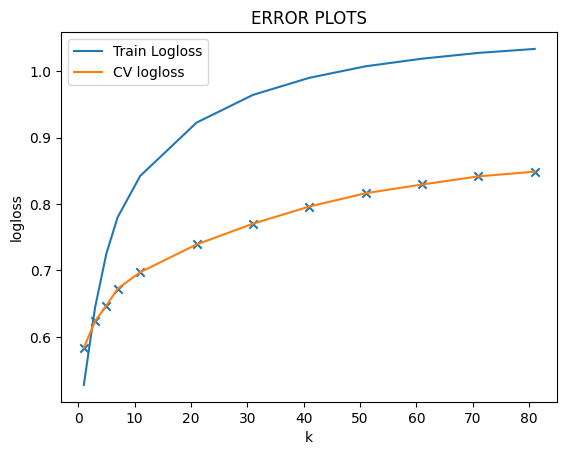

In [910]:
plot, training_time_EXP1DS = knn_tunning(EXP11_DATAFRAME_.drop(columns=['TARGET_VARIABLE_TO_PREDICT'],axis=1),  EXP11_DATAFRAME_.TARGET_VARIABLE_TO_PREDICT)

In [ ]:
#results
#KNN Tuning - #EXP11 Creating Bow-top100 with ngram 1,1 binary bow for KNN Testing
- Hyper parameter tuning Time 60.48 Seconds
- Best K = 21 




In [ ]:
#raw_train_data['label'] = raw_train_data['label'].map({-1.0:'0', 0.0:'1', 1.0:'2'})

In [950]:
#maping
prediction_df_exp11['TARGET_VARIABLE_TO_PREDICT']= prediction_df_exp11['TARGET_VARIABLE_TO_PREDICT'].map({-1.0:'0', 0:'1', 1:'2'})

In [957]:
prediction_df_exp11['TARGET_VARIABLE_TO_PREDICT'] = prediction_df_exp11['TARGET_VARIABLE_TO_PREDICT'].astype('category')

In [974]:
prediction_df_exp11['TARGET_VARIABLE_TO_PREDICT'] = prediction_df_exp11['TARGET_VARIABLE_TO_PREDICT'].astype('int32')

0.9690601968930671


Classification Report for KNN Base Model --> 
                           precision    recall  f1-score   support

    class 0 -ve Sentiment       0.16      0.22      0.19        45
class 1 Netural Sentiment       0.70      0.53      0.60       341
    class 2 +ve Sentiment       0.26      0.40      0.31       114

                 accuracy                           0.47       500
                macro avg       0.37      0.39      0.37       500
             weighted avg       0.55      0.47      0.50       500

CONFUSION MATRIX KNN base model -->


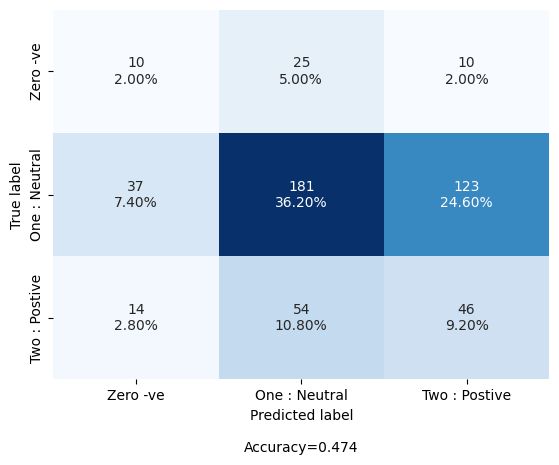

In [975]:
# Modelling with above KNN best parameter and predicting on test batch set 1


X = EXP11_DATAFRAME_.drop(columns=['TARGET_VARIABLE_TO_PREDICT'],axis=1)
y = EXP11_DATAFRAME_.TARGET_VARIABLE_TO_PREDICT

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

knn = KNeighborsClassifier(n_neighbors=21)
calibrated_knn = CalibratedClassifierCV(knn, method='sigmoid')
calibrated_knn.fit(X_smote, y_smote)

y_test_pred = calibrated_knn.predict(prediction_df_exp11.drop(columns=['TARGET_VARIABLE_TO_PREDICT'],axis=1))
y_test_prob = calibrated_knn.predict_proba(prediction_df_exp11.drop(columns=['TARGET_VARIABLE_TO_PREDICT'],axis=1))

y_true = prediction_df_exp11.TARGET_VARIABLE_TO_PREDICT

print(log_loss(y_true,y_test_prob,eps=1e-15))


target_names = ['class 0 -ve Sentiment', 'class 1 Netural Sentiment', 'class 2 +ve Sentiment']
exp_1_cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_categories = ['Zero -ve', 'One : Neutral', 'Two : Postive']


print('\n')
print("Classification Report for KNN Base Model --> ")
print(classification_report(list(y_true), list(y_test_pred), target_names=target_names))

print('CONFUSION MATRIX KNN base model -->')
cf_matrix_exp1__ = confusion_matrix(list(y_true), list(y_test_pred))
make_confusion_matrix(cf_matrix_exp1__, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

In [979]:
# decision tree
def tune_decission_tree_(df, label):
    X = df
    y = label
    
    # apply SMOTE for upsampling
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X, y)
    
    param_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 5, 7, 9, 11, 13, 15],
    'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'min_samples_leaf' : [0.1, 0.2, 0.3, 0.4, 0.5]
    }
    
    clf = DecisionTreeClassifier(random_state = 42)
    grid_clf = GridSearchCV(clf, param_grid=param_dict, cv=3, verbose=3, n_jobs=-1, return_train_score=True)
    grid_clf.fit(X_smote,y_smote)
    
    return (grid_clf)

In [980]:
out_grid_res = tune_decission_tree_(EXP11_DATAFRAME_.drop(columns=['TARGET_VARIABLE_TO_PREDICT'],axis=1),  EXP11_DATAFRAME_.TARGET_VARIABLE_TO_PREDICT)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits
[CV 1/3] END criterion=gini, max_depth=2, min_samples_leaf=0.1, min_samples_split=0.4;, score=(train=0.414, test=0.397) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, min_samples_leaf=0.1, min_samples_split=0.7;, score=(train=0.406, test=0.413) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, min_samples_leaf=0.1, min_samples_split=0.9;, score=(train=0.371, test=0.377) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, min_samples_leaf=0.2, min_samples_split=0.7;, score=(train=0.419, test=0.392) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, min_samples_leaf=0.2, min_samples_split=0.8;, score=(train=0.379, test=0.382) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, min_samples_leaf=0.2, min_samples_split=1.0;, score=(train=0.383, test=0.375) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, min_samples_leaf=0.3, min_samples_split=0.1;, score=(train=0

In [981]:
out_grid_res.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1}

[CV 1/3] END criterion=gini, max_depth=15, min_samples_leaf=0.4, min_samples_split=0.5;, score=(train=0.372, test=0.339) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=15, min_samples_leaf=0.5, min_samples_split=0.2;, score=(train=0.366, test=0.369) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=15, min_samples_leaf=0.5, min_samples_split=0.3;, score=(train=0.366, test=0.369) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=15, min_samples_leaf=0.5, min_samples_split=0.5;, score=(train=0.366, test=0.369) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=15, min_samples_leaf=0.5, min_samples_split=0.7;, score=(train=0.374, test=0.361) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=15, min_samples_leaf=0.5, min_samples_split=0.8;, score=(train=0.374, test=0.361) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=15, min_samples_leaf=0.5, min_samples_split=0.9;, score=(train=0.342, test=0.328) total time=   0.0s
[CV 3/3] END criteri

In [ ]:
# training using best parameters

dt_ = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=0.1, min_samples_split=0.1,random_state = 42)
df_cali = CalibratedClassifierCV(dt_, method="sigmoid")
df_cali.fit(X,y)

cv_scores = cross_val_score(categorical_tuned_decission_tree_calibration, X, y, cv=3)
print("3-fold CV accuracy:", cv_scores.mean())





1.0142075017095367


Classification Report for DT Base Model --> 
                           precision    recall  f1-score   support

    class 0 -ve Sentiment       0.12      0.11      0.11        45
class 1 Netural Sentiment       0.70      0.87      0.78       341
    class 2 +ve Sentiment       0.11      0.04      0.05       114

                 accuracy                           0.61       500
                macro avg       0.31      0.34      0.31       500
             weighted avg       0.51      0.61      0.55       500

CONFUSION MATRIX DT base model -->


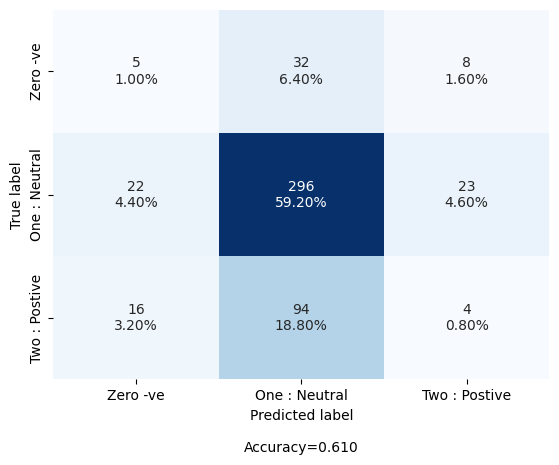

In [983]:
# Modelling with above DT best parameter and predicting on test batch set 1


X = EXP11_DATAFRAME_.drop(columns=['TARGET_VARIABLE_TO_PREDICT'],axis=1)
y = EXP11_DATAFRAME_.TARGET_VARIABLE_TO_PREDICT

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

dt_ = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=0.1, min_samples_split=0.1,random_state = 42)
df_cali = CalibratedClassifierCV(dt_, method="sigmoid")
df_cali.fit(X_smote, y_smote)

y_test_pred = df_cali.predict(prediction_df_exp11.drop(columns=['TARGET_VARIABLE_TO_PREDICT'],axis=1))
y_test_prob = df_cali.predict_proba(prediction_df_exp11.drop(columns=['TARGET_VARIABLE_TO_PREDICT'],axis=1))

y_true = prediction_df_exp11.TARGET_VARIABLE_TO_PREDICT

print(log_loss(y_true,y_test_prob,eps=1e-15))


target_names = ['class 0 -ve Sentiment', 'class 1 Netural Sentiment', 'class 2 +ve Sentiment']
exp_1_cf_labels = ['True Neg','False Pos','False Neg','True Pos']
cf_categories = ['Zero -ve', 'One : Neutral', 'Two : Postive']


print('\n')
print("Classification Report for DT Base Model --> ")
print(classification_report(list(y_true), list(y_test_pred), target_names=target_names))

print('CONFUSION MATRIX DT base model -->')
cf_matrix_exp1__ = confusion_matrix(list(y_true), list(y_test_pred))
make_confusion_matrix(cf_matrix_exp1__, group_names=exp_1_cf_labels, categories=cf_categories, cbar=False)

In [976]:
## Model NB

def NB_tunning(df, label):
    X = df
    y = label

    # apply SMOTE for upsampling
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X, y)


    #defining train and test data
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, stratify=y_smote, random_state=42)
    
    train_logloss = []
    cv_logloss = []
    
    # defining base models
    Alpha = [0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 , 100 , 1000 , 10000 ,100000]
    start_time_knn = time.time()
    
    for i in Alpha:
        
        print(i)
        MNB = MultinomialNB(alpha=i)
        calibrated_nb = CalibratedClassifierCV(MNB, method='sigmoid')
        calibrated_nb.fit(X_train, y_train)
        y_tr = calibrated_nb.predict(X_train)
        y_test = calibrated_nb.predict(X_test)
        y_tr_prob = calibrated_nb.predict_proba(X_train)
        y_tes_prob = calibrated_nb.predict_proba(X_test)
        
        train_logloss.append(log_loss(y_train,y_tr_prob,eps=1e-15))
        cv_logloss.append(log_loss(y_test,y_tes_prob,eps=1e-15))
        
    end_time_knn = time.time()
    print(f"NB training time :-> {end_time_knn - start_time_knn} seconds")
    
    plt.plot(np.log(Alpha), train_logloss, label='Train Logloss')
    plt.plot(np.log(Alpha), cv_logloss ,label='CV logloss')
    plt.legend()
    plt.scatter(np.log(Alpha),cv_logloss , label='CV logloss', marker='x')
    plt.xlabel("Alpha")
    plt.ylabel("logloss") 
    plt.title("ERROR PLOTS")
    
    return (plt.show(), end_time_knn - start_time_knn)
    


In [977]:
plot, training_time_EXP1DS = NB_tunning(EXP11_DATAFRAME_.drop(columns=['TARGET_VARIABLE_TO_PREDICT'],axis=1),  EXP11_DATAFRAME_.TARGET_VARIABLE_TO_PREDICT)

1e-06


ValueError: Negative values in data passed to MultinomialNB (input X)

#ROUGH START not using them 

In [186]:
# experiment test working models sanity test
#vectorizer=TfidfVectorizer(ngram_range=(1,2), min_df=10 , max_features = 5000 )
l_ = []
for text in raw_train_data['cleaned_text'].values:
    l_.append(text)
    

cv = CountVectorizer(ngram_range=(1,3), min_df=5)
cv.fit(l_)

#ctv.fit(raw_train_data['cleaned_text'])
out_ =  cv.transform(l_) 

out_featurenames = cv.get_feature_names_out()
out_array= out_.toarray()

d_ = pd.DataFrame(out_array, columns=out_featurenames)
d_

aap  abc  able  aborted  absolutely  abt  abuse  access  accidents  \
0       0    0     0        0           0    0      0       0          0   
1       0    0     0        0           0    0      0       0          0   
2       0    0     0        0           0    0      0       0          0   
3       0    0     0        0           0    0      0       0          0   
4       0    0     0        0           0    0      0       0          0   
...   ...  ...   ...      ...         ...  ...    ...     ...        ...   
9687    0    0     0        0           0    0      0       0          0   
9688    0    0     0        0           0    0      0       0          0   
9689    0    0     0        0           0    0      0       0          0   
9690    0    0     0        0           0    0      0       0          0   
9691    0    0     0        0           0    0      0       0          0   

      according  ...  youre  youth  youtube  yr  yr old  yrs  yrs ago  yup  \
0             0  ...      0      0        0   0       0    0        0    0   
1             0  ...      0      0        0   0       0    0        0    0   
2             0  ...      0      0        0   0       0    0        0    0   
3             0  ...      0      0        0   0       0    0        0    0   
4             0  ...      0      0        0   0       0    0        0    0   
...         ...  ...    ...    ...      ...  ..     ...  ...      ...  ...   
9687          0  ...      0      0        0   0       0    0        0    0   
9688          0  ...      0      0        0   0       0    0        0    0   
9689          0  ...      0      0        0   0       0    0        0    0   
9690          0  ...      0      0        0   0       0    0        0    0   
9691          0  ...      0      0        0   0       0    0        0    0   

      zero  zombie  
0        0       0  
1        0       0  
2        0       0  
3        0       0  
4        0       0  
...    ...     ...  
9687     0       0  
9688     0       0  
9689     0       0  
9690     0       0  
9691     0       0  

[9692 rows x 3998 columns]

In [155]:
l_ = []
for text in raw_test_data['cleaned_text'].values:
    l_.append(text)
    

#cv = CountVectorizer(ngram_range=(1,1), min_df=10)
#cv.fit(l_)

#ctv.fit(raw_train_data['cleaned_text'])
out_ =  cv.transform(l_) 

out_featurenames = cv.get_feature_names_out()
out_array= out_.toarray()

d_2 = pd.DataFrame(out_array, columns=out_featurenames)
d_2

able  absolutely  abt  abuse  access  according  across  act  actual  \
0        0           0    0      0       0          0       0    0       0   
1        0           0    0      0       0          0       0    0       0   
2        0           0    0      0       0          0       0    0       0   
3        0           0    0      0       0          0       0    0       0   
4        0           0    0      0       0          0       0    0       0   
...    ...         ...  ...    ...     ...        ...     ...  ...     ...   
5172     0           0    0      0       0          0       0    0       0   
5173     0           0    0      0       0          0       0    0       0   
5174     0           0    0      0       0          0       0    0       0   
5175     0           0    0      0       0          0       0    0       0   
5176     0           0    0      0       0          0       0    0       0   

      actually  ...  yes  yesterday  yet  yo  york  young  yr  yrs  zero  \
0            0  ...    0          0    0   0     0      0   0    0     0   
1            0  ...    0          0    0   0     0      0   0    0     0   
2            0  ...    0          0    0   0     0      0   0    0     0   
3            0  ...    0          0    0   0     0      0   0    0     0   
4            0  ...    0          0    0   0     0      0   0    0     0   
...        ...  ...  ...        ...  ...  ..   ...    ...  ..  ...   ...   
5172         0  ...    0          0    0   0     0      0   0    0     0   
5173         0  ...    0          0    0   0     0      0   0    0     0   
5174         0  ...    0          0    0   0     0      0   0    0     0   
5175         0  ...    0          0    0   0     0      0   0    0     0   
5176         0  ...    0          0    0   0     0      0   0    0     0   

      zombie  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
5172       0  
5173       0  
5174       0  
5175       0  
5176       0  

[5177 rows x 1347 columns]

In [156]:
knn_sanity = KNeighborsClassifier()
knn_sanity.fit(d_, raw_train_data_global_copy['label'])
knn_sanity.predict(d_2)

array(['1', '2', '1', ..., '1', '2', '2'], dtype=object)

In [163]:
king_test_data = pd.read_excel('Vaccine_clean_20k.xlsx')

In [164]:
king_test_data.head()

id                                          tweet_url  \
0  1329066068720041989  https://twitter.com/minabelles/status/13290660...   
1  1329066070854967296  https://twitter.com/meet_rayyan/status/1329066...   
2  1329066076613828608  https://twitter.com/BiancaJagger/status/132906...   
3  1329066074424418311  https://twitter.com/Anony05690448/status/13290...   
4  1329066084180234241  https://twitter.com/Alysenve/status/1329066084...   

                       created_at  parsed_created_at user_screen_name  \
0  Wed Nov 18 14:16:58 +0000 2020       44153.345116       minabelles   
1  Wed Nov 18 14:16:58 +0000 2020       44153.345116      meet_rayyan   
2  Wed Nov 18 14:17:00 +0000 2020       44153.345139     BiancaJagger   
3  Wed Nov 18 14:16:59 +0000 2020       44153.345127    Anony05690448   
4  Wed Nov 18 14:17:01 +0000 2020       44153.345150         Alysenve   

                                                text tweet_type  
0  New Pfizer Results: Coronavirus Vaccine Is Saf...   original  
1  RT @DrEricDing: BREAKINGâ€”Updated results fro...    retweet  
2  RT @BBCBreaking: Coronavirus vaccine by Pfizer...    retweet  
3  This is an objectively written and factual thr...   original  
4  RT @AP: BREAKING: Pfizer suggests its coronavi...    retweet

In [165]:
new_king_df = pd.DataFrame(king_test_data['text'])

In [169]:
new_king_df

text
0      New Pfizer Results: Coronavirus Vaccine Is Saf...
1      RT @DrEricDing: BREAKINGâ€”Updated results fro...
2      RT @BBCBreaking: Coronavirus vaccine by Pfizer...
3      This is an objectively written and factual thr...
4      RT @AP: BREAKING: Pfizer suggests its coronavi...
...                                                  ...
19995  RT @thetimes: The first coronavirus vaccine co...
19996  @WendyUsher @jcmpPernu @JustinTrudeau @retired...
19997  RT @pfizer: BREAKING: We are proud to announce...
19998  RT @Amazone_Dark: Le vaccin contre le corona s...
19999  RT @BJP4India: While the world awaits #COVID v...

[20000 rows x 1 columns]

In [159]:
#king_test_data = king_test_data['text']

In [171]:
def test_king(text):
    text = str(text)
    # Remove <user>   tags
    text = re.sub(r'<.*?>', '',   text)
    # Replace &amp; with   'and'
    text = re.sub(r"&amp;", "and",   text) 
    # Replace punctuation   characters with spaces
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, "   ") for c in  filters)
    translate_map =   str.maketrans(translate_dict)
    text = text.translate(translate_map)
    # Remove URL's
    text = re.sub(r"http\S+" , "" , text)
    # Remove html tags
    text=re.sub(r"<[^<]+?>", "" , text)
    # Removing lxml
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # Decontracting phares
    text=decontracted(text)
    # Removing word with numbers
    text=re.sub("S*\d\S*" , "" , text)
    # Remove Special charactor punc spaces
    text=re.sub(r"\W+", " ", text)
    
    # Removing other languages
    pattern = r"\b[A-Za-z]+\b"
    matches_list = re.findall(pattern, text)
    text = ' '.join(e.lower() for e in matches_list if e.lower() not in STOPWORDS)
    
    # Stop word removal
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in STOPWORDS)
    
    # Convert text to   lowercase
    text = text.strip().lower()
    #corpus_cleaned_test_global.append(text)
    return  text

new_king_df['cleaned_text'] = new_king_df['text'].apply(lambda x: test_king(x))

In [172]:
new_king_df

text  \
0      New Pfizer Results: Coronavirus Vaccine Is Saf...   
1      RT @DrEricDing: BREAKINGâ€”Updated results fro...   
2      RT @BBCBreaking: Coronavirus vaccine by Pfizer...   
3      This is an objectively written and factual thr...   
4      RT @AP: BREAKING: Pfizer suggests its coronavi...   
...                                                  ...   
19995  RT @thetimes: The first coronavirus vaccine co...   
19996  @WendyUsher @jcmpPernu @JustinTrudeau @retired...   
19997  RT @pfizer: BREAKING: We are proud to announce...   
19998  RT @Amazone_Dark: Le vaccin contre le corona s...   
19999  RT @BJP4India: While the world awaits #COVID v...   

                                            cleaned_text  
0      new pfizer results coronavirus vaccine safe ef...  
1      rt drericding updated results pfizer said s co...  
2      rt bbcbreaking coronavirus vaccine pfizer bion...  
3      objectively written factual thread vaccine vol...  
4      rt ap breaking pfizer suggests coronavirus vac...  
...                                                  ...  
19995  rt thetimes first coronavirus vaccine ready us...  
19996  wendyusher jcmppernu justintrudeau retiredknit...  
19997  rt pfizer breaking proud announce along bionte...  
19998  rt amazone dark le vaccin contre le corona si ...  
19999  rt bjp world awaits covid vaccines modi govern...  

[20000 rows x 2 columns]

In [173]:
l_ = []
for text in new_king_df['cleaned_text'].values:
    l_.append(text)
    

#cv = CountVectorizer(ngram_range=(1,1), min_df=10)
#cv.fit(l_)

#ctv.fit(raw_train_data['cleaned_text'])
out_ =  cv.transform(l_) 

out_featurenames = cv.get_feature_names_out()
out_array= out_.toarray()

d_3 = pd.DataFrame(out_array, columns=out_featurenames)
d_3

able  absolutely  abt  abuse  access  according  across  act  actual  \
0         0           0    0      0       0          0       0    0       0   
1         0           0    0      0       0          0       0    0       0   
2         0           0    0      0       0          0       0    0       0   
3         0           0    0      0       0          0       0    0       0   
4         0           0    0      0       0          0       0    0       0   
...     ...         ...  ...    ...     ...        ...     ...  ...     ...   
19995     0           0    0      0       0          0       0    0       0   
19996     0           0    0      0       0          0       0    0       0   
19997     0           0    0      0       0          0       0    0       0   
19998     0           0    0      0       0          0       0    0       0   
19999     0           0    0      0       0          0       0    0       0   

       actually  ...  yes  yesterday  yet  yo  york  young  yr  yrs  zero  \
0             0  ...    0          0    0   0     0      0   0    0     0   
1             0  ...    0          0    0   0     0      0   0    0     0   
2             0  ...    0          0    0   0     0      0   0    0     0   
3             0  ...    0          0    0   0     0      0   0    0     0   
4             0  ...    0          0    0   0     0      0   0    0     0   
...         ...  ...  ...        ...  ...  ..   ...    ...  ..  ...   ...   
19995         0  ...    0          0    0   0     0      0   0    0     0   
19996         0  ...    0          0    0   0     0      0   0    0     0   
19997         0  ...    0          0    0   0     0      0   0    0     0   
19998         0  ...    0          0    0   0     0      0   0    0     0   
19999         0  ...    0          0    0   0     0      0   0    0     0   

       zombie  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
19995       0  
19996       0  
19997       0  
19998       0  
19999       0  

[20000 rows x 1347 columns]

In [179]:
knn_sanity.predict(d_3)

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [180]:
zero_count = 0
one_count = 0
two_count = 0
for value in list(knn_sanity.predict(d_3)):
    if value == '0':
        zero_count+=1
    elif value == '1':
        one_count+=1
    else:
        two_count+=1

print(zero_count, one_count, two_count)

1039 17040 1921


In [225]:
#ROUGH END

In [ ]:
# ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
#             ngram_range=(1, 1), stop_words = 'english', min_df=5)

# # Fitting Count Vectorizer to both training and test sets (semi-supervised learning)
# ctv.fit(raw_train_data['cleaned_text'])
# X_train_ctv =  ctv.transform(X_train) 
# X_valid_ctv = ctv.transform(X_valid)
# X_test_ctv = ctv.transform(test.safe_text)

In [144]:
# import re

# text = "смотрю This is a test 病院実習行くのにmmrと水疱瘡の抗体を調べたら sentence with some 取り敢えず自己負担だね non-alphabetic characters like 123 and $!#. 取り敢えず自己負担だね "
# pattern = r"\b[A-Za-z]+\b"

# matches = re.findall(pattern, text)
# #test_text = re.sub(r"\b[A-Za-z]+\b" , " " , text)

# print(matches)  # Output: ['This', 'is', 'a', 'test', 'sentence', 'with', 'some', 'non', 'alphabetic', 'characters', 'like', 'and']
# #print(test_text)

In [96]:
# # Removing other languages
# pattern = r"\b[A-Za-z]+\b"
# matches_list = re.findall(pattern, text)
# text = ' '.join(e.lower() for e in matches_list if e.lower() not in STOPWORDS)
# # Convert text to   lowercase
# text = text.strip().lower()
# corpus_cleaned_test_global.append(text)

In [52]:
# import re

# text = "取り敢えず自己負担だね"
# pattern = r"\b\p{Cyrillic}+\b"
# matches = re.findall(pattern, text, flags=re.IGNORECASE)
# print(matches)  # Output: ['Я', 'люблю', 'котиков']


In [53]:
# import re

# text = "This is a test sentence to check if all words are in English"
# pattern = r"\b[a-zA-Z]+\b"
# english_words = set(open("/usr/share/dict/words").read().splitlines())
# matches = re.findall(pattern, text)
# for match in matches:
#     if match.lower() not in english_words:
#         print(f"{match} is not an English word.")


In [ ]:
# import spacy
# nlp = spacy.load("en")
# doc = nlp(u"The Empire of Japan aimed to dominate Asia and the " \
#                "Pacific and was already at war with the Republic of China " \
#                "in 1937, but the world war is generally said to have begun on " \
#                "1 September 1939 with the invasion of Poland by Germany and " \
#                "subsequent declarations of war on Germany by France and the United Kingdom. " \
#                "From late 1939 to early 1941, in a series of campaigns and treaties, Germany conquered " \
#                "or controlled much of continental Europe, and formed the Axis alliance with Italy and Japan. " \
#                "Under the Molotov-Ribbentrop Pact of August 1939, Germany and the Soviet Union partitioned and " \
#                "annexed territories of their European neighbours, Poland, Finland, Romania and the Baltic states. " \
#                "The war continued primarily between the European Axis powers and the coalition of the United Kingdom " \
#                "and the British Commonwealth, with campaigns including the North Africa and East Africa campaigns, " \
#                "the aerial Battle of Britain, the Blitz bombing campaign, the Balkan Campaign as well as the " \
#                "long-running Battle of the Atlantic. In June 1941, the European Axis powers launched an invasion " \
#                "of the Soviet Union, opening the largest land theatre of war in history, which trapped the major part " \
#                "of the Axis' military forces into a war of attrition. In December 1941, Japan attacked " \
#                "the United States and European territories in the Pacific Ocean, and quickly conquered much of " \
#                "the Western Pacific.")

In [ ]:
# import spacy
# from textpipeliner import PipelineEngine, Context
# from textpipeliner.pipes import *

# pipes_structure = [SequencePipe([FindTokensPipe("VERB/nsubj/NNP"),
#                                  NamedEntityFilterPipe(),
#                                  NamedEntityExtractorPipe()]),
#                        AggregatePipe([FindTokensPipe("VERB"),
#                                       FindTokensPipe("VERB/xcomp/VERB/aux/*"),
#                                       FindTokensPipe("VERB/xcomp/VERB")]),
#                        AnyPipe([FindTokensPipe("VERB/[acomp,amod]/ADJ"),
#                                 AggregatePipe([FindTokensPipe("VERB/[dobj,attr]/NOUN/det/DET"),
#                                                FindTokensPipe("VERB/[dobj,attr]/NOUN/[acomp,amod]/ADJ")])])
#                       ]

# engine = PipelineEngine(pipes_structure, Context(doc), [0,1,2])
# engine.process()

In [ ]:
# pipes_structure_comp = [SequencePipe([FindTokensPipe("VERB/conj/VERB/nsubj/NNP"),
#                                  NamedEntityFilterPipe(),
#                                  NamedEntityExtractorPipe()]),
#                    AggregatePipe([FindTokensPipe("VERB/conj/VERB"),
#                                   FindTokensPipe("VERB/conj/VERB/xcomp/VERB/aux/*"),
#                                   FindTokensPipe("VERB/conj/VERB/xcomp/VERB")]),
#                    AnyPipe([FindTokensPipe("VERB/conj/VERB/[acomp,amod]/ADJ"),
#                             AggregatePipe([FindTokensPipe("VERB/conj/VERB/[dobj,attr]/NOUN/det/DET"),
#                                            FindTokensPipe("VERB/conj/VERB/[dobj,attr]/NOUN/[acomp,amod]/ADJ")])])
#                   ]

# engine2 = PipelineEngine(pipes_structure_comp, Context(doc), [0,1,2])

In [ ]:
# engine.process()
# engine2.process()

In [ ]:
#THIS WAS PROVIDED TO CHOI N TEAM
# train = pd.read_csv('Train_Set.csv')
# test = pd.read_csv('Test_Set.csv')

# def clean_text(text):
#     test = str(text)
#     text = re.sub(r'<.*?>', '',   text)
#     text = re.sub(r"&amp;", "and",   text) 
#     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
#     translate_dict = dict((c, "   ") for c in  filters)
#     translate_map =   str.maketrans(translate_dict)
#     text = text.translate(translate_map)
#     text = text.strip().lower()
#     return  text
 
# train.safe_text = train.safe_text.astype(str)
# test.safe_text = test.safe_text.astype(str)
 
# train['cleaned_text'] =   train.safe_text.apply(lambda x: clean_text(x))
# test['cleaned_text'] = test.safe_text.apply(lambda x:   clean_text(x))

# train = train.drop(columns=['tweet_id', 'agreement', 'safe_text'])
# test = test.drop(columns=['tweet_id', 'safe_text'])

# train.to_csv('cleaned_train.csv', header = True, index=False)
# test.to_csv('cleaned_test.csv', header = True, index=False)